In [7]:
import numpy as np
import os
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.layers import LSTM, Dense, Flatten, BatchNormalization, Dropout, GRU
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import module
import gc
# Load the TensorBoard notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [8]:
np.random.randint(10)

0

In [9]:
countriesOfInterest = {"HK", "JP", 'ZA', 'TN', 'TR', 'GB', 'MX', 'US', 'CO', 'EC', 'AU', 'NZ'}
countriesOfInterest = ["ZA", "EG", "TW", "JP", "DK", "FI", "US", "CA", "AU", "NZ", "BR", "CO"]
#countriesOfInterest = list(countriesOfInterest & {"ZA", "EG", "TW", "JP", "DK", "FI", "US", "CA", "AU", "NZ", "BR", "CO"})

enc = OneHotEncoder()
enc.fit(np.array(countriesOfInterest).reshape(-1, 1))

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [10]:
seconds = 10
samplerate = 10
train_x, train_labels, val_x, val_labels, class_weights = module.getSamples(1, 1, 1, 1, seconds, samplerate, countriesOfInterest,
               enc, verbose = 0)
print("train", np.sum(train_labels, axis = 0))

train [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### Fit model

In [11]:
input_shape=(train_x.shape[1], train_x.shape[2])
input_shape

(100, 25)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_8 (Batch (None, 100, 25)           100       
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 8)            1088      
_________________________________________________________________
batch_normalization_9 (Batch (None, 100, 8)            32        
_________________________________________________________________
lstm_5 (LSTM)                (None, 8)                 544       
_________________________________________________________________
batch_normalization_10 (Batc (None, 8)                 32        
_________________________________________________________________
dense_4 (Dense)              (None, 64)                576       
_________________________________________________________________
batch_normalization_11 (Batc (None, 64)               

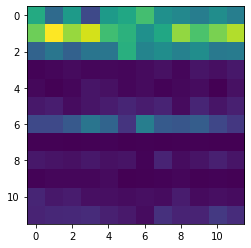

24000/24000 [==============================] - 1s 50us/sample


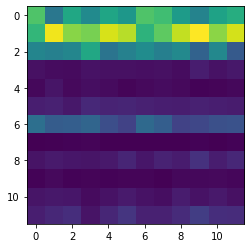

Train on 24000 samples, validate on 4800 samples
Epoch 11/12
24000/24000 [==============================] - 7s 274us/sample - loss: 2.4948 - acc: 0.1077 - val_loss: 2.4844 - val_acc: 0.0902
Epoch 12/12
24000/24000 [==============================] - 4s 181us/sample - loss: 2.4775 - acc: 0.1150 - val_loss: 2.4840 - val_acc: 0.0915
Train on 24000 samples, validate on 4800 samples
Epoch 13/14
24000/24000 [==============================] - 7s 277us/sample - loss: 2.4871 - acc: 0.1078 - val_loss: 2.4820 - val_acc: 0.1046
Epoch 14/14
24000/24000 [==============================] - 4s 182us/sample - loss: 2.4735 - acc: 0.1152 - val_loss: 2.4813 - val_acc: 0.1054
Train on 24000 samples, validate on 4800 samples
Epoch 15/16
24000/24000 [==============================] - 7s 278us/sample - loss: 2.4815 - acc: 0.1063 - val_loss: 2.4808 - val_acc: 0.1067
Epoch 16/16
24000/24000 [==============================] - 4s 181us/sample - loss: 2.4681 - acc: 0.1167 - val_loss: 2.4803 - val_acc: 0.0994
Train o

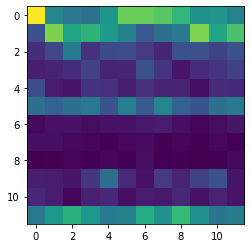

24000/24000 [==============================] - 1s 52us/sample


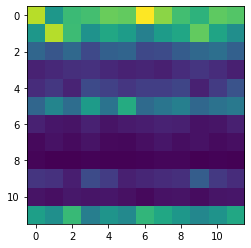

Train on 24000 samples, validate on 4800 samples
Epoch 21/22
24000/24000 [==============================] - 7s 277us/sample - loss: 2.4724 - acc: 0.1129 - val_loss: 2.4808 - val_acc: 0.0946
Epoch 22/22
24000/24000 [==============================] - 4s 182us/sample - loss: 2.4595 - acc: 0.1254 - val_loss: 2.4808 - val_acc: 0.0927
Train on 24000 samples, validate on 4800 samples
Epoch 23/24
24000/24000 [==============================] - 7s 283us/sample - loss: 2.4740 - acc: 0.1164 - val_loss: 2.4779 - val_acc: 0.1019
Epoch 24/24
24000/24000 [==============================] - 4s 182us/sample - loss: 2.4628 - acc: 0.1224 - val_loss: 2.4774 - val_acc: 0.1013
Train on 24000 samples, validate on 4800 samples
Epoch 25/26
24000/24000 [==============================] - 7s 280us/sample - loss: 2.4677 - acc: 0.1158 - val_loss: 2.4790 - val_acc: 0.1023
Epoch 26/26
24000/24000 [==============================] - 4s 179us/sample - loss: 2.4575 - acc: 0.1217 - val_loss: 2.4783 - val_acc: 0.0996
Train o

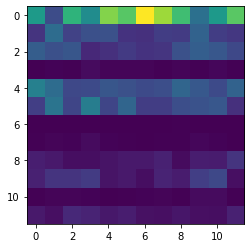

24000/24000 [==============================] - 1s 51us/sample


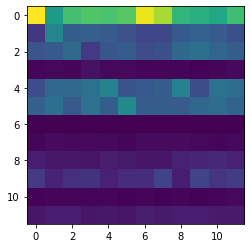

Train on 24000 samples, validate on 4800 samples
Epoch 31/32
24000/24000 [==============================] - 7s 277us/sample - loss: 2.4512 - acc: 0.1298 - val_loss: 2.4659 - val_acc: 0.1135
Epoch 32/32
24000/24000 [==============================] - 4s 183us/sample - loss: 2.4395 - acc: 0.1369 - val_loss: 2.4635 - val_acc: 0.1194
Train on 24000 samples, validate on 4800 samples
Epoch 33/34
24000/24000 [==============================] - 7s 281us/sample - loss: 2.4505 - acc: 0.1302 - val_loss: 2.4648 - val_acc: 0.1079
Epoch 34/34
24000/24000 [==============================] - 4s 185us/sample - loss: 2.4404 - acc: 0.1367 - val_loss: 2.4650 - val_acc: 0.1110
Train on 24000 samples, validate on 4800 samples
Epoch 35/36
24000/24000 [==============================] - 7s 284us/sample - loss: 2.4537 - acc: 0.1319 - val_loss: 2.4716 - val_acc: 0.1217
Epoch 36/36
24000/24000 [==============================] - 4s 185us/sample - loss: 2.4423 - acc: 0.1402 - val_loss: 2.4693 - val_acc: 0.1231
Train o

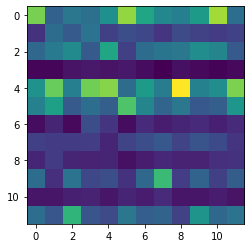

24000/24000 [==============================] - 1s 52us/sample


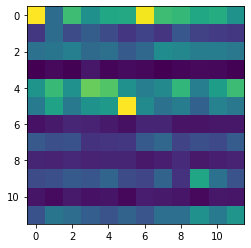

Train on 24000 samples, validate on 4800 samples
Epoch 41/42
24000/24000 [==============================] - 7s 287us/sample - loss: 2.4383 - acc: 0.1419 - val_loss: 2.4621 - val_acc: 0.1163
Epoch 42/42
24000/24000 [==============================] - 5s 188us/sample - loss: 2.4256 - acc: 0.1459 - val_loss: 2.4619 - val_acc: 0.1258
Train on 24000 samples, validate on 4800 samples
Epoch 43/44
24000/24000 [==============================] - 7s 284us/sample - loss: 2.4541 - acc: 0.1300 - val_loss: 2.4650 - val_acc: 0.1167
Epoch 44/44
24000/24000 [==============================] - 4s 186us/sample - loss: 2.4424 - acc: 0.1363 - val_loss: 2.4636 - val_acc: 0.1140
Train on 24000 samples, validate on 4800 samples
Epoch 45/46
24000/24000 [==============================] - 7s 285us/sample - loss: 2.4559 - acc: 0.1280 - val_loss: 2.4555 - val_acc: 0.1183
Epoch 46/46
24000/24000 [==============================] - 4s 186us/sample - loss: 2.4447 - acc: 0.1357 - val_loss: 2.4549 - val_acc: 0.1200
Train o

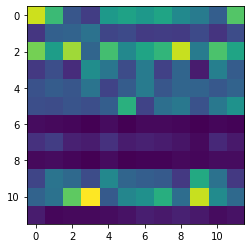

24000/24000 [==============================] - 1s 52us/sample


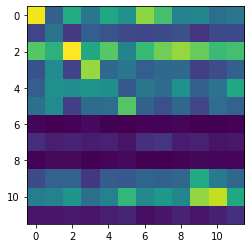

Train on 24000 samples, validate on 4800 samples
Epoch 51/52
24000/24000 [==============================] - 7s 288us/sample - loss: 2.4333 - acc: 0.1435 - val_loss: 2.4548 - val_acc: 0.1312
Epoch 52/52
24000/24000 [==============================] - 5s 188us/sample - loss: 2.4200 - acc: 0.1471 - val_loss: 2.4580 - val_acc: 0.1321
Train on 24000 samples, validate on 4800 samples
Epoch 53/54
24000/24000 [==============================] - 7s 287us/sample - loss: 2.4490 - acc: 0.1324 - val_loss: 2.4553 - val_acc: 0.1163
Epoch 54/54
24000/24000 [==============================] - 4s 187us/sample - loss: 2.4357 - acc: 0.1396 - val_loss: 2.4556 - val_acc: 0.1206
Train on 24000 samples, validate on 4800 samples
Epoch 55/56
24000/24000 [==============================] - 7s 287us/sample - loss: 2.4344 - acc: 0.1411 - val_loss: 2.4439 - val_acc: 0.1377
Epoch 56/56
24000/24000 [==============================] - 5s 189us/sample - loss: 2.4245 - acc: 0.1431 - val_loss: 2.4452 - val_acc: 0.1423
Train o

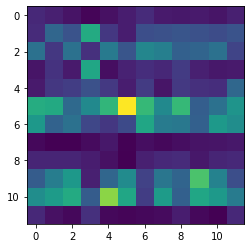

24000/24000 [==============================] - 1s 51us/sample


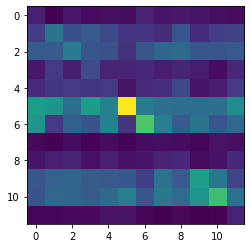

Train on 24000 samples, validate on 4800 samples
Epoch 61/62
24000/24000 [==============================] - 7s 290us/sample - loss: 2.4402 - acc: 0.1382 - val_loss: 2.4123 - val_acc: 0.1529
Epoch 62/62
24000/24000 [==============================] - 5s 191us/sample - loss: 2.4268 - acc: 0.1458 - val_loss: 2.4150 - val_acc: 0.1496
Train on 24000 samples, validate on 4800 samples
Epoch 63/64
24000/24000 [==============================] - 7s 286us/sample - loss: 2.4376 - acc: 0.1413 - val_loss: 2.4529 - val_acc: 0.1392
Epoch 64/64
24000/24000 [==============================] - 5s 190us/sample - loss: 2.4252 - acc: 0.1488 - val_loss: 2.4527 - val_acc: 0.1367
Train on 24000 samples, validate on 4800 samples
Epoch 65/66
24000/24000 [==============================] - 7s 289us/sample - loss: 2.4248 - acc: 0.1512 - val_loss: 2.4351 - val_acc: 0.1400
Epoch 66/66
24000/24000 [==============================] - 5s 191us/sample - loss: 2.4126 - acc: 0.1597 - val_loss: 2.4367 - val_acc: 0.1404
Train o

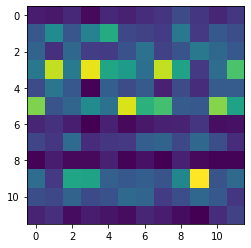

24000/24000 [==============================] - 1s 53us/sample


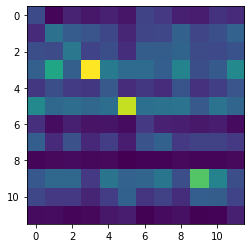

Train on 24000 samples, validate on 4800 samples
Epoch 71/72
24000/24000 [==============================] - 7s 292us/sample - loss: 2.4196 - acc: 0.1520 - val_loss: 2.4295 - val_acc: 0.1465
Epoch 72/72
24000/24000 [==============================] - 5s 192us/sample - loss: 2.4084 - acc: 0.1564 - val_loss: 2.4271 - val_acc: 0.1490
Train on 24000 samples, validate on 4800 samples
Epoch 73/74
24000/24000 [==============================] - 7s 287us/sample - loss: 2.4260 - acc: 0.1476 - val_loss: 2.4012 - val_acc: 0.1427
Epoch 74/74
24000/24000 [==============================] - 5s 192us/sample - loss: 2.4153 - acc: 0.1516 - val_loss: 2.4051 - val_acc: 0.1408
Train on 24000 samples, validate on 4800 samples
Epoch 75/76
24000/24000 [==============================] - 7s 290us/sample - loss: 2.4171 - acc: 0.1540 - val_loss: 2.4087 - val_acc: 0.1640
Epoch 76/76
24000/24000 [==============================] - 5s 192us/sample - loss: 2.4057 - acc: 0.1565 - val_loss: 2.4077 - val_acc: 0.1660
Train o

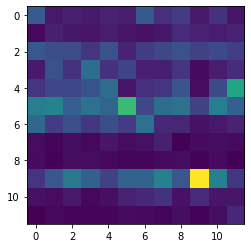

24000/24000 [==============================] - 1s 54us/sample


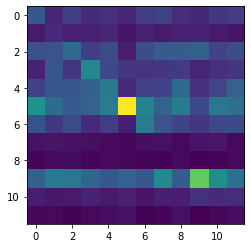

Train on 24000 samples, validate on 4800 samples
Epoch 81/82
24000/24000 [==============================] - 7s 288us/sample - loss: 2.4129 - acc: 0.1607 - val_loss: 2.4337 - val_acc: 0.1469
Epoch 82/82
24000/24000 [==============================] - 5s 194us/sample - loss: 2.4023 - acc: 0.1639 - val_loss: 2.4367 - val_acc: 0.1433
Train on 24000 samples, validate on 4800 samples
Epoch 83/84
24000/24000 [==============================] - 7s 287us/sample - loss: 2.4166 - acc: 0.1509 - val_loss: 2.4206 - val_acc: 0.1419
Epoch 84/84
24000/24000 [==============================] - 5s 193us/sample - loss: 2.4054 - acc: 0.1559 - val_loss: 2.4246 - val_acc: 0.1423
Train on 24000 samples, validate on 4800 samples
Epoch 85/86
24000/24000 [==============================] - 7s 290us/sample - loss: 2.4243 - acc: 0.1589 - val_loss: 2.4086 - val_acc: 0.1625
Epoch 86/86
24000/24000 [==============================] - 5s 194us/sample - loss: 2.4093 - acc: 0.1645 - val_loss: 2.4193 - val_acc: 0.1640
Train o

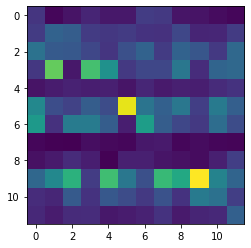

24000/24000 [==============================] - 1s 54us/sample


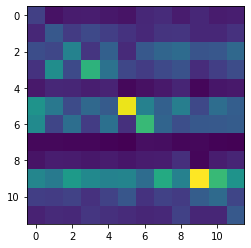

Train on 24000 samples, validate on 4800 samples
Epoch 91/92
24000/24000 [==============================] - 7s 293us/sample - loss: 2.4041 - acc: 0.1639 - val_loss: 2.4176 - val_acc: 0.1527
Epoch 92/92
24000/24000 [==============================] - 5s 195us/sample - loss: 2.3939 - acc: 0.1661 - val_loss: 2.4175 - val_acc: 0.1506
Train on 24000 samples, validate on 4800 samples
Epoch 93/94
24000/24000 [==============================] - 7s 292us/sample - loss: 2.4188 - acc: 0.1563 - val_loss: 2.4348 - val_acc: 0.1477
Epoch 94/94
24000/24000 [==============================] - 5s 194us/sample - loss: 2.4060 - acc: 0.1630 - val_loss: 2.4420 - val_acc: 0.1452
Train on 24000 samples, validate on 4800 samples
Epoch 95/96
24000/24000 [==============================] - 7s 289us/sample - loss: 2.4363 - acc: 0.1459 - val_loss: 2.3684 - val_acc: 0.1856
Epoch 96/96
24000/24000 [==============================] - 5s 194us/sample - loss: 2.4207 - acc: 0.1503 - val_loss: 2.3728 - val_acc: 0.1869
Train o

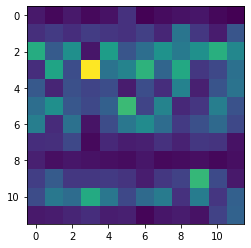

24000/24000 [==============================] - 1s 52us/sample


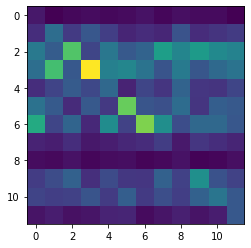

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_12 (Batc (None, 100, 25)           100       
_________________________________________________________________
lstm_6 (LSTM)                (None, 100, 16)           2688      
_________________________________________________________________
batch_normalization_13 (Batc (None, 100, 16)           64        
_________________________________________________________________
lstm_7 (LSTM)                (None, 8)                 800       
_________________________________________________________________
batch_normalization_14 (Batc (None, 8)                 32        
_________________________________________________________________
dense_6 (Dense)              (None, 64)                576       
_________________________________________________________________
batch_normalization_15 (Batc (None, 64)               

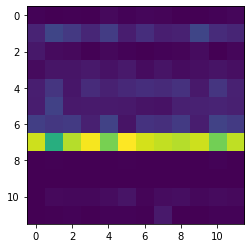

24000/24000 [==============================] - 2s 76us/sample


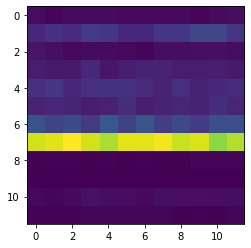

Train on 24000 samples, validate on 4800 samples
Epoch 11/12
24000/24000 [==============================] - 9s 359us/sample - loss: 2.5083 - acc: 0.0985 - val_loss: 2.4800 - val_acc: 0.0913
Epoch 12/12
24000/24000 [==============================] - 6s 266us/sample - loss: 2.4897 - acc: 0.1093 - val_loss: 2.4793 - val_acc: 0.0985
Train on 24000 samples, validate on 4800 samples
Epoch 13/14
24000/24000 [==============================] - 9s 363us/sample - loss: 2.5005 - acc: 0.1010 - val_loss: 2.4825 - val_acc: 0.1029
Epoch 14/14
24000/24000 [==============================] - 6s 267us/sample - loss: 2.4826 - acc: 0.1126 - val_loss: 2.4820 - val_acc: 0.1017
Train on 24000 samples, validate on 4800 samples
Epoch 15/16
24000/24000 [==============================] - 9s 362us/sample - loss: 2.4920 - acc: 0.1047 - val_loss: 2.4817 - val_acc: 0.0940
Epoch 16/16
24000/24000 [==============================] - 6s 267us/sample - loss: 2.4782 - acc: 0.1129 - val_loss: 2.4824 - val_acc: 0.1010
Train o

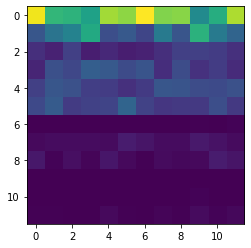

24000/24000 [==============================] - 2s 80us/sample


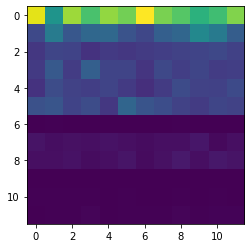

Train on 24000 samples, validate on 4800 samples
Epoch 21/22
24000/24000 [==============================] - 10s 398us/sample - loss: 2.4740 - acc: 0.1164 - val_loss: 2.4834 - val_acc: 0.0981
Epoch 22/22
24000/24000 [==============================] - 7s 297us/sample - loss: 2.4608 - acc: 0.1248 - val_loss: 2.4828 - val_acc: 0.0977
Train on 24000 samples, validate on 4800 samples
Epoch 23/24
24000/24000 [==============================] - 9s 380us/sample - loss: 2.4683 - acc: 0.1218 - val_loss: 2.4762 - val_acc: 0.1083
Epoch 24/24
24000/24000 [==============================] - 7s 291us/sample - loss: 2.4545 - acc: 0.1306 - val_loss: 2.4776 - val_acc: 0.1052
Train on 24000 samples, validate on 4800 samples
Epoch 25/26
24000/24000 [==============================] - 9s 392us/sample - loss: 2.4683 - acc: 0.1192 - val_loss: 2.4792 - val_acc: 0.1127
Epoch 26/26
24000/24000 [==============================] - 7s 277us/sample - loss: 2.4512 - acc: 0.1294 - val_loss: 2.4802 - val_acc: 0.1013
Train 

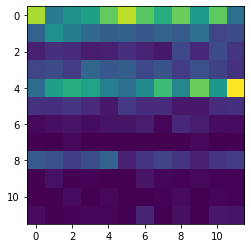

24000/24000 [==============================] - 2s 74us/sample


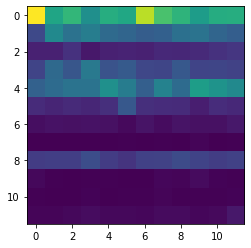

Train on 24000 samples, validate on 4800 samples
Epoch 31/32
24000/24000 [==============================] - 9s 360us/sample - loss: 2.4519 - acc: 0.1340 - val_loss: 2.4686 - val_acc: 0.1179
Epoch 32/32
24000/24000 [==============================] - 6s 266us/sample - loss: 2.4382 - acc: 0.1431 - val_loss: 2.4685 - val_acc: 0.1185
Train on 24000 samples, validate on 4800 samples
Epoch 33/34
24000/24000 [==============================] - 9s 361us/sample - loss: 2.4533 - acc: 0.1321 - val_loss: 2.4628 - val_acc: 0.1165
Epoch 34/34
24000/24000 [==============================] - 6s 270us/sample - loss: 2.4377 - acc: 0.1377 - val_loss: 2.4615 - val_acc: 0.1158
Train on 24000 samples, validate on 4800 samples
Epoch 35/36
24000/24000 [==============================] - 9s 354us/sample - loss: 2.4562 - acc: 0.1321 - val_loss: 2.4636 - val_acc: 0.1140
Epoch 36/36
24000/24000 [==============================] - 7s 274us/sample - loss: 2.4399 - acc: 0.1411 - val_loss: 2.4646 - val_acc: 0.1144
Train o

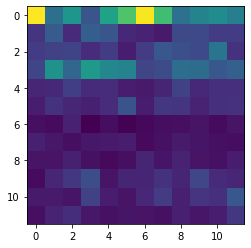

24000/24000 [==============================] - 2s 76us/sample


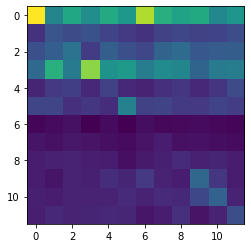

Train on 24000 samples, validate on 4800 samples
Epoch 41/42
24000/24000 [==============================] - 9s 363us/sample - loss: 2.4474 - acc: 0.1377 - val_loss: 2.4495 - val_acc: 0.1381
Epoch 42/42
24000/24000 [==============================] - 6s 271us/sample - loss: 2.4341 - acc: 0.1475 - val_loss: 2.4472 - val_acc: 0.1415
Train on 24000 samples, validate on 4800 samples
Epoch 43/44
24000/24000 [==============================] - 9s 363us/sample - loss: 2.4376 - acc: 0.1360 - val_loss: 2.4373 - val_acc: 0.1306
Epoch 44/44
24000/24000 [==============================] - 6s 269us/sample - loss: 2.4208 - acc: 0.1452 - val_loss: 2.4356 - val_acc: 0.1223
Train on 24000 samples, validate on 4800 samples
Epoch 45/46
24000/24000 [==============================] - 9s 360us/sample - loss: 2.4341 - acc: 0.1463 - val_loss: 2.4468 - val_acc: 0.1373
Epoch 46/46
24000/24000 [==============================] - 6s 271us/sample - loss: 2.4186 - acc: 0.1536 - val_loss: 2.4465 - val_acc: 0.1410
Train o

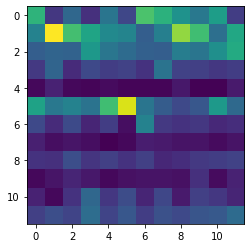

24000/24000 [==============================] - 2s 76us/sample


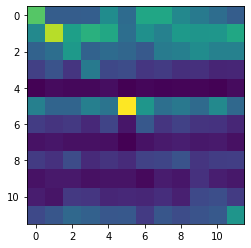

Train on 24000 samples, validate on 4800 samples
Epoch 51/52
24000/24000 [==============================] - 9s 366us/sample - loss: 2.4360 - acc: 0.1473 - val_loss: 2.4426 - val_acc: 0.1419
Epoch 52/52
24000/24000 [==============================] - 7s 273us/sample - loss: 2.4217 - acc: 0.1525 - val_loss: 2.4418 - val_acc: 0.1460
Train on 24000 samples, validate on 4800 samples
Epoch 53/54
24000/24000 [==============================] - 9s 359us/sample - loss: 2.4276 - acc: 0.1494 - val_loss: 2.4477 - val_acc: 0.1440
Epoch 54/54
24000/24000 [==============================] - 7s 275us/sample - loss: 2.4143 - acc: 0.1559 - val_loss: 2.4466 - val_acc: 0.1473
Train on 24000 samples, validate on 4800 samples
Epoch 55/56
24000/24000 [==============================] - 9s 359us/sample - loss: 2.4273 - acc: 0.1498 - val_loss: 2.4533 - val_acc: 0.1410
Epoch 56/56
24000/24000 [==============================] - 7s 272us/sample - loss: 2.4127 - acc: 0.1560 - val_loss: 2.4531 - val_acc: 0.1433
Train o

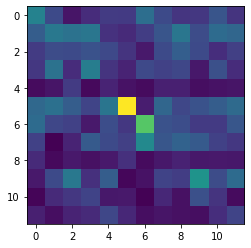

24000/24000 [==============================] - 2s 79us/sample


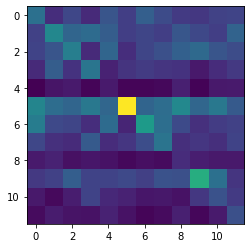

Train on 24000 samples, validate on 4800 samples
Epoch 61/62
24000/24000 [==============================] - 9s 367us/sample - loss: 2.4310 - acc: 0.1464 - val_loss: 2.4181 - val_acc: 0.1652
Epoch 62/62
24000/24000 [==============================] - 6s 270us/sample - loss: 2.4128 - acc: 0.1594 - val_loss: 2.4251 - val_acc: 0.1577
Train on 24000 samples, validate on 4800 samples
Epoch 63/64
24000/24000 [==============================] - 9s 369us/sample - loss: 2.4306 - acc: 0.1458 - val_loss: 2.4178 - val_acc: 0.1654
Epoch 64/64
24000/24000 [==============================] - 6s 270us/sample - loss: 2.4158 - acc: 0.1492 - val_loss: 2.4231 - val_acc: 0.1610
Train on 24000 samples, validate on 4800 samples
Epoch 65/66
24000/24000 [==============================] - 9s 366us/sample - loss: 2.4338 - acc: 0.1496 - val_loss: 2.4197 - val_acc: 0.1446
Epoch 66/66
24000/24000 [==============================] - 6s 271us/sample - loss: 2.4158 - acc: 0.1567 - val_loss: 2.4263 - val_acc: 0.1323
Train o

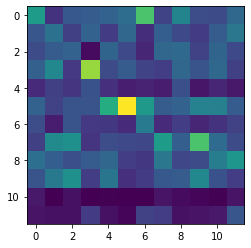

24000/24000 [==============================] - 2s 81us/sample


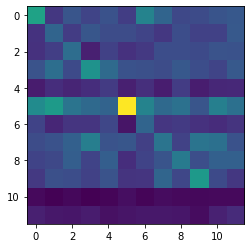

Train on 24000 samples, validate on 4800 samples
Epoch 71/72
24000/24000 [==============================] - 9s 374us/sample - loss: 2.4239 - acc: 0.1540 - val_loss: 2.4185 - val_acc: 0.1462
Epoch 72/72
24000/24000 [==============================] - 7s 279us/sample - loss: 2.4093 - acc: 0.1608 - val_loss: 2.4218 - val_acc: 0.1429
Train on 24000 samples, validate on 4800 samples
Epoch 73/74
24000/24000 [==============================] - 9s 374us/sample - loss: 2.4149 - acc: 0.1606 - val_loss: 2.4216 - val_acc: 0.1560
Epoch 74/74
24000/24000 [==============================] - 7s 278us/sample - loss: 2.3987 - acc: 0.1676 - val_loss: 2.4243 - val_acc: 0.1544
Train on 24000 samples, validate on 4800 samples
Epoch 75/76
24000/24000 [==============================] - 9s 368us/sample - loss: 2.4189 - acc: 0.1583 - val_loss: 2.4365 - val_acc: 0.1442
Epoch 76/76
24000/24000 [==============================] - 7s 277us/sample - loss: 2.4030 - acc: 0.1644 - val_loss: 2.4381 - val_acc: 0.1467
Train o

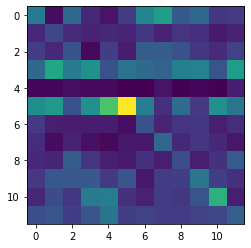

24000/24000 [==============================] - 2s 80us/sample


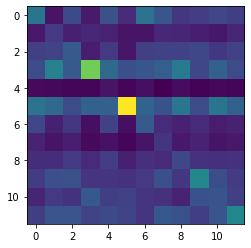

Train on 24000 samples, validate on 4800 samples
Epoch 81/82
24000/24000 [==============================] - 9s 365us/sample - loss: 2.4214 - acc: 0.1555 - val_loss: 2.4168 - val_acc: 0.1637
Epoch 82/82
24000/24000 [==============================] - 7s 284us/sample - loss: 2.4094 - acc: 0.1612 - val_loss: 2.4194 - val_acc: 0.1556
Train on 24000 samples, validate on 4800 samples
Epoch 83/84
24000/24000 [==============================] - 9s 372us/sample - loss: 2.4225 - acc: 0.1509 - val_loss: 2.3845 - val_acc: 0.1890
Epoch 84/84
24000/24000 [==============================] - 7s 281us/sample - loss: 2.4098 - acc: 0.1581 - val_loss: 2.3826 - val_acc: 0.1842
Train on 24000 samples, validate on 4800 samples
Epoch 85/86
24000/24000 [==============================] - 9s 371us/sample - loss: 2.4155 - acc: 0.1567 - val_loss: 2.4038 - val_acc: 0.1660
Epoch 86/86
24000/24000 [==============================] - 7s 277us/sample - loss: 2.4018 - acc: 0.1623 - val_loss: 2.4037 - val_acc: 0.1644
Train o

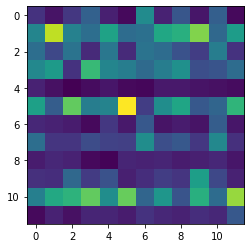

24000/24000 [==============================] - 2s 78us/sample


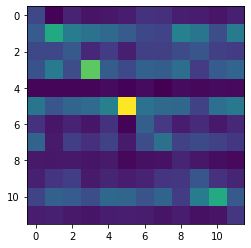

Train on 24000 samples, validate on 4800 samples
Epoch 91/92
24000/24000 [==============================] - 9s 372us/sample - loss: 2.3999 - acc: 0.1632 - val_loss: 2.3856 - val_acc: 0.1635
Epoch 92/92
24000/24000 [==============================] - 7s 281us/sample - loss: 2.3850 - acc: 0.1700 - val_loss: 2.3826 - val_acc: 0.1642
Train on 24000 samples, validate on 4800 samples
Epoch 93/94
24000/24000 [==============================] - 9s 374us/sample - loss: 2.4035 - acc: 0.1661 - val_loss: 2.4139 - val_acc: 0.1627
Epoch 94/94
24000/24000 [==============================] - 7s 277us/sample - loss: 2.3867 - acc: 0.1745 - val_loss: 2.4195 - val_acc: 0.1598
Train on 24000 samples, validate on 4800 samples
Epoch 95/96
24000/24000 [==============================] - 9s 371us/sample - loss: 2.4147 - acc: 0.1631 - val_loss: 2.3936 - val_acc: 0.1787
Epoch 96/96
24000/24000 [==============================] - 7s 281us/sample - loss: 2.3953 - acc: 0.1706 - val_loss: 2.3957 - val_acc: 0.1773
Train o

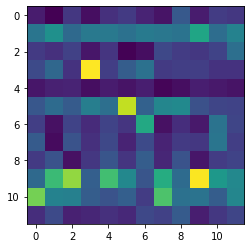

24000/24000 [==============================] - 2s 82us/sample


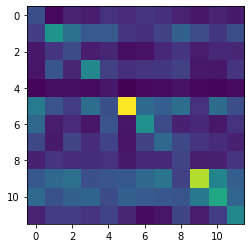

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_16 (Batc (None, 100, 25)           100       
_________________________________________________________________
lstm_8 (LSTM)                (None, 100, 32)           7424      
_________________________________________________________________
batch_normalization_17 (Batc (None, 100, 32)           128       
_________________________________________________________________
lstm_9 (LSTM)                (None, 8)                 1312      
_________________________________________________________________
batch_normalization_18 (Batc (None, 8)                 32        
_________________________________________________________________
dense_8 (Dense)              (None, 64)                576       
_________________________________________________________________
batch_normalization_19 (Batc (None, 64)               

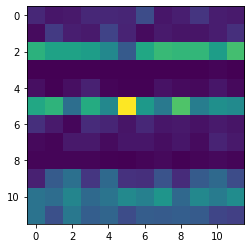

24000/24000 [==============================] - 3s 109us/sample


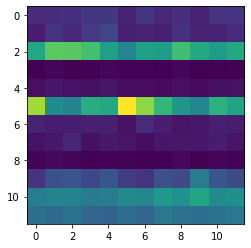

Train on 24000 samples, validate on 4800 samples
Epoch 11/12
24000/24000 [==============================] - 12s 519us/sample - loss: 2.5019 - acc: 0.1035 - val_loss: 2.4841 - val_acc: 0.0790
Epoch 12/12
24000/24000 [==============================] - 10s 429us/sample - loss: 2.4800 - acc: 0.1103 - val_loss: 2.4856 - val_acc: 0.0800
Train on 24000 samples, validate on 4800 samples
Epoch 13/14
24000/24000 [==============================] - 12s 517us/sample - loss: 2.4822 - acc: 0.1131 - val_loss: 2.4775 - val_acc: 0.0998
Epoch 14/14
24000/24000 [==============================] - 10s 431us/sample - loss: 2.4630 - acc: 0.1235 - val_loss: 2.4764 - val_acc: 0.1044
Train on 24000 samples, validate on 4800 samples
Epoch 15/16
24000/24000 [==============================] - 13s 530us/sample - loss: 2.4775 - acc: 0.1185 - val_loss: 2.4776 - val_acc: 0.0908
Epoch 16/16
24000/24000 [==============================] - 10s 434us/sample - loss: 2.4610 - acc: 0.1277 - val_loss: 2.4766 - val_acc: 0.0862
T

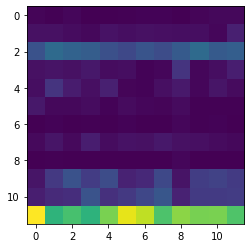

24000/24000 [==============================] - 2s 104us/sample


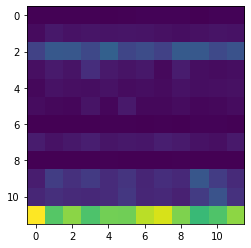

Train on 24000 samples, validate on 4800 samples
Epoch 21/22
24000/24000 [==============================] - 13s 521us/sample - loss: 2.4663 - acc: 0.1277 - val_loss: 2.4825 - val_acc: 0.0852
Epoch 22/22
24000/24000 [==============================] - 10s 433us/sample - loss: 2.4507 - acc: 0.1353 - val_loss: 2.4822 - val_acc: 0.0877
Train on 24000 samples, validate on 4800 samples
Epoch 23/24
24000/24000 [==============================] - 13s 527us/sample - loss: 2.4646 - acc: 0.1238 - val_loss: 2.4766 - val_acc: 0.1035
Epoch 24/24
24000/24000 [==============================] - 10s 431us/sample - loss: 2.4472 - acc: 0.1323 - val_loss: 2.4753 - val_acc: 0.1085
Train on 24000 samples, validate on 4800 samples
Epoch 25/26
24000/24000 [==============================] - 12s 520us/sample - loss: 2.4566 - acc: 0.1344 - val_loss: 2.4686 - val_acc: 0.1227
Epoch 26/26
24000/24000 [==============================] - 10s 434us/sample - loss: 2.4382 - acc: 0.1446 - val_loss: 2.4684 - val_acc: 0.1273
T

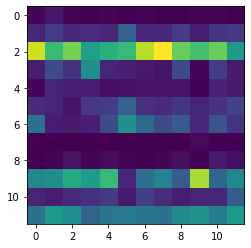

24000/24000 [==============================] - 3s 105us/sample


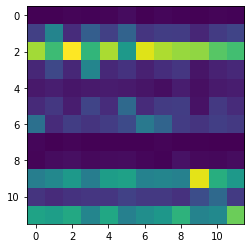

Train on 24000 samples, validate on 4800 samples
Epoch 31/32
24000/24000 [==============================] - 13s 525us/sample - loss: 2.4372 - acc: 0.1427 - val_loss: 2.4641 - val_acc: 0.1181
Epoch 32/32
24000/24000 [==============================] - 11s 442us/sample - loss: 2.4198 - acc: 0.1507 - val_loss: 2.4600 - val_acc: 0.1360
Train on 24000 samples, validate on 4800 samples
Epoch 33/34
24000/24000 [==============================] - 13s 526us/sample - loss: 2.4489 - acc: 0.1400 - val_loss: 2.4528 - val_acc: 0.1350
Epoch 34/34
24000/24000 [==============================] - 10s 431us/sample - loss: 2.4309 - acc: 0.1518 - val_loss: 2.4498 - val_acc: 0.1400
Train on 24000 samples, validate on 4800 samples
Epoch 35/36
24000/24000 [==============================] - 13s 523us/sample - loss: 2.4223 - acc: 0.1513 - val_loss: 2.4586 - val_acc: 0.1327
Epoch 36/36
24000/24000 [==============================] - 11s 439us/sample - loss: 2.4042 - acc: 0.1579 - val_loss: 2.4572 - val_acc: 0.1333
T

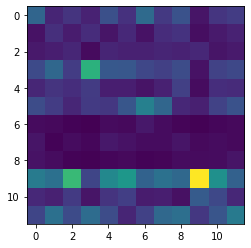

24000/24000 [==============================] - 3s 110us/sample


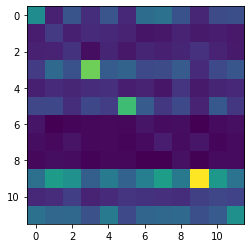

Train on 24000 samples, validate on 4800 samples
Epoch 41/42
24000/24000 [==============================] - 13s 529us/sample - loss: 2.4367 - acc: 0.1427 - val_loss: 2.4561 - val_acc: 0.1340
Epoch 42/42
24000/24000 [==============================] - 10s 431us/sample - loss: 2.4174 - acc: 0.1520 - val_loss: 2.4572 - val_acc: 0.1310
Train on 24000 samples, validate on 4800 samples
Epoch 43/44
24000/24000 [==============================] - 13s 527us/sample - loss: 2.4207 - acc: 0.1591 - val_loss: 2.4430 - val_acc: 0.1458
Epoch 44/44
24000/24000 [==============================] - 10s 437us/sample - loss: 2.4001 - acc: 0.1686 - val_loss: 2.4437 - val_acc: 0.1452
Train on 24000 samples, validate on 4800 samples
Epoch 45/46
24000/24000 [==============================] - 13s 531us/sample - loss: 2.4236 - acc: 0.1498 - val_loss: 2.4624 - val_acc: 0.1273
Epoch 46/46
24000/24000 [==============================] - 10s 437us/sample - loss: 2.4024 - acc: 0.1600 - val_loss: 2.4652 - val_acc: 0.1260
T

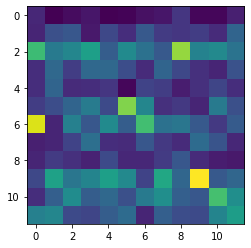

24000/24000 [==============================] - 3s 105us/sample


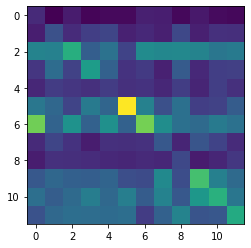

Train on 24000 samples, validate on 4800 samples
Epoch 51/52
24000/24000 [==============================] - 13s 524us/sample - loss: 2.4206 - acc: 0.1592 - val_loss: 2.4277 - val_acc: 0.1533
Epoch 52/52
24000/24000 [==============================] - 10s 431us/sample - loss: 2.4024 - acc: 0.1673 - val_loss: 2.4280 - val_acc: 0.1544
Train on 24000 samples, validate on 4800 samples
Epoch 53/54
24000/24000 [==============================] - 13s 528us/sample - loss: 2.4085 - acc: 0.1660 - val_loss: 2.4136 - val_acc: 0.1737
Epoch 54/54
24000/24000 [==============================] - 10s 436us/sample - loss: 2.3896 - acc: 0.1738 - val_loss: 2.4165 - val_acc: 0.1723
Train on 24000 samples, validate on 4800 samples
Epoch 55/56
24000/24000 [==============================] - 13s 524us/sample - loss: 2.4264 - acc: 0.1591 - val_loss: 2.4340 - val_acc: 0.1473
Epoch 56/56
24000/24000 [==============================] - 10s 434us/sample - loss: 2.4096 - acc: 0.1663 - val_loss: 2.4369 - val_acc: 0.1496
T

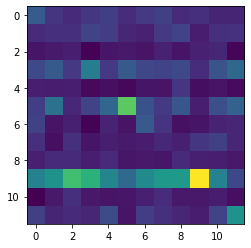

24000/24000 [==============================] - 3s 108us/sample


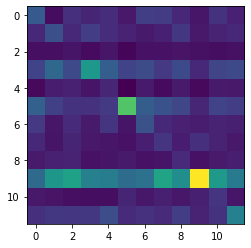

Train on 24000 samples, validate on 4800 samples
Epoch 61/62
24000/24000 [==============================] - 13s 527us/sample - loss: 2.4071 - acc: 0.1653 - val_loss: 2.4019 - val_acc: 0.1775
Epoch 62/62
24000/24000 [==============================] - 11s 438us/sample - loss: 2.3869 - acc: 0.1730 - val_loss: 2.4090 - val_acc: 0.1750
Train on 24000 samples, validate on 4800 samples
Epoch 63/64
24000/24000 [==============================] - 13s 526us/sample - loss: 2.4129 - acc: 0.1638 - val_loss: 2.4137 - val_acc: 0.1700
Epoch 64/64
24000/24000 [==============================] - 10s 435us/sample - loss: 2.3915 - acc: 0.1746 - val_loss: 2.4163 - val_acc: 0.1696
Train on 24000 samples, validate on 4800 samples
Epoch 65/66
24000/24000 [==============================] - 13s 523us/sample - loss: 2.4213 - acc: 0.1511 - val_loss: 2.4174 - val_acc: 0.1519
Epoch 66/66
24000/24000 [==============================] - 11s 439us/sample - loss: 2.4009 - acc: 0.1618 - val_loss: 2.4140 - val_acc: 0.1538
T

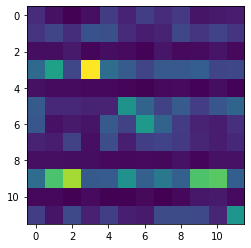

24000/24000 [==============================] - 3s 108us/sample


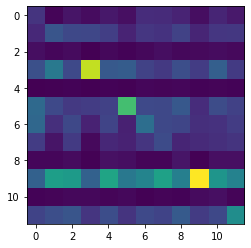

Train on 24000 samples, validate on 4800 samples
Epoch 71/72
24000/24000 [==============================] - 13s 527us/sample - loss: 2.3968 - acc: 0.1725 - val_loss: 2.4217 - val_acc: 0.1492
Epoch 72/72
24000/24000 [==============================] - 10s 434us/sample - loss: 2.3757 - acc: 0.1833 - val_loss: 2.4202 - val_acc: 0.1523
Train on 24000 samples, validate on 4800 samples
Epoch 73/74
24000/24000 [==============================] - 13s 525us/sample - loss: 2.3910 - acc: 0.1767 - val_loss: 2.4034 - val_acc: 0.1669
Epoch 74/74
24000/24000 [==============================] - 11s 440us/sample - loss: 2.3698 - acc: 0.1839 - val_loss: 2.4042 - val_acc: 0.1619
Train on 24000 samples, validate on 4800 samples
Epoch 75/76
24000/24000 [==============================] - 13s 532us/sample - loss: 2.3956 - acc: 0.1710 - val_loss: 2.3815 - val_acc: 0.1833
Epoch 76/76
24000/24000 [==============================] - 10s 437us/sample - loss: 2.3751 - acc: 0.1810 - val_loss: 2.3917 - val_acc: 0.1783
T

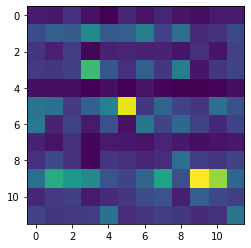

24000/24000 [==============================] - 3s 108us/sample


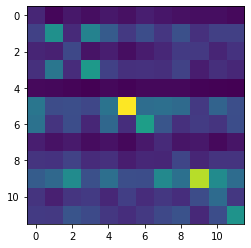

Train on 24000 samples, validate on 4800 samples
Epoch 81/82
24000/24000 [==============================] - 13s 522us/sample - loss: 2.4050 - acc: 0.1647 - val_loss: 2.3997 - val_acc: 0.1621
Epoch 82/82
24000/24000 [==============================] - 10s 430us/sample - loss: 2.3819 - acc: 0.1744 - val_loss: 2.4058 - val_acc: 0.1581
Train on 24000 samples, validate on 4800 samples
Epoch 83/84
24000/24000 [==============================] - 13s 526us/sample - loss: 2.3895 - acc: 0.1695 - val_loss: 2.4158 - val_acc: 0.1694
Epoch 84/84
24000/24000 [==============================] - 10s 431us/sample - loss: 2.3691 - acc: 0.1791 - val_loss: 2.4183 - val_acc: 0.1652
Train on 24000 samples, validate on 4800 samples
Epoch 85/86
24000/24000 [==============================] - 12s 521us/sample - loss: 2.3918 - acc: 0.1694 - val_loss: 2.3970 - val_acc: 0.1663
Epoch 86/86
24000/24000 [==============================] - 10s 430us/sample - loss: 2.3711 - acc: 0.1767 - val_loss: 2.3960 - val_acc: 0.1696
T

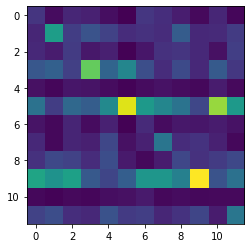

24000/24000 [==============================] - 3s 108us/sample


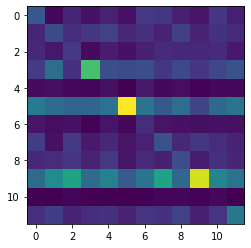

Train on 24000 samples, validate on 4800 samples
Epoch 91/92
24000/24000 [==============================] - 13s 527us/sample - loss: 2.3975 - acc: 0.1676 - val_loss: 2.4626 - val_acc: 0.1383
Epoch 92/92
24000/24000 [==============================] - 10s 435us/sample - loss: 2.3758 - acc: 0.1784 - val_loss: 2.4760 - val_acc: 0.1373
Train on 24000 samples, validate on 4800 samples
Epoch 93/94
24000/24000 [==============================] - 13s 523us/sample - loss: 2.3820 - acc: 0.1822 - val_loss: 2.4129 - val_acc: 0.1692
Epoch 94/94
24000/24000 [==============================] - 10s 431us/sample - loss: 2.3576 - acc: 0.1876 - val_loss: 2.4184 - val_acc: 0.1650
Train on 24000 samples, validate on 4800 samples
Epoch 95/96
24000/24000 [==============================] - 13s 530us/sample - loss: 2.3711 - acc: 0.1819 - val_loss: 2.3906 - val_acc: 0.1688
Epoch 96/96
24000/24000 [==============================] - 10s 436us/sample - loss: 2.3452 - acc: 0.1924 - val_loss: 2.3882 - val_acc: 0.1700
T

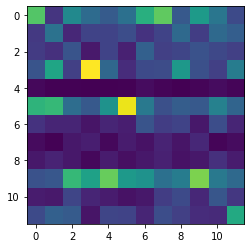

24000/24000 [==============================] - 3s 110us/sample


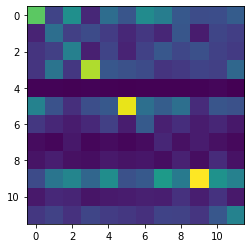

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_20 (Batc (None, 100, 25)           100       
_________________________________________________________________
lstm_10 (LSTM)               (None, 100, 64)           23040     
_________________________________________________________________
batch_normalization_21 (Batc (None, 100, 64)           256       
_________________________________________________________________
lstm_11 (LSTM)               (None, 8)                 2336      
_________________________________________________________________
batch_normalization_22 (Batc (None, 8)                 32        
_________________________________________________________________
dense_10 (Dense)             (None, 64)                576       
_________________________________________________________________
batch_normalization_23 (Batc (None, 64)               

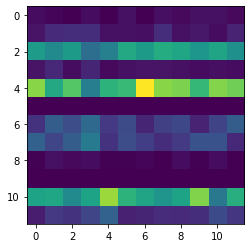

24000/24000 [==============================] - 5s 188us/sample


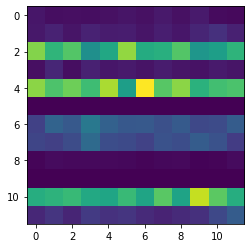

Train on 24000 samples, validate on 4800 samples
Epoch 11/12
24000/24000 [==============================] - 18s 749us/sample - loss: 2.4796 - acc: 0.1241 - val_loss: 2.4839 - val_acc: 0.0867
Epoch 12/12
24000/24000 [==============================] - 16s 656us/sample - loss: 2.4509 - acc: 0.1369 - val_loss: 2.4827 - val_acc: 0.0817
Train on 24000 samples, validate on 4800 samples
Epoch 13/14
24000/24000 [==============================] - 18s 750us/sample - loss: 2.4672 - acc: 0.1309 - val_loss: 2.4791 - val_acc: 0.1025
Epoch 14/14
24000/24000 [==============================] - 16s 656us/sample - loss: 2.4399 - acc: 0.1451 - val_loss: 2.4780 - val_acc: 0.1092
Train on 24000 samples, validate on 4800 samples
Epoch 15/16
24000/24000 [==============================] - 18s 761us/sample - loss: 2.4646 - acc: 0.1279 - val_loss: 2.4743 - val_acc: 0.1088
Epoch 16/16
24000/24000 [==============================] - 16s 667us/sample - loss: 2.4384 - acc: 0.1398 - val_loss: 2.4754 - val_acc: 0.1035
T

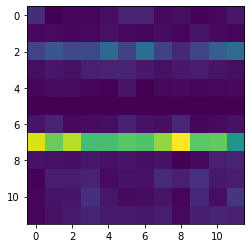

24000/24000 [==============================] - 5s 190us/sample


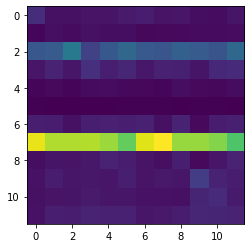

Train on 24000 samples, validate on 4800 samples
Epoch 21/22
24000/24000 [==============================] - 18s 757us/sample - loss: 2.4383 - acc: 0.1465 - val_loss: 2.4753 - val_acc: 0.0988
Epoch 22/22
24000/24000 [==============================] - 16s 647us/sample - loss: 2.4132 - acc: 0.1556 - val_loss: 2.4754 - val_acc: 0.0921
Train on 24000 samples, validate on 4800 samples
Epoch 23/24
24000/24000 [==============================] - 18s 750us/sample - loss: 2.4360 - acc: 0.1452 - val_loss: 2.4803 - val_acc: 0.0860
Epoch 24/24
24000/24000 [==============================] - 16s 671us/sample - loss: 2.4099 - acc: 0.1558 - val_loss: 2.4813 - val_acc: 0.0946
Train on 24000 samples, validate on 4800 samples
Epoch 25/26
24000/24000 [==============================] - 18s 754us/sample - loss: 2.4409 - acc: 0.1420 - val_loss: 2.4752 - val_acc: 0.0958
Epoch 26/26
24000/24000 [==============================] - 16s 653us/sample - loss: 2.4165 - acc: 0.1529 - val_loss: 2.4775 - val_acc: 0.0940
T

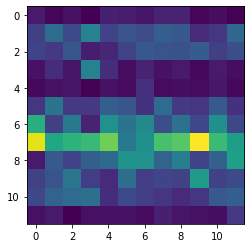

24000/24000 [==============================] - 5s 190us/sample


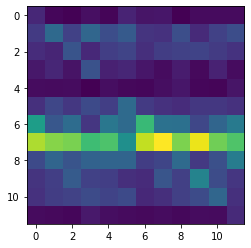

Train on 24000 samples, validate on 4800 samples
Epoch 31/32
24000/24000 [==============================] - 18s 762us/sample - loss: 2.4461 - acc: 0.1399 - val_loss: 2.4430 - val_acc: 0.1312
Epoch 32/32
24000/24000 [==============================] - 16s 655us/sample - loss: 2.4210 - acc: 0.1491 - val_loss: 2.4431 - val_acc: 0.1321
Train on 24000 samples, validate on 4800 samples
Epoch 33/34
24000/24000 [==============================] - 18s 754us/sample - loss: 2.4291 - acc: 0.1474 - val_loss: 2.4410 - val_acc: 0.1294
Epoch 34/34
24000/24000 [==============================] - 16s 657us/sample - loss: 2.4017 - acc: 0.1605 - val_loss: 2.4371 - val_acc: 0.1354
Train on 24000 samples, validate on 4800 samples
Epoch 35/36
24000/24000 [==============================] - 18s 764us/sample - loss: 2.4288 - acc: 0.1579 - val_loss: 2.4424 - val_acc: 0.1258
Epoch 36/36
24000/24000 [==============================] - 16s 654us/sample - loss: 2.4028 - acc: 0.1695 - val_loss: 2.4371 - val_acc: 0.1340
T

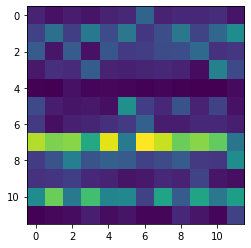

24000/24000 [==============================] - 5s 189us/sample


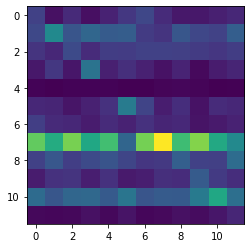

Train on 24000 samples, validate on 4800 samples
Epoch 41/42
24000/24000 [==============================] - 18s 753us/sample - loss: 2.4072 - acc: 0.1590 - val_loss: 2.4452 - val_acc: 0.1231
Epoch 42/42
24000/24000 [==============================] - 16s 656us/sample - loss: 2.3808 - acc: 0.1700 - val_loss: 2.4467 - val_acc: 0.1221
Train on 24000 samples, validate on 4800 samples
Epoch 43/44
24000/24000 [==============================] - 18s 756us/sample - loss: 2.4085 - acc: 0.1618 - val_loss: 2.4101 - val_acc: 0.1367
Epoch 44/44
24000/24000 [==============================] - 16s 656us/sample - loss: 2.3790 - acc: 0.1730 - val_loss: 2.4095 - val_acc: 0.1402
Train on 24000 samples, validate on 4800 samples
Epoch 45/46
24000/24000 [==============================] - 18s 764us/sample - loss: 2.4179 - acc: 0.1542 - val_loss: 2.4601 - val_acc: 0.1292
Epoch 46/46
24000/24000 [==============================] - 16s 671us/sample - loss: 2.3929 - acc: 0.1655 - val_loss: 2.4638 - val_acc: 0.1265
T

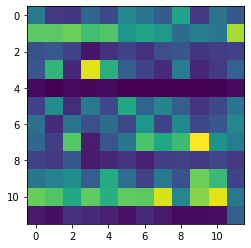

24000/24000 [==============================] - 5s 191us/sample


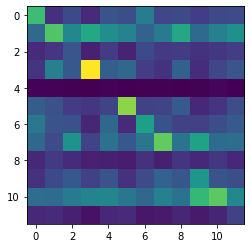

Train on 24000 samples, validate on 4800 samples
Epoch 51/52
24000/24000 [==============================] - 18s 763us/sample - loss: 2.3948 - acc: 0.1701 - val_loss: 2.4035 - val_acc: 0.1567
Epoch 52/52
24000/24000 [==============================] - 16s 652us/sample - loss: 2.3688 - acc: 0.1816 - val_loss: 2.4063 - val_acc: 0.1577
Train on 24000 samples, validate on 4800 samples
Epoch 53/54
24000/24000 [==============================] - 18s 754us/sample - loss: 2.3839 - acc: 0.1711 - val_loss: 2.4238 - val_acc: 0.1496
Epoch 54/54
24000/24000 [==============================] - 16s 677us/sample - loss: 2.3537 - acc: 0.1833 - val_loss: 2.4285 - val_acc: 0.1488
Train on 24000 samples, validate on 4800 samples
Epoch 55/56
24000/24000 [==============================] - 18s 758us/sample - loss: 2.3864 - acc: 0.1742 - val_loss: 2.4217 - val_acc: 0.1458
Epoch 56/56
24000/24000 [==============================] - 16s 663us/sample - loss: 2.3543 - acc: 0.1873 - val_loss: 2.4267 - val_acc: 0.1485
T

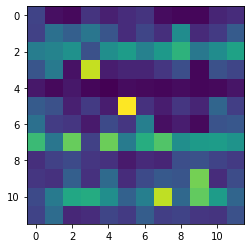

24000/24000 [==============================] - 5s 191us/sample


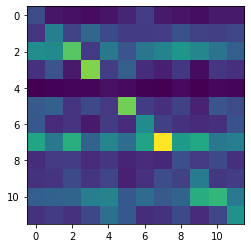

Train on 24000 samples, validate on 4800 samples
Epoch 61/62
24000/24000 [==============================] - 18s 766us/sample - loss: 2.3840 - acc: 0.1768 - val_loss: 2.3789 - val_acc: 0.1719
Epoch 62/62
24000/24000 [==============================] - 16s 658us/sample - loss: 2.3520 - acc: 0.1849 - val_loss: 2.3717 - val_acc: 0.1696
Train on 24000 samples, validate on 4800 samples
Epoch 63/64
24000/24000 [==============================] - 18s 760us/sample - loss: 2.3831 - acc: 0.1727 - val_loss: 2.3781 - val_acc: 0.1673
Epoch 64/64
24000/24000 [==============================] - 16s 663us/sample - loss: 2.3509 - acc: 0.1857 - val_loss: 2.3805 - val_acc: 0.1733
Train on 24000 samples, validate on 4800 samples
Epoch 65/66
24000/24000 [==============================] - 18s 764us/sample - loss: 2.3837 - acc: 0.1710 - val_loss: 2.3724 - val_acc: 0.1667
Epoch 66/66
24000/24000 [==============================] - 16s 648us/sample - loss: 2.3505 - acc: 0.1821 - val_loss: 2.3850 - val_acc: 0.1562
T

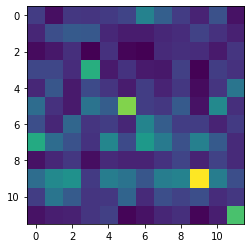

24000/24000 [==============================] - 5s 191us/sample


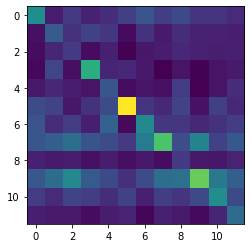

Train on 24000 samples, validate on 4800 samples
Epoch 71/72
24000/24000 [==============================] - 18s 759us/sample - loss: 2.3590 - acc: 0.1850 - val_loss: 2.3921 - val_acc: 0.1787
Epoch 72/72
24000/24000 [==============================] - 16s 657us/sample - loss: 2.3256 - acc: 0.1979 - val_loss: 2.3912 - val_acc: 0.1746
Train on 24000 samples, validate on 4800 samples
Epoch 73/74
24000/24000 [==============================] - 18s 748us/sample - loss: 2.3702 - acc: 0.1830 - val_loss: 2.3747 - val_acc: 0.1721
Epoch 74/74
24000/24000 [==============================] - 16s 662us/sample - loss: 2.3371 - acc: 0.1960 - val_loss: 2.3817 - val_acc: 0.1725
Train on 24000 samples, validate on 4800 samples
Epoch 75/76
24000/24000 [==============================] - 18s 766us/sample - loss: 2.3684 - acc: 0.1794 - val_loss: 2.3507 - val_acc: 0.2019
Epoch 76/76
24000/24000 [==============================] - 16s 671us/sample - loss: 2.3316 - acc: 0.1932 - val_loss: 2.3590 - val_acc: 0.1927
T

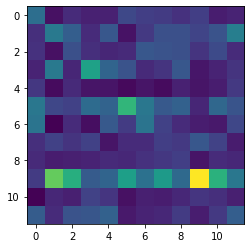

24000/24000 [==============================] - 4s 184us/sample


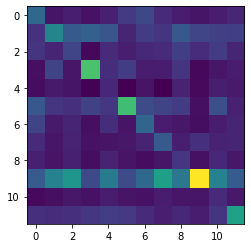

Train on 24000 samples, validate on 4800 samples
Epoch 81/82
24000/24000 [==============================] - 18s 763us/sample - loss: 2.3456 - acc: 0.1887 - val_loss: 2.4104 - val_acc: 0.1725
Epoch 82/82
24000/24000 [==============================] - 16s 672us/sample - loss: 2.3122 - acc: 0.2018 - val_loss: 2.4162 - val_acc: 0.1658
Train on 24000 samples, validate on 4800 samples
Epoch 83/84
24000/24000 [==============================] - 18s 757us/sample - loss: 2.3759 - acc: 0.1769 - val_loss: 2.3918 - val_acc: 0.1581
Epoch 84/84
24000/24000 [==============================] - 16s 672us/sample - loss: 2.3407 - acc: 0.1878 - val_loss: 2.3926 - val_acc: 0.1556
Train on 24000 samples, validate on 4800 samples
Epoch 85/86
24000/24000 [==============================] - 18s 755us/sample - loss: 2.3419 - acc: 0.1875 - val_loss: 2.3537 - val_acc: 0.1879
Epoch 86/86
24000/24000 [==============================] - 16s 665us/sample - loss: 2.3071 - acc: 0.2030 - val_loss: 2.3685 - val_acc: 0.1787
T

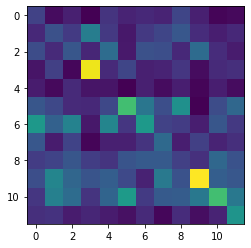

24000/24000 [==============================] - 4s 186us/sample


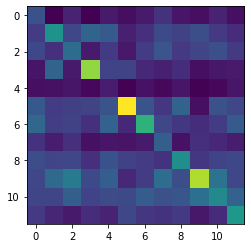

Train on 24000 samples, validate on 4800 samples
Epoch 91/92
24000/24000 [==============================] - 18s 758us/sample - loss: 2.3330 - acc: 0.1925 - val_loss: 2.3869 - val_acc: 0.1698
Epoch 92/92
24000/24000 [==============================] - 16s 673us/sample - loss: 2.2978 - acc: 0.2047 - val_loss: 2.3804 - val_acc: 0.1660
Train on 24000 samples, validate on 4800 samples
Epoch 93/94
24000/24000 [==============================] - 18s 763us/sample - loss: 2.3509 - acc: 0.1882 - val_loss: 2.3200 - val_acc: 0.1960
Epoch 94/94
24000/24000 [==============================] - 16s 654us/sample - loss: 2.3156 - acc: 0.2027 - val_loss: 2.3314 - val_acc: 0.1935
Train on 24000 samples, validate on 4800 samples
Epoch 95/96
24000/24000 [==============================] - 18s 761us/sample - loss: 2.3462 - acc: 0.1896 - val_loss: 2.3934 - val_acc: 0.1850
Epoch 96/96
24000/24000 [==============================] - 16s 659us/sample - loss: 2.3082 - acc: 0.2074 - val_loss: 2.4049 - val_acc: 0.1800
T

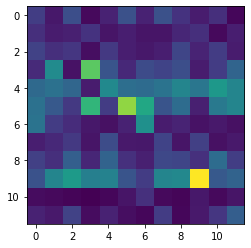

24000/24000 [==============================] - 4s 187us/sample


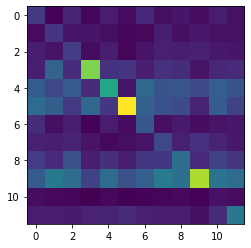

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_24 (Batc (None, 100, 25)           100       
_________________________________________________________________
lstm_12 (LSTM)               (None, 100, 8)            1088      
_________________________________________________________________
batch_normalization_25 (Batc (None, 100, 8)            32        
_________________________________________________________________
lstm_13 (LSTM)               (None, 16)                1600      
_________________________________________________________________
batch_normalization_26 (Batc (None, 16)                64        
_________________________________________________________________
dense_12 (Dense)             (None, 64)                1088      
_________________________________________________________________
batch_normalization_27 (Batc (None, 64)               

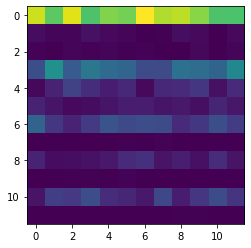

24000/24000 [==============================] - 2s 86us/sample


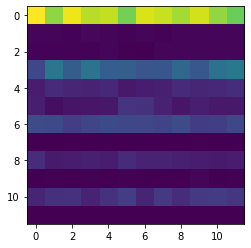

Train on 24000 samples, validate on 4800 samples
Epoch 11/12
24000/24000 [==============================] - 10s 412us/sample - loss: 2.4876 - acc: 0.1090 - val_loss: 2.4801 - val_acc: 0.0950
Epoch 12/12
24000/24000 [==============================] - 8s 317us/sample - loss: 2.4710 - acc: 0.1165 - val_loss: 2.4795 - val_acc: 0.1010
Train on 24000 samples, validate on 4800 samples
Epoch 13/14
24000/24000 [==============================] - 10s 410us/sample - loss: 2.4807 - acc: 0.1128 - val_loss: 2.4820 - val_acc: 0.0867
Epoch 14/14
24000/24000 [==============================] - 7s 312us/sample - loss: 2.4662 - acc: 0.1216 - val_loss: 2.4820 - val_acc: 0.0879
Train on 24000 samples, validate on 4800 samples
Epoch 15/16
24000/24000 [==============================] - 10s 411us/sample - loss: 2.4833 - acc: 0.1073 - val_loss: 2.4793 - val_acc: 0.0925
Epoch 16/16
24000/24000 [==============================] - 8s 319us/sample - loss: 2.4707 - acc: 0.1142 - val_loss: 2.4787 - val_acc: 0.0967
Trai

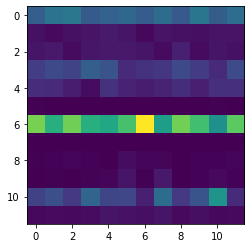

24000/24000 [==============================] - 2s 86us/sample


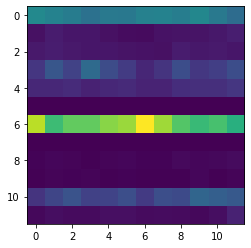

Train on 24000 samples, validate on 4800 samples
Epoch 21/22
24000/24000 [==============================] - 10s 407us/sample - loss: 2.4682 - acc: 0.1197 - val_loss: 2.4727 - val_acc: 0.0962
Epoch 22/22
24000/24000 [==============================] - 8s 318us/sample - loss: 2.4561 - acc: 0.1265 - val_loss: 2.4712 - val_acc: 0.1008
Train on 24000 samples, validate on 4800 samples
Epoch 23/24
24000/24000 [==============================] - 10s 413us/sample - loss: 2.4672 - acc: 0.1150 - val_loss: 2.4673 - val_acc: 0.1056
Epoch 24/24
24000/24000 [==============================] - 8s 319us/sample - loss: 2.4513 - acc: 0.1243 - val_loss: 2.4667 - val_acc: 0.1106
Train on 24000 samples, validate on 4800 samples
Epoch 25/26
24000/24000 [==============================] - 10s 410us/sample - loss: 2.4563 - acc: 0.1255 - val_loss: 2.4792 - val_acc: 0.0923
Epoch 26/26
24000/24000 [==============================] - 8s 314us/sample - loss: 2.4433 - acc: 0.1331 - val_loss: 2.4780 - val_acc: 0.0898
Trai

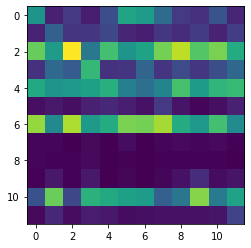

24000/24000 [==============================] - 2s 84us/sample


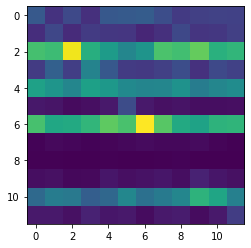

Train on 24000 samples, validate on 4800 samples
Epoch 31/32
24000/24000 [==============================] - 10s 411us/sample - loss: 2.4628 - acc: 0.1272 - val_loss: 2.4596 - val_acc: 0.1308
Epoch 32/32
24000/24000 [==============================] - 8s 318us/sample - loss: 2.4503 - acc: 0.1314 - val_loss: 2.4572 - val_acc: 0.1213
Train on 24000 samples, validate on 4800 samples
Epoch 33/34
24000/24000 [==============================] - 10s 416us/sample - loss: 2.4483 - acc: 0.1342 - val_loss: 2.4683 - val_acc: 0.1042
Epoch 34/34
24000/24000 [==============================] - 8s 318us/sample - loss: 2.4364 - acc: 0.1409 - val_loss: 2.4647 - val_acc: 0.1073
Train on 24000 samples, validate on 4800 samples
Epoch 35/36
24000/24000 [==============================] - 10s 410us/sample - loss: 2.4508 - acc: 0.1310 - val_loss: 2.4667 - val_acc: 0.1148
Epoch 36/36
24000/24000 [==============================] - 8s 328us/sample - loss: 2.4400 - acc: 0.1360 - val_loss: 2.4648 - val_acc: 0.1160
Trai

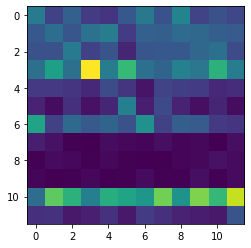

24000/24000 [==============================] - 2s 85us/sample


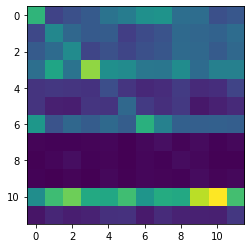

Train on 24000 samples, validate on 4800 samples
Epoch 41/42
24000/24000 [==============================] - 10s 409us/sample - loss: 2.4412 - acc: 0.1383 - val_loss: 2.4539 - val_acc: 0.1363
Epoch 42/42
24000/24000 [==============================] - 8s 314us/sample - loss: 2.4286 - acc: 0.1485 - val_loss: 2.4520 - val_acc: 0.1410
Train on 24000 samples, validate on 4800 samples
Epoch 43/44
24000/24000 [==============================] - 10s 413us/sample - loss: 2.4321 - acc: 0.1491 - val_loss: 2.4671 - val_acc: 0.1181
Epoch 44/44
24000/24000 [==============================] - 8s 316us/sample - loss: 2.4185 - acc: 0.1511 - val_loss: 2.4698 - val_acc: 0.1163
Train on 24000 samples, validate on 4800 samples
Epoch 45/46
24000/24000 [==============================] - 10s 407us/sample - loss: 2.4404 - acc: 0.1387 - val_loss: 2.4567 - val_acc: 0.1252
Epoch 46/46
24000/24000 [==============================] - 8s 315us/sample - loss: 2.4262 - acc: 0.1452 - val_loss: 2.4613 - val_acc: 0.1198
Trai

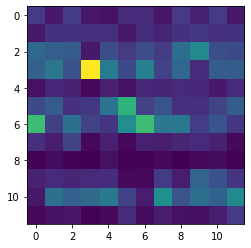

24000/24000 [==============================] - 2s 84us/sample


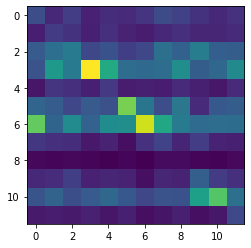

Train on 24000 samples, validate on 4800 samples
Epoch 51/52
24000/24000 [==============================] - 10s 409us/sample - loss: 2.4246 - acc: 0.1500 - val_loss: 2.4239 - val_acc: 0.1415
Epoch 52/52
24000/24000 [==============================] - 7s 309us/sample - loss: 2.4119 - acc: 0.1542 - val_loss: 2.4270 - val_acc: 0.1402
Train on 24000 samples, validate on 4800 samples
Epoch 53/54
24000/24000 [==============================] - 10s 406us/sample - loss: 2.4282 - acc: 0.1480 - val_loss: 2.4561 - val_acc: 0.1248
Epoch 54/54
24000/24000 [==============================] - 8s 314us/sample - loss: 2.4121 - acc: 0.1548 - val_loss: 2.4569 - val_acc: 0.1302
Train on 24000 samples, validate on 4800 samples
Epoch 55/56
24000/24000 [==============================] - 10s 410us/sample - loss: 2.4312 - acc: 0.1426 - val_loss: 2.4527 - val_acc: 0.1279
Epoch 56/56
24000/24000 [==============================] - 8s 315us/sample - loss: 2.4154 - acc: 0.1460 - val_loss: 2.4555 - val_acc: 0.1344
Trai

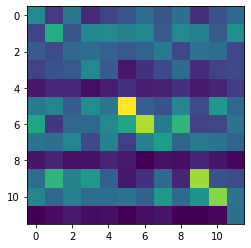

24000/24000 [==============================] - 2s 87us/sample


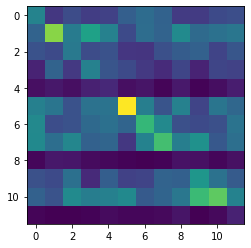

Train on 24000 samples, validate on 4800 samples
Epoch 61/62
24000/24000 [==============================] - 10s 406us/sample - loss: 2.4398 - acc: 0.1383 - val_loss: 2.4273 - val_acc: 0.1381
Epoch 62/62
24000/24000 [==============================] - 8s 315us/sample - loss: 2.4262 - acc: 0.1429 - val_loss: 2.4339 - val_acc: 0.1423
Train on 24000 samples, validate on 4800 samples
Epoch 63/64
24000/24000 [==============================] - 10s 406us/sample - loss: 2.4297 - acc: 0.1400 - val_loss: 2.4495 - val_acc: 0.1277
Epoch 64/64
24000/24000 [==============================] - 7s 310us/sample - loss: 2.4158 - acc: 0.1518 - val_loss: 2.4486 - val_acc: 0.1248
Train on 24000 samples, validate on 4800 samples
Epoch 65/66
24000/24000 [==============================] - 10s 406us/sample - loss: 2.4305 - acc: 0.1401 - val_loss: 2.4386 - val_acc: 0.1338
Epoch 66/66
24000/24000 [==============================] - 7s 309us/sample - loss: 2.4163 - acc: 0.1476 - val_loss: 2.4377 - val_acc: 0.1369
Trai

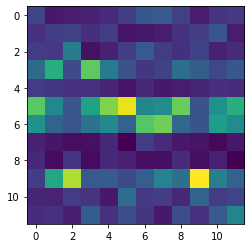

24000/24000 [==============================] - 2s 84us/sample


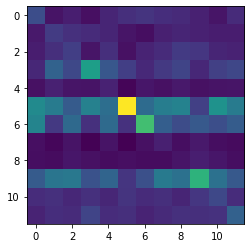

Train on 24000 samples, validate on 4800 samples
Epoch 71/72
24000/24000 [==============================] - 10s 404us/sample - loss: 2.4126 - acc: 0.1560 - val_loss: 2.4516 - val_acc: 0.1242
Epoch 72/72
24000/24000 [==============================] - 7s 311us/sample - loss: 2.3976 - acc: 0.1631 - val_loss: 2.4604 - val_acc: 0.1235
Train on 24000 samples, validate on 4800 samples
Epoch 73/74
24000/24000 [==============================] - 10s 407us/sample - loss: 2.4194 - acc: 0.1547 - val_loss: 2.4556 - val_acc: 0.1165
Epoch 74/74
24000/24000 [==============================] - 8s 314us/sample - loss: 2.4047 - acc: 0.1594 - val_loss: 2.4573 - val_acc: 0.1235
Train on 24000 samples, validate on 4800 samples
Epoch 75/76
24000/24000 [==============================] - 10s 409us/sample - loss: 2.4185 - acc: 0.1517 - val_loss: 2.4389 - val_acc: 0.1496
Epoch 76/76
24000/24000 [==============================] - 8s 313us/sample - loss: 2.4035 - acc: 0.1540 - val_loss: 2.4430 - val_acc: 0.1515
Trai

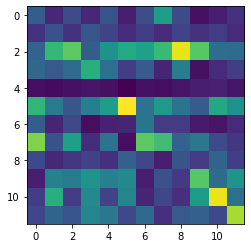

24000/24000 [==============================] - 2s 86us/sample


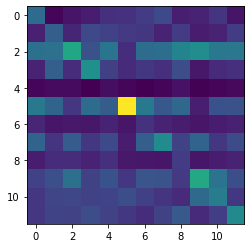

Train on 24000 samples, validate on 4800 samples
Epoch 81/82
24000/24000 [==============================] - 10s 408us/sample - loss: 2.4223 - acc: 0.1437 - val_loss: 2.4398 - val_acc: 0.1513
Epoch 82/82
24000/24000 [==============================] - 8s 314us/sample - loss: 2.4062 - acc: 0.1509 - val_loss: 2.4447 - val_acc: 0.1448
Train on 24000 samples, validate on 4800 samples
Epoch 83/84
24000/24000 [==============================] - 10s 406us/sample - loss: 2.4215 - acc: 0.1532 - val_loss: 2.4219 - val_acc: 0.1554
Epoch 84/84
24000/24000 [==============================] - 8s 313us/sample - loss: 2.4049 - acc: 0.1570 - val_loss: 2.4246 - val_acc: 0.1552
Train on 24000 samples, validate on 4800 samples
Epoch 85/86
24000/24000 [==============================] - 10s 405us/sample - loss: 2.4116 - acc: 0.1589 - val_loss: 2.4062 - val_acc: 0.1606
Epoch 86/86
24000/24000 [==============================] - 8s 318us/sample - loss: 2.3953 - acc: 0.1633 - val_loss: 2.4105 - val_acc: 0.1581
Trai

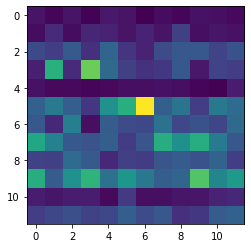

24000/24000 [==============================] - 2s 86us/sample


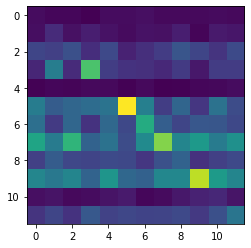

Train on 24000 samples, validate on 4800 samples
Epoch 91/92
24000/24000 [==============================] - 10s 415us/sample - loss: 2.4215 - acc: 0.1496 - val_loss: 2.4193 - val_acc: 0.1360
Epoch 92/92
24000/24000 [==============================] - 7s 312us/sample - loss: 2.4038 - acc: 0.1575 - val_loss: 2.4307 - val_acc: 0.1319
Train on 24000 samples, validate on 4800 samples
Epoch 93/94
24000/24000 [==============================] - 10s 410us/sample - loss: 2.3976 - acc: 0.1604 - val_loss: 2.4181 - val_acc: 0.1637
Epoch 94/94
24000/24000 [==============================] - 8s 314us/sample - loss: 2.3805 - acc: 0.1700 - val_loss: 2.4214 - val_acc: 0.1612
Train on 24000 samples, validate on 4800 samples
Epoch 95/96
24000/24000 [==============================] - 10s 408us/sample - loss: 2.3933 - acc: 0.1743 - val_loss: 2.3908 - val_acc: 0.1669
Epoch 96/96
24000/24000 [==============================] - 7s 312us/sample - loss: 2.3805 - acc: 0.1783 - val_loss: 2.3891 - val_acc: 0.1715
Trai

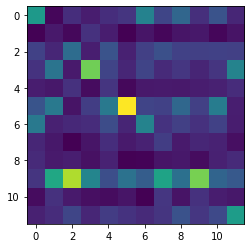

24000/24000 [==============================] - 2s 85us/sample


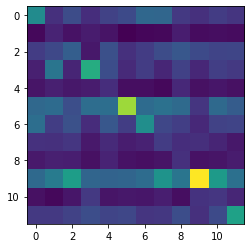

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_28 (Batc (None, 100, 25)           100       
_________________________________________________________________
lstm_14 (LSTM)               (None, 100, 16)           2688      
_________________________________________________________________
batch_normalization_29 (Batc (None, 100, 16)           64        
_________________________________________________________________
lstm_15 (LSTM)               (None, 16)                2112      
_________________________________________________________________
batch_normalization_30 (Batc (None, 16)                64        
_________________________________________________________________
dense_14 (Dense)             (None, 64)                1088      
_________________________________________________________________
batch_normalization_31 (Batc (None, 64)               

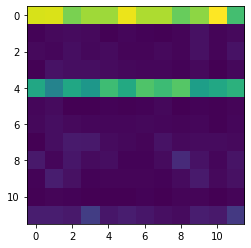

24000/24000 [==============================] - 3s 110us/sample


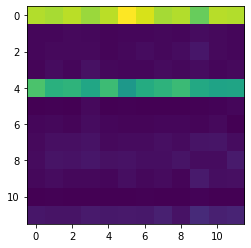

Train on 24000 samples, validate on 4800 samples
Epoch 11/12
24000/24000 [==============================] - 11s 479us/sample - loss: 2.4964 - acc: 0.1091 - val_loss: 2.4821 - val_acc: 0.0871
Epoch 12/12
24000/24000 [==============================] - 9s 390us/sample - loss: 2.4765 - acc: 0.1186 - val_loss: 2.4811 - val_acc: 0.0887
Train on 24000 samples, validate on 4800 samples
Epoch 13/14
24000/24000 [==============================] - 12s 492us/sample - loss: 2.4775 - acc: 0.1189 - val_loss: 2.4808 - val_acc: 0.0869
Epoch 14/14
24000/24000 [==============================] - 9s 391us/sample - loss: 2.4589 - acc: 0.1268 - val_loss: 2.4797 - val_acc: 0.0856
Train on 24000 samples, validate on 4800 samples
Epoch 15/16
24000/24000 [==============================] - 12s 489us/sample - loss: 2.4702 - acc: 0.1255 - val_loss: 2.4812 - val_acc: 0.0985
Epoch 16/16
24000/24000 [==============================] - 9s 393us/sample - loss: 2.4514 - acc: 0.1353 - val_loss: 2.4799 - val_acc: 0.1002
Trai

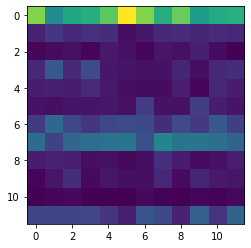

24000/24000 [==============================] - 3s 109us/sample


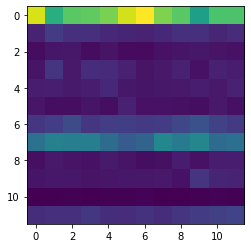

Train on 24000 samples, validate on 4800 samples
Epoch 21/22
24000/24000 [==============================] - 12s 480us/sample - loss: 2.4589 - acc: 0.1253 - val_loss: 2.4711 - val_acc: 0.1088
Epoch 22/22
24000/24000 [==============================] - 10s 398us/sample - loss: 2.4446 - acc: 0.1362 - val_loss: 2.4699 - val_acc: 0.1104
Train on 24000 samples, validate on 4800 samples
Epoch 23/24
24000/24000 [==============================] - 12s 490us/sample - loss: 2.4616 - acc: 0.1285 - val_loss: 2.4706 - val_acc: 0.1163
Epoch 24/24
24000/24000 [==============================] - 9s 390us/sample - loss: 2.4458 - acc: 0.1386 - val_loss: 2.4704 - val_acc: 0.1200
Train on 24000 samples, validate on 4800 samples
Epoch 25/26
24000/24000 [==============================] - 12s 500us/sample - loss: 2.4551 - acc: 0.1287 - val_loss: 2.4748 - val_acc: 0.0950
Epoch 26/26
24000/24000 [==============================] - 10s 407us/sample - loss: 2.4384 - acc: 0.1390 - val_loss: 2.4750 - val_acc: 0.0950
Tr

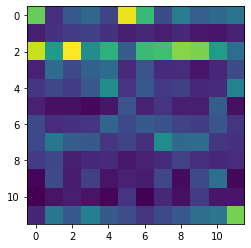

24000/24000 [==============================] - 3s 105us/sample


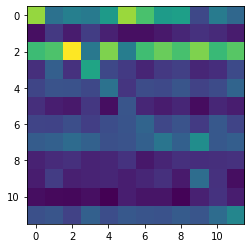

Train on 24000 samples, validate on 4800 samples
Epoch 31/32
24000/24000 [==============================] - 12s 493us/sample - loss: 2.4402 - acc: 0.1399 - val_loss: 2.4569 - val_acc: 0.1283
Epoch 32/32
24000/24000 [==============================] - 9s 393us/sample - loss: 2.4241 - acc: 0.1497 - val_loss: 2.4564 - val_acc: 0.1277
Train on 24000 samples, validate on 4800 samples
Epoch 33/34
24000/24000 [==============================] - 12s 488us/sample - loss: 2.4407 - acc: 0.1445 - val_loss: 2.4464 - val_acc: 0.1277
Epoch 34/34
24000/24000 [==============================] - 9s 391us/sample - loss: 2.4268 - acc: 0.1538 - val_loss: 2.4455 - val_acc: 0.1302
Train on 24000 samples, validate on 4800 samples
Epoch 35/36
24000/24000 [==============================] - 12s 489us/sample - loss: 2.4487 - acc: 0.1347 - val_loss: 2.4485 - val_acc: 0.1279
Epoch 36/36
24000/24000 [==============================] - 9s 390us/sample - loss: 2.4341 - acc: 0.1402 - val_loss: 2.4435 - val_acc: 0.1300
Trai

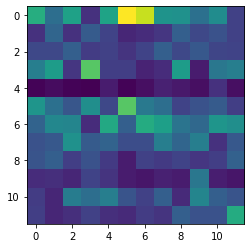

24000/24000 [==============================] - 3s 107us/sample


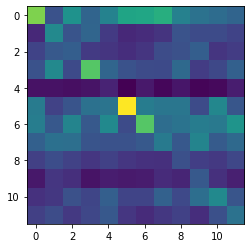

Train on 24000 samples, validate on 4800 samples
Epoch 41/42
24000/24000 [==============================] - 12s 487us/sample - loss: 2.4215 - acc: 0.1564 - val_loss: 2.4483 - val_acc: 0.1179
Epoch 42/42
24000/24000 [==============================] - 9s 385us/sample - loss: 2.4038 - acc: 0.1615 - val_loss: 2.4509 - val_acc: 0.1185
Train on 24000 samples, validate on 4800 samples
Epoch 43/44
24000/24000 [==============================] - 12s 479us/sample - loss: 2.4245 - acc: 0.1495 - val_loss: 2.4380 - val_acc: 0.1265
Epoch 44/44
24000/24000 [==============================] - 9s 395us/sample - loss: 2.4086 - acc: 0.1557 - val_loss: 2.4337 - val_acc: 0.1287
Train on 24000 samples, validate on 4800 samples
Epoch 45/46
24000/24000 [==============================] - 12s 491us/sample - loss: 2.4277 - acc: 0.1492 - val_loss: 2.4249 - val_acc: 0.1435
Epoch 46/46
24000/24000 [==============================] - 9s 389us/sample - loss: 2.4066 - acc: 0.1596 - val_loss: 2.4216 - val_acc: 0.1425
Trai

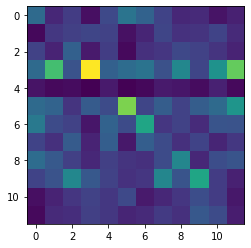

24000/24000 [==============================] - 3s 109us/sample


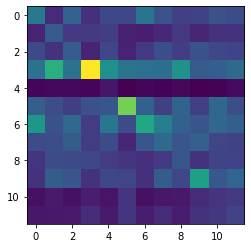

Train on 24000 samples, validate on 4800 samples
Epoch 51/52
24000/24000 [==============================] - 12s 481us/sample - loss: 2.4239 - acc: 0.1503 - val_loss: 2.4413 - val_acc: 0.1415
Epoch 52/52
24000/24000 [==============================] - 9s 391us/sample - loss: 2.4045 - acc: 0.1591 - val_loss: 2.4462 - val_acc: 0.1360
Train on 24000 samples, validate on 4800 samples
Epoch 53/54
24000/24000 [==============================] - 12s 484us/sample - loss: 2.4195 - acc: 0.1498 - val_loss: 2.4193 - val_acc: 0.1363
Epoch 54/54
24000/24000 [==============================] - 9s 390us/sample - loss: 2.3986 - acc: 0.1618 - val_loss: 2.4227 - val_acc: 0.1304
Train on 24000 samples, validate on 4800 samples
Epoch 55/56
24000/24000 [==============================] - 12s 481us/sample - loss: 2.4105 - acc: 0.1567 - val_loss: 2.3963 - val_acc: 0.1650
Epoch 56/56
24000/24000 [==============================] - 9s 382us/sample - loss: 2.3923 - acc: 0.1671 - val_loss: 2.3991 - val_acc: 0.1615
Trai

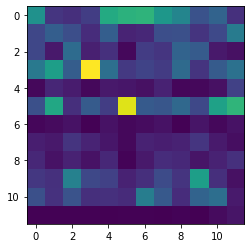

24000/24000 [==============================] - 3s 106us/sample


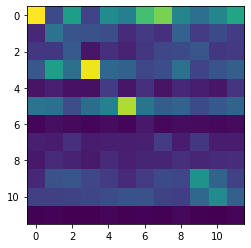

Train on 24000 samples, validate on 4800 samples
Epoch 61/62
24000/24000 [==============================] - 12s 482us/sample - loss: 2.4143 - acc: 0.1577 - val_loss: 2.4037 - val_acc: 0.1642
Epoch 62/62
24000/24000 [==============================] - 9s 386us/sample - loss: 2.3946 - acc: 0.1678 - val_loss: 2.4051 - val_acc: 0.1665
Train on 24000 samples, validate on 4800 samples
Epoch 63/64
24000/24000 [==============================] - 12s 487us/sample - loss: 2.4030 - acc: 0.1621 - val_loss: 2.3931 - val_acc: 0.1644
Epoch 64/64
24000/24000 [==============================] - 9s 383us/sample - loss: 2.3832 - acc: 0.1706 - val_loss: 2.3979 - val_acc: 0.1644
Train on 24000 samples, validate on 4800 samples
Epoch 65/66
24000/24000 [==============================] - 11s 479us/sample - loss: 2.3988 - acc: 0.1731 - val_loss: 2.4139 - val_acc: 0.1554
Epoch 66/66
24000/24000 [==============================] - 9s 388us/sample - loss: 2.3817 - acc: 0.1789 - val_loss: 2.4106 - val_acc: 0.1658
Trai

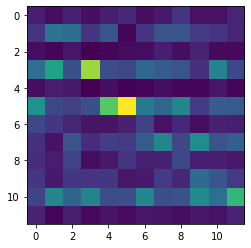

24000/24000 [==============================] - 3s 109us/sample


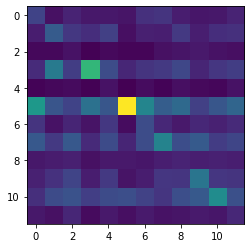

Train on 24000 samples, validate on 4800 samples
Epoch 71/72
24000/24000 [==============================] - 11s 478us/sample - loss: 2.4155 - acc: 0.1562 - val_loss: 2.3957 - val_acc: 0.1565
Epoch 72/72
24000/24000 [==============================] - 9s 390us/sample - loss: 2.3946 - acc: 0.1649 - val_loss: 2.4051 - val_acc: 0.1546
Train on 24000 samples, validate on 4800 samples
Epoch 73/74
24000/24000 [==============================] - 11s 478us/sample - loss: 2.3942 - acc: 0.1682 - val_loss: 2.3972 - val_acc: 0.1692
Epoch 74/74
24000/24000 [==============================] - 9s 386us/sample - loss: 2.3749 - acc: 0.1765 - val_loss: 2.3962 - val_acc: 0.1652
Train on 24000 samples, validate on 4800 samples
Epoch 75/76
24000/24000 [==============================] - 12s 480us/sample - loss: 2.4034 - acc: 0.1584 - val_loss: 2.3811 - val_acc: 0.1675
Epoch 76/76
24000/24000 [==============================] - 9s 383us/sample - loss: 2.3844 - acc: 0.1670 - val_loss: 2.3782 - val_acc: 0.1715
Trai

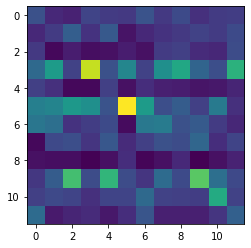

24000/24000 [==============================] - 3s 106us/sample


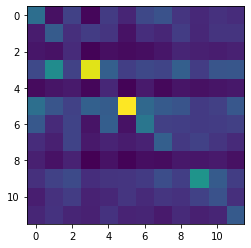

Train on 24000 samples, validate on 4800 samples
Epoch 81/82
24000/24000 [==============================] - 11s 476us/sample - loss: 2.3896 - acc: 0.1698 - val_loss: 2.3841 - val_acc: 0.1800
Epoch 82/82
24000/24000 [==============================] - 9s 382us/sample - loss: 2.3734 - acc: 0.1783 - val_loss: 2.3795 - val_acc: 0.1802
Train on 24000 samples, validate on 4800 samples
Epoch 83/84
24000/24000 [==============================] - 12s 484us/sample - loss: 2.3821 - acc: 0.1735 - val_loss: 2.3931 - val_acc: 0.1629
Epoch 84/84
24000/24000 [==============================] - 9s 383us/sample - loss: 2.3622 - acc: 0.1827 - val_loss: 2.3960 - val_acc: 0.1531
Train on 24000 samples, validate on 4800 samples
Epoch 85/86
24000/24000 [==============================] - 11s 474us/sample - loss: 2.4083 - acc: 0.1585 - val_loss: 2.3880 - val_acc: 0.1800
Epoch 86/86
24000/24000 [==============================] - 9s 383us/sample - loss: 2.3872 - acc: 0.1677 - val_loss: 2.3892 - val_acc: 0.1725
Trai

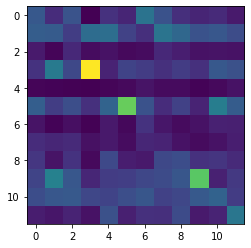

24000/24000 [==============================] - 3s 113us/sample


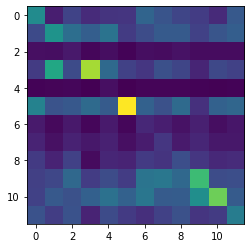

Train on 24000 samples, validate on 4800 samples
Epoch 91/92
24000/24000 [==============================] - 11s 471us/sample - loss: 2.3902 - acc: 0.1643 - val_loss: 2.4148 - val_acc: 0.1715
Epoch 92/92
24000/24000 [==============================] - 9s 382us/sample - loss: 2.3707 - acc: 0.1718 - val_loss: 2.4127 - val_acc: 0.1719
Train on 24000 samples, validate on 4800 samples
Epoch 93/94
24000/24000 [==============================] - 11s 470us/sample - loss: 2.3828 - acc: 0.1783 - val_loss: 2.4130 - val_acc: 0.1565
Epoch 94/94
24000/24000 [==============================] - 9s 382us/sample - loss: 2.3611 - acc: 0.1865 - val_loss: 2.4197 - val_acc: 0.1604
Train on 24000 samples, validate on 4800 samples
Epoch 95/96
24000/24000 [==============================] - 12s 481us/sample - loss: 2.3807 - acc: 0.1753 - val_loss: 2.4047 - val_acc: 0.1673
Epoch 96/96
24000/24000 [==============================] - 9s 379us/sample - loss: 2.3607 - acc: 0.1830 - val_loss: 2.4082 - val_acc: 0.1688
Trai

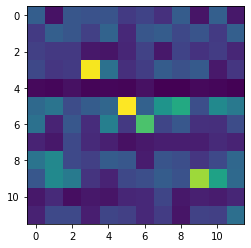

24000/24000 [==============================] - 3s 106us/sample


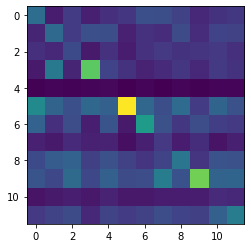

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_32 (Batc (None, 100, 25)           100       
_________________________________________________________________
lstm_16 (LSTM)               (None, 100, 32)           7424      
_________________________________________________________________
batch_normalization_33 (Batc (None, 100, 32)           128       
_________________________________________________________________
lstm_17 (LSTM)               (None, 16)                3136      
_________________________________________________________________
batch_normalization_34 (Batc (None, 16)                64        
_________________________________________________________________
dense_16 (Dense)             (None, 64)                1088      
_________________________________________________________________
batch_normalization_35 (Batc (None, 64)               

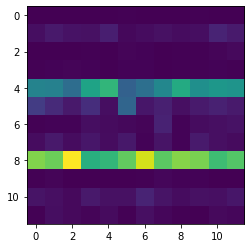

24000/24000 [==============================] - 3s 139us/sample


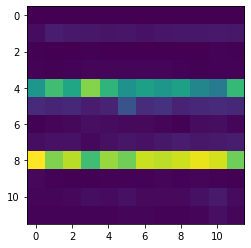

Train on 24000 samples, validate on 4800 samples
Epoch 11/12
24000/24000 [==============================] - 15s 631us/sample - loss: 2.5085 - acc: 0.1117 - val_loss: 2.4817 - val_acc: 0.0865
Epoch 12/12
24000/24000 [==============================] - 13s 532us/sample - loss: 2.4781 - acc: 0.1245 - val_loss: 2.4811 - val_acc: 0.0825
Train on 24000 samples, validate on 4800 samples
Epoch 13/14
24000/24000 [==============================] - 15s 632us/sample - loss: 2.4899 - acc: 0.1144 - val_loss: 2.4815 - val_acc: 0.0940
Epoch 14/14
24000/24000 [==============================] - 13s 534us/sample - loss: 2.4627 - acc: 0.1265 - val_loss: 2.4801 - val_acc: 0.0946
Train on 24000 samples, validate on 4800 samples
Epoch 15/16
24000/24000 [==============================] - 15s 627us/sample - loss: 2.4813 - acc: 0.1218 - val_loss: 2.4785 - val_acc: 0.0940
Epoch 16/16
24000/24000 [==============================] - 13s 531us/sample - loss: 2.4546 - acc: 0.1336 - val_loss: 2.4782 - val_acc: 0.0913
T

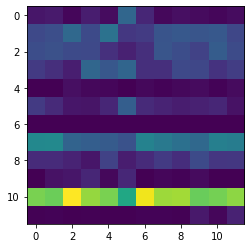

24000/24000 [==============================] - 3s 138us/sample


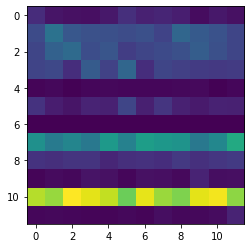

Train on 24000 samples, validate on 4800 samples
Epoch 21/22
24000/24000 [==============================] - 15s 629us/sample - loss: 2.4533 - acc: 0.1307 - val_loss: 2.4730 - val_acc: 0.0871
Epoch 22/22
24000/24000 [==============================] - 13s 530us/sample - loss: 2.4299 - acc: 0.1444 - val_loss: 2.4704 - val_acc: 0.1031
Train on 24000 samples, validate on 4800 samples
Epoch 23/24
24000/24000 [==============================] - 15s 625us/sample - loss: 2.4420 - acc: 0.1397 - val_loss: 2.4795 - val_acc: 0.0944
Epoch 24/24
24000/24000 [==============================] - 13s 530us/sample - loss: 2.4191 - acc: 0.1523 - val_loss: 2.4791 - val_acc: 0.0940
Train on 24000 samples, validate on 4800 samples
Epoch 25/26
24000/24000 [==============================] - 15s 628us/sample - loss: 2.4390 - acc: 0.1478 - val_loss: 2.4505 - val_acc: 0.1379
Epoch 26/26
24000/24000 [==============================] - 13s 527us/sample - loss: 2.4153 - acc: 0.1586 - val_loss: 2.4482 - val_acc: 0.1404
T

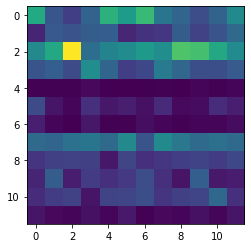

24000/24000 [==============================] - 3s 140us/sample


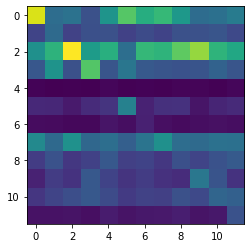

Train on 24000 samples, validate on 4800 samples
Epoch 31/32
24000/24000 [==============================] - 15s 626us/sample - loss: 2.4365 - acc: 0.1472 - val_loss: 2.4559 - val_acc: 0.1265
Epoch 32/32
24000/24000 [==============================] - 13s 538us/sample - loss: 2.4119 - acc: 0.1593 - val_loss: 2.4597 - val_acc: 0.1244
Train on 24000 samples, validate on 4800 samples
Epoch 33/34
24000/24000 [==============================] - 15s 631us/sample - loss: 2.4387 - acc: 0.1450 - val_loss: 2.4595 - val_acc: 0.1050
Epoch 34/34
24000/24000 [==============================] - 13s 525us/sample - loss: 2.4179 - acc: 0.1552 - val_loss: 2.4577 - val_acc: 0.1098
Train on 24000 samples, validate on 4800 samples
Epoch 35/36
24000/24000 [==============================] - 15s 625us/sample - loss: 2.4319 - acc: 0.1464 - val_loss: 2.4467 - val_acc: 0.1325
Epoch 36/36
24000/24000 [==============================] - 13s 530us/sample - loss: 2.4104 - acc: 0.1591 - val_loss: 2.4464 - val_acc: 0.1302
T

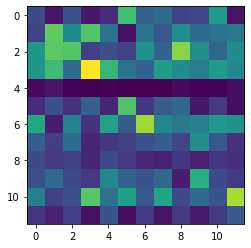

24000/24000 [==============================] - 3s 140us/sample


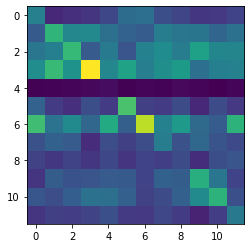

Train on 24000 samples, validate on 4800 samples
Epoch 41/42
24000/24000 [==============================] - 15s 631us/sample - loss: 2.4114 - acc: 0.1659 - val_loss: 2.4468 - val_acc: 0.1329
Epoch 42/42
24000/24000 [==============================] - 13s 532us/sample - loss: 2.3891 - acc: 0.1749 - val_loss: 2.4510 - val_acc: 0.1271
Train on 24000 samples, validate on 4800 samples
Epoch 43/44
24000/24000 [==============================] - 15s 627us/sample - loss: 2.4293 - acc: 0.1465 - val_loss: 2.4281 - val_acc: 0.1287
Epoch 44/44
24000/24000 [==============================] - 13s 533us/sample - loss: 2.4065 - acc: 0.1583 - val_loss: 2.4338 - val_acc: 0.1296
Train on 24000 samples, validate on 4800 samples
Epoch 45/46
24000/24000 [==============================] - 15s 631us/sample - loss: 2.4307 - acc: 0.1502 - val_loss: 2.4530 - val_acc: 0.1377
Epoch 46/46
24000/24000 [==============================] - 13s 539us/sample - loss: 2.4083 - acc: 0.1638 - val_loss: 2.4536 - val_acc: 0.1408
T

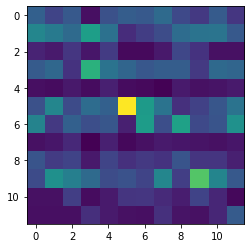

24000/24000 [==============================] - 3s 138us/sample


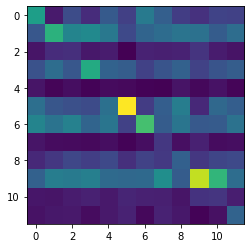

Train on 24000 samples, validate on 4800 samples
Epoch 51/52
24000/24000 [==============================] - 15s 626us/sample - loss: 2.4137 - acc: 0.1620 - val_loss: 2.4332 - val_acc: 0.1515
Epoch 52/52
24000/24000 [==============================] - 13s 531us/sample - loss: 2.3917 - acc: 0.1706 - val_loss: 2.4327 - val_acc: 0.1504
Train on 24000 samples, validate on 4800 samples
Epoch 53/54
24000/24000 [==============================] - 15s 629us/sample - loss: 2.4064 - acc: 0.1633 - val_loss: 2.3989 - val_acc: 0.1579
Epoch 54/54
24000/24000 [==============================] - 13s 530us/sample - loss: 2.3842 - acc: 0.1755 - val_loss: 2.3938 - val_acc: 0.1646
Train on 24000 samples, validate on 4800 samples
Epoch 55/56
24000/24000 [==============================] - 15s 641us/sample - loss: 2.4130 - acc: 0.1578 - val_loss: 2.4054 - val_acc: 0.1787
Epoch 56/56
24000/24000 [==============================] - 13s 536us/sample - loss: 2.3895 - acc: 0.1669 - val_loss: 2.4076 - val_acc: 0.1663
T

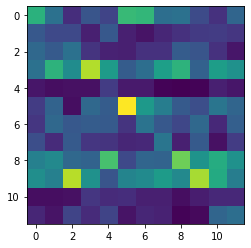

24000/24000 [==============================] - 3s 141us/sample


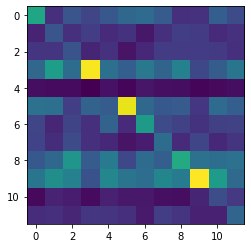

Train on 24000 samples, validate on 4800 samples
Epoch 61/62
24000/24000 [==============================] - 15s 631us/sample - loss: 2.4013 - acc: 0.1672 - val_loss: 2.3900 - val_acc: 0.1798
Epoch 62/62
24000/24000 [==============================] - 13s 529us/sample - loss: 2.3785 - acc: 0.1767 - val_loss: 2.3965 - val_acc: 0.1771
Train on 24000 samples, validate on 4800 samples
Epoch 63/64
24000/24000 [==============================] - 15s 628us/sample - loss: 2.3987 - acc: 0.1688 - val_loss: 2.4341 - val_acc: 0.1544
Epoch 64/64
24000/24000 [==============================] - 13s 537us/sample - loss: 2.3739 - acc: 0.1749 - val_loss: 2.4395 - val_acc: 0.1525
Train on 24000 samples, validate on 4800 samples
Epoch 65/66
24000/24000 [==============================] - 15s 629us/sample - loss: 2.4009 - acc: 0.1637 - val_loss: 2.4168 - val_acc: 0.1577
Epoch 66/66
24000/24000 [==============================] - 13s 527us/sample - loss: 2.3781 - acc: 0.1704 - val_loss: 2.4187 - val_acc: 0.1602
T

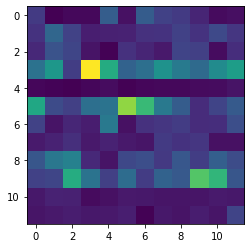

24000/24000 [==============================] - 3s 139us/sample


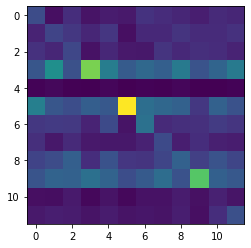

Train on 24000 samples, validate on 4800 samples
Epoch 71/72
24000/24000 [==============================] - 15s 628us/sample - loss: 2.4028 - acc: 0.1601 - val_loss: 2.4108 - val_acc: 0.1494
Epoch 72/72
24000/24000 [==============================] - 13s 536us/sample - loss: 2.3796 - acc: 0.1702 - val_loss: 2.4159 - val_acc: 0.1469
Train on 24000 samples, validate on 4800 samples
Epoch 73/74
24000/24000 [==============================] - 15s 634us/sample - loss: 2.4091 - acc: 0.1620 - val_loss: 2.4189 - val_acc: 0.1479
Epoch 74/74
24000/24000 [==============================] - 13s 543us/sample - loss: 2.3805 - acc: 0.1721 - val_loss: 2.4193 - val_acc: 0.1473
Train on 24000 samples, validate on 4800 samples
Epoch 75/76
24000/24000 [==============================] - 15s 633us/sample - loss: 2.3938 - acc: 0.1662 - val_loss: 2.3841 - val_acc: 0.1790
Epoch 76/76
24000/24000 [==============================] - 13s 527us/sample - loss: 2.3679 - acc: 0.1781 - val_loss: 2.3860 - val_acc: 0.1844
T

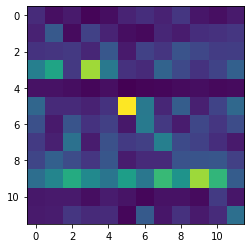

24000/24000 [==============================] - 3s 139us/sample


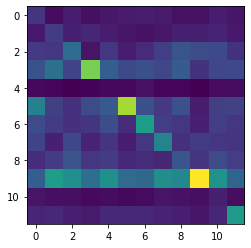

Train on 24000 samples, validate on 4800 samples
Epoch 81/82
24000/24000 [==============================] - 15s 629us/sample - loss: 2.3971 - acc: 0.1643 - val_loss: 2.4135 - val_acc: 0.1581
Epoch 82/82
24000/24000 [==============================] - 13s 526us/sample - loss: 2.3714 - acc: 0.1738 - val_loss: 2.4213 - val_acc: 0.1513
Train on 24000 samples, validate on 4800 samples
Epoch 83/84
24000/24000 [==============================] - 15s 633us/sample - loss: 2.3785 - acc: 0.1726 - val_loss: 2.4226 - val_acc: 0.1654
Epoch 84/84
24000/24000 [==============================] - 13s 544us/sample - loss: 2.3497 - acc: 0.1846 - val_loss: 2.4198 - val_acc: 0.1683
Train on 24000 samples, validate on 4800 samples
Epoch 85/86
24000/24000 [==============================] - 15s 624us/sample - loss: 2.3717 - acc: 0.1810 - val_loss: 2.4381 - val_acc: 0.1448
Epoch 86/86
24000/24000 [==============================] - 13s 534us/sample - loss: 2.3490 - acc: 0.1902 - val_loss: 2.4408 - val_acc: 0.1444
T

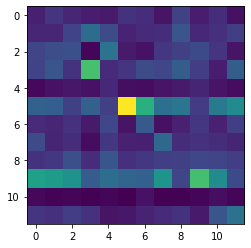

24000/24000 [==============================] - 3s 142us/sample


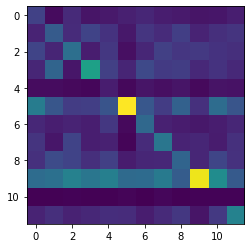

Train on 24000 samples, validate on 4800 samples
Epoch 91/92
24000/24000 [==============================] - 15s 630us/sample - loss: 2.3661 - acc: 0.1831 - val_loss: 2.3512 - val_acc: 0.1942
Epoch 92/92
24000/24000 [==============================] - 13s 532us/sample - loss: 2.3396 - acc: 0.1935 - val_loss: 2.3639 - val_acc: 0.1967
Train on 24000 samples, validate on 4800 samples
Epoch 93/94
24000/24000 [==============================] - 15s 627us/sample - loss: 2.3432 - acc: 0.1901 - val_loss: 2.3774 - val_acc: 0.1898
Epoch 94/94
24000/24000 [==============================] - 13s 528us/sample - loss: 2.3154 - acc: 0.2020 - val_loss: 2.3864 - val_acc: 0.1800
Train on 24000 samples, validate on 4800 samples
Epoch 95/96
24000/24000 [==============================] - 15s 635us/sample - loss: 2.3591 - acc: 0.1909 - val_loss: 2.4314 - val_acc: 0.1471
Epoch 96/96
24000/24000 [==============================] - 13s 533us/sample - loss: 2.3287 - acc: 0.2035 - val_loss: 2.4378 - val_acc: 0.1433
T

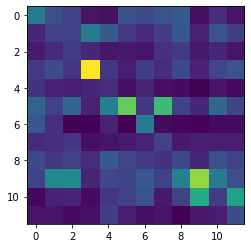

24000/24000 [==============================] - 3s 143us/sample


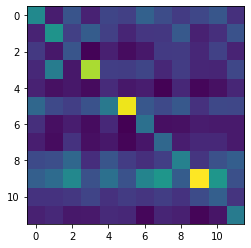

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_36 (Batc (None, 100, 25)           100       
_________________________________________________________________
lstm_18 (LSTM)               (None, 100, 64)           23040     
_________________________________________________________________
batch_normalization_37 (Batc (None, 100, 64)           256       
_________________________________________________________________
lstm_19 (LSTM)               (None, 16)                5184      
_________________________________________________________________
batch_normalization_38 (Batc (None, 16)                64        
_________________________________________________________________
dense_18 (Dense)             (None, 64)                1088      
_________________________________________________________________
batch_normalization_39 (Batc (None, 64)               

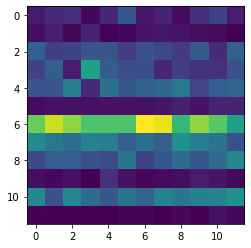

24000/24000 [==============================] - 5s 210us/sample


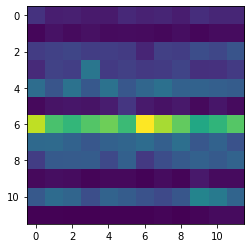

Train on 24000 samples, validate on 4800 samples
Epoch 11/12
24000/24000 [==============================] - 19s 797us/sample - loss: 2.4882 - acc: 0.1227 - val_loss: 2.4828 - val_acc: 0.0962
Epoch 12/12
24000/24000 [==============================] - 17s 693us/sample - loss: 2.4510 - acc: 0.1407 - val_loss: 2.4826 - val_acc: 0.0977
Train on 24000 samples, validate on 4800 samples
Epoch 13/14
24000/24000 [==============================] - 19s 798us/sample - loss: 2.4663 - acc: 0.1299 - val_loss: 2.4733 - val_acc: 0.1058
Epoch 14/14
24000/24000 [==============================] - 17s 716us/sample - loss: 2.4295 - acc: 0.1509 - val_loss: 2.4739 - val_acc: 0.1075
Train on 24000 samples, validate on 4800 samples
Epoch 15/16
24000/24000 [==============================] - 19s 797us/sample - loss: 2.4642 - acc: 0.1351 - val_loss: 2.4736 - val_acc: 0.1075
Epoch 16/16
24000/24000 [==============================] - 17s 697us/sample - loss: 2.4308 - acc: 0.1488 - val_loss: 2.4731 - val_acc: 0.1027
T

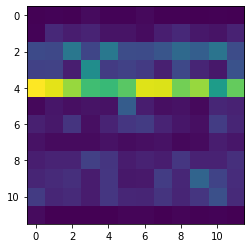

24000/24000 [==============================] - 5s 212us/sample


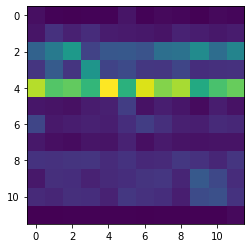

Train on 24000 samples, validate on 4800 samples
Epoch 21/22
24000/24000 [==============================] - 19s 800us/sample - loss: 2.4414 - acc: 0.1435 - val_loss: 2.4688 - val_acc: 0.1227
Epoch 22/22
24000/24000 [==============================] - 17s 711us/sample - loss: 2.4104 - acc: 0.1569 - val_loss: 2.4678 - val_acc: 0.1235
Train on 24000 samples, validate on 4800 samples
Epoch 23/24
24000/24000 [==============================] - 19s 803us/sample - loss: 2.4363 - acc: 0.1492 - val_loss: 2.4660 - val_acc: 0.1119
Epoch 24/24
24000/24000 [==============================] - 17s 703us/sample - loss: 2.4088 - acc: 0.1605 - val_loss: 2.4641 - val_acc: 0.1156
Train on 24000 samples, validate on 4800 samples
Epoch 25/26
24000/24000 [==============================] - 19s 806us/sample - loss: 2.4290 - acc: 0.1518 - val_loss: 2.4535 - val_acc: 0.1363
Epoch 26/26
24000/24000 [==============================] - 17s 721us/sample - loss: 2.3983 - acc: 0.1683 - val_loss: 2.4543 - val_acc: 0.1267
T

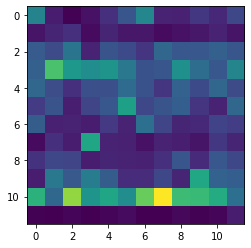

24000/24000 [==============================] - 5s 210us/sample


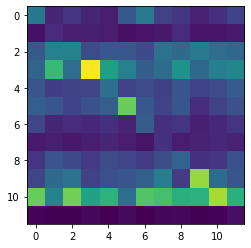

Train on 24000 samples, validate on 4800 samples
Epoch 31/32
24000/24000 [==============================] - 19s 811us/sample - loss: 2.4059 - acc: 0.1650 - val_loss: 2.4229 - val_acc: 0.1544
Epoch 32/32
24000/24000 [==============================] - 17s 707us/sample - loss: 2.3730 - acc: 0.1815 - val_loss: 2.4200 - val_acc: 0.1500
Train on 24000 samples, validate on 4800 samples
Epoch 33/34
24000/24000 [==============================] - 19s 801us/sample - loss: 2.4196 - acc: 0.1595 - val_loss: 2.4236 - val_acc: 0.1442
Epoch 34/34
24000/24000 [==============================] - 17s 721us/sample - loss: 2.3855 - acc: 0.1736 - val_loss: 2.4229 - val_acc: 0.1473
Train on 24000 samples, validate on 4800 samples
Epoch 35/36
24000/24000 [==============================] - 19s 801us/sample - loss: 2.3915 - acc: 0.1728 - val_loss: 2.4162 - val_acc: 0.1612
Epoch 36/36
24000/24000 [==============================] - 17s 709us/sample - loss: 2.3617 - acc: 0.1852 - val_loss: 2.4186 - val_acc: 0.1548
T

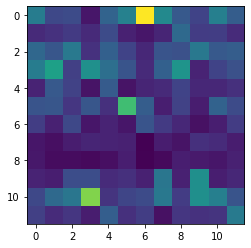

24000/24000 [==============================] - 5s 211us/sample


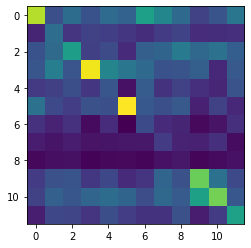

Train on 24000 samples, validate on 4800 samples
Epoch 41/42
24000/24000 [==============================] - 19s 802us/sample - loss: 2.4049 - acc: 0.1671 - val_loss: 2.3980 - val_acc: 0.1710
Epoch 42/42
24000/24000 [==============================] - 17s 722us/sample - loss: 2.3724 - acc: 0.1783 - val_loss: 2.4095 - val_acc: 0.1562
Train on 24000 samples, validate on 4800 samples
Epoch 43/44
24000/24000 [==============================] - 19s 801us/sample - loss: 2.3877 - acc: 0.1710 - val_loss: 2.4298 - val_acc: 0.1496
Epoch 44/44
24000/24000 [==============================] - 17s 708us/sample - loss: 2.3534 - acc: 0.1875 - val_loss: 2.4276 - val_acc: 0.1494
Train on 24000 samples, validate on 4800 samples
Epoch 45/46
24000/24000 [==============================] - 19s 806us/sample - loss: 2.3987 - acc: 0.1655 - val_loss: 2.4290 - val_acc: 0.1450
Epoch 46/46
24000/24000 [==============================] - 17s 729us/sample - loss: 2.3661 - acc: 0.1772 - val_loss: 2.4386 - val_acc: 0.1421
T

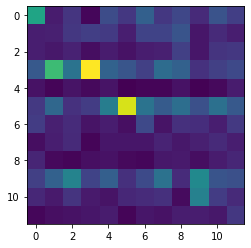

24000/24000 [==============================] - 5s 210us/sample


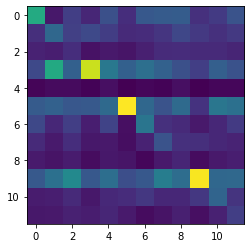

Train on 24000 samples, validate on 4800 samples
Epoch 51/52
24000/24000 [==============================] - 19s 796us/sample - loss: 2.3683 - acc: 0.1829 - val_loss: 2.4316 - val_acc: 0.1477
Epoch 52/52
24000/24000 [==============================] - 17s 701us/sample - loss: 2.3349 - acc: 0.1952 - val_loss: 2.4403 - val_acc: 0.1435
Train on 24000 samples, validate on 4800 samples
Epoch 53/54
24000/24000 [==============================] - 19s 800us/sample - loss: 2.3938 - acc: 0.1663 - val_loss: 2.4011 - val_acc: 0.1635
Epoch 54/54
24000/24000 [==============================] - 17s 714us/sample - loss: 2.3621 - acc: 0.1787 - val_loss: 2.4121 - val_acc: 0.1548
Train on 24000 samples, validate on 4800 samples
Epoch 55/56
24000/24000 [==============================] - 19s 795us/sample - loss: 2.3768 - acc: 0.1722 - val_loss: 2.4037 - val_acc: 0.1710
Epoch 56/56
24000/24000 [==============================] - 17s 699us/sample - loss: 2.3405 - acc: 0.1885 - val_loss: 2.3984 - val_acc: 0.1733
T

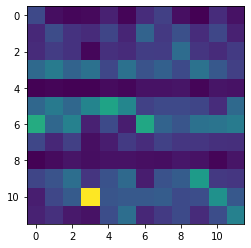

24000/24000 [==============================] - 5s 211us/sample


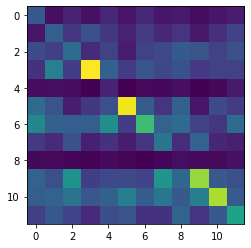

Train on 24000 samples, validate on 4800 samples
Epoch 61/62
24000/24000 [==============================] - 19s 803us/sample - loss: 2.3835 - acc: 0.1755 - val_loss: 2.3984 - val_acc: 0.1692
Epoch 62/62
24000/24000 [==============================] - 17s 718us/sample - loss: 2.3501 - acc: 0.1881 - val_loss: 2.4140 - val_acc: 0.1571
Train on 24000 samples, validate on 4800 samples
Epoch 63/64
24000/24000 [==============================] - 19s 806us/sample - loss: 2.3588 - acc: 0.1860 - val_loss: 2.4272 - val_acc: 0.1669
Epoch 64/64
24000/24000 [==============================] - 17s 703us/sample - loss: 2.3267 - acc: 0.1971 - val_loss: 2.4241 - val_acc: 0.1623
Train on 24000 samples, validate on 4800 samples
Epoch 65/66
24000/24000 [==============================] - 19s 802us/sample - loss: 2.3637 - acc: 0.1776 - val_loss: 2.4040 - val_acc: 0.1683
Epoch 66/66
24000/24000 [==============================] - 17s 721us/sample - loss: 2.3241 - acc: 0.1958 - val_loss: 2.4075 - val_acc: 0.1667
T

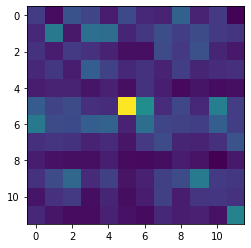

24000/24000 [==============================] - 5s 210us/sample


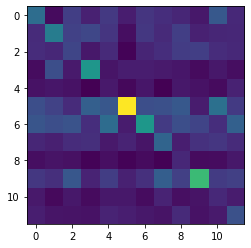

Train on 24000 samples, validate on 4800 samples
Epoch 71/72
24000/24000 [==============================] - 19s 804us/sample - loss: 2.3511 - acc: 0.1948 - val_loss: 2.3818 - val_acc: 0.1708
Epoch 72/72
24000/24000 [==============================] - 17s 708us/sample - loss: 2.3095 - acc: 0.2138 - val_loss: 2.3897 - val_acc: 0.1696
Train on 24000 samples, validate on 4800 samples
Epoch 73/74
24000/24000 [==============================] - 20s 850us/sample - loss: 2.3299 - acc: 0.2015 - val_loss: 2.4288 - val_acc: 0.1652
Epoch 74/74
24000/24000 [==============================] - 18s 738us/sample - loss: 2.2889 - acc: 0.2170 - val_loss: 2.4342 - val_acc: 0.1602
Train on 24000 samples, validate on 4800 samples
Epoch 75/76
24000/24000 [==============================] - 20s 817us/sample - loss: 2.3594 - acc: 0.1831 - val_loss: 2.4357 - val_acc: 0.1533
Epoch 76/76
24000/24000 [==============================] - 17s 714us/sample - loss: 2.3188 - acc: 0.1966 - val_loss: 2.4316 - val_acc: 0.1548
T

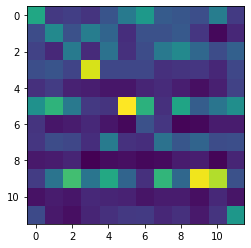

24000/24000 [==============================] - 5s 213us/sample


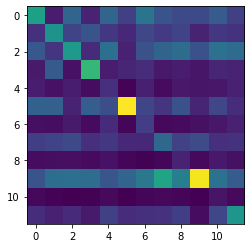

Train on 24000 samples, validate on 4800 samples
Epoch 81/82
24000/24000 [==============================] - 20s 825us/sample - loss: 2.3379 - acc: 0.1906 - val_loss: 2.3863 - val_acc: 0.1892
Epoch 82/82
24000/24000 [==============================] - 17s 717us/sample - loss: 2.3019 - acc: 0.2058 - val_loss: 2.3932 - val_acc: 0.1915
Train on 24000 samples, validate on 4800 samples
Epoch 83/84
24000/24000 [==============================] - 19s 812us/sample - loss: 2.3361 - acc: 0.1927 - val_loss: 2.3688 - val_acc: 0.1754
Epoch 84/84
24000/24000 [==============================] - 17s 708us/sample - loss: 2.2982 - acc: 0.2110 - val_loss: 2.3747 - val_acc: 0.1781
Train on 24000 samples, validate on 4800 samples
Epoch 85/86
24000/24000 [==============================] - 20s 820us/sample - loss: 2.3377 - acc: 0.1921 - val_loss: 2.3878 - val_acc: 0.1804
Epoch 86/86
24000/24000 [==============================] - 17s 725us/sample - loss: 2.3010 - acc: 0.2069 - val_loss: 2.3929 - val_acc: 0.1723
T

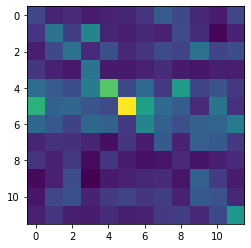

24000/24000 [==============================] - 5s 218us/sample


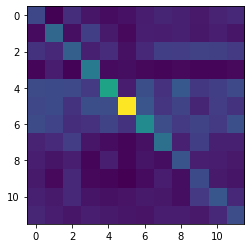

Train on 24000 samples, validate on 4800 samples
Epoch 91/92
24000/24000 [==============================] - 20s 816us/sample - loss: 2.3388 - acc: 0.1947 - val_loss: 2.3424 - val_acc: 0.1946
Epoch 92/92
24000/24000 [==============================] - 17s 719us/sample - loss: 2.2937 - acc: 0.2154 - val_loss: 2.3490 - val_acc: 0.1910
Train on 24000 samples, validate on 4800 samples
Epoch 93/94
24000/24000 [==============================] - 20s 822us/sample - loss: 2.3255 - acc: 0.2015 - val_loss: 2.3470 - val_acc: 0.1885
Epoch 94/94
24000/24000 [==============================] - 17s 715us/sample - loss: 2.2865 - acc: 0.2192 - val_loss: 2.3592 - val_acc: 0.1842
Train on 24000 samples, validate on 4800 samples
Epoch 95/96
24000/24000 [==============================] - 20s 824us/sample - loss: 2.3213 - acc: 0.1990 - val_loss: 2.3772 - val_acc: 0.1813
Epoch 96/96
24000/24000 [==============================] - 17s 712us/sample - loss: 2.2788 - acc: 0.2151 - val_loss: 2.3674 - val_acc: 0.1846
T

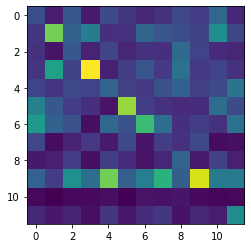

24000/24000 [==============================] - 5s 213us/sample


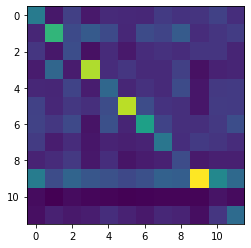

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_40 (Batc (None, 100, 25)           100       
_________________________________________________________________
lstm_20 (LSTM)               (None, 100, 8)            1088      
_________________________________________________________________
batch_normalization_41 (Batc (None, 100, 8)            32        
_________________________________________________________________
lstm_21 (LSTM)               (None, 32)                5248      
_________________________________________________________________
batch_normalization_42 (Batc (None, 32)                128       
_________________________________________________________________
dense_20 (Dense)             (None, 64)                2112      
_________________________________________________________________
batch_normalization_43 (Batc (None, 64)              

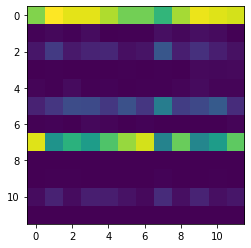

24000/24000 [==============================] - 3s 120us/sample


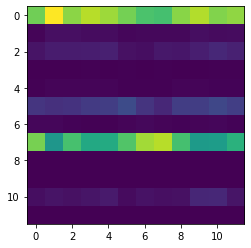

Train on 24000 samples, validate on 4800 samples
Epoch 11/12
24000/24000 [==============================] - 12s 516us/sample - loss: 2.4843 - acc: 0.1136 - val_loss: 2.4839 - val_acc: 0.0831
Epoch 12/12
24000/24000 [==============================] - 10s 426us/sample - loss: 2.4627 - acc: 0.1290 - val_loss: 2.4832 - val_acc: 0.0896
Train on 24000 samples, validate on 4800 samples
Epoch 13/14
24000/24000 [==============================] - 12s 507us/sample - loss: 2.4848 - acc: 0.1112 - val_loss: 2.4817 - val_acc: 0.0896
Epoch 14/14
24000/24000 [==============================] - 10s 416us/sample - loss: 2.4676 - acc: 0.1177 - val_loss: 2.4809 - val_acc: 0.0852
Train on 24000 samples, validate on 4800 samples
Epoch 15/16
24000/24000 [==============================] - 12s 509us/sample - loss: 2.4740 - acc: 0.1194 - val_loss: 2.4804 - val_acc: 0.0985
Epoch 16/16
24000/24000 [==============================] - 10s 415us/sample - loss: 2.4562 - acc: 0.1279 - val_loss: 2.4809 - val_acc: 0.0960
T

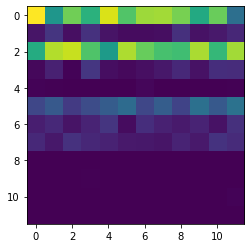

24000/24000 [==============================] - 3s 117us/sample


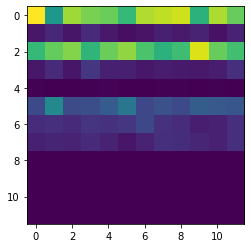

Train on 24000 samples, validate on 4800 samples
Epoch 21/22
24000/24000 [==============================] - 12s 519us/sample - loss: 2.4733 - acc: 0.1201 - val_loss: 2.4759 - val_acc: 0.1017
Epoch 22/22
24000/24000 [==============================] - 10s 432us/sample - loss: 2.4525 - acc: 0.1296 - val_loss: 2.4779 - val_acc: 0.1031
Train on 24000 samples, validate on 4800 samples
Epoch 23/24
24000/24000 [==============================] - 13s 530us/sample - loss: 2.4567 - acc: 0.1293 - val_loss: 2.4631 - val_acc: 0.1200
Epoch 24/24
24000/24000 [==============================] - 10s 421us/sample - loss: 2.4399 - acc: 0.1386 - val_loss: 2.4600 - val_acc: 0.1213
Train on 24000 samples, validate on 4800 samples
Epoch 25/26
24000/24000 [==============================] - 12s 518us/sample - loss: 2.4533 - acc: 0.1327 - val_loss: 2.4708 - val_acc: 0.1098
Epoch 26/26
24000/24000 [==============================] - 10s 425us/sample - loss: 2.4370 - acc: 0.1411 - val_loss: 2.4724 - val_acc: 0.1140
T

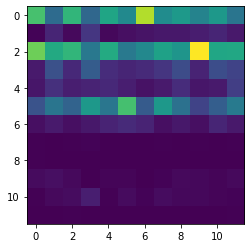

24000/24000 [==============================] - 3s 117us/sample


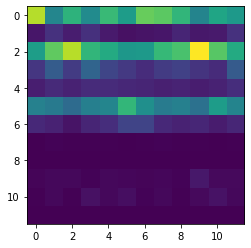

Train on 24000 samples, validate on 4800 samples
Epoch 31/32
24000/24000 [==============================] - 12s 512us/sample - loss: 2.4520 - acc: 0.1322 - val_loss: 2.4594 - val_acc: 0.1106
Epoch 32/32
24000/24000 [==============================] - 10s 430us/sample - loss: 2.4359 - acc: 0.1375 - val_loss: 2.4633 - val_acc: 0.1098
Train on 24000 samples, validate on 4800 samples
Epoch 33/34
24000/24000 [==============================] - 12s 516us/sample - loss: 2.4360 - acc: 0.1435 - val_loss: 2.4493 - val_acc: 0.1287
Epoch 34/34
24000/24000 [==============================] - 10s 419us/sample - loss: 2.4171 - acc: 0.1536 - val_loss: 2.4470 - val_acc: 0.1300
Train on 24000 samples, validate on 4800 samples
Epoch 35/36
24000/24000 [==============================] - 13s 522us/sample - loss: 2.4445 - acc: 0.1377 - val_loss: 2.4576 - val_acc: 0.1110
Epoch 36/36
24000/24000 [==============================] - 10s 431us/sample - loss: 2.4253 - acc: 0.1445 - val_loss: 2.4540 - val_acc: 0.1254
T

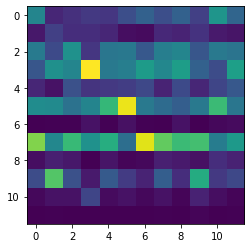

24000/24000 [==============================] - 3s 119us/sample


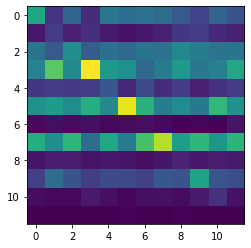

Train on 24000 samples, validate on 4800 samples
Epoch 41/42
24000/24000 [==============================] - 13s 522us/sample - loss: 2.4286 - acc: 0.1420 - val_loss: 2.4476 - val_acc: 0.1292
Epoch 42/42
24000/24000 [==============================] - 11s 443us/sample - loss: 2.4107 - acc: 0.1521 - val_loss: 2.4462 - val_acc: 0.1221
Train on 24000 samples, validate on 4800 samples
Epoch 43/44
24000/24000 [==============================] - 13s 525us/sample - loss: 2.4272 - acc: 0.1494 - val_loss: 2.4356 - val_acc: 0.1310
Epoch 44/44
24000/24000 [==============================] - 10s 432us/sample - loss: 2.4087 - acc: 0.1577 - val_loss: 2.4348 - val_acc: 0.1265
Train on 24000 samples, validate on 4800 samples
Epoch 45/46
24000/24000 [==============================] - 12s 513us/sample - loss: 2.4311 - acc: 0.1457 - val_loss: 2.4333 - val_acc: 0.1265
Epoch 46/46
24000/24000 [==============================] - 10s 427us/sample - loss: 2.4098 - acc: 0.1563 - val_loss: 2.4337 - val_acc: 0.1365
T

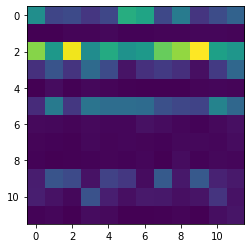

24000/24000 [==============================] - 3s 116us/sample


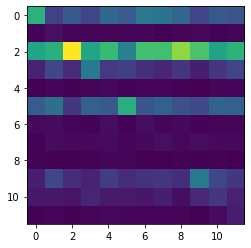

Train on 24000 samples, validate on 4800 samples
Epoch 51/52
24000/24000 [==============================] - 13s 527us/sample - loss: 2.4209 - acc: 0.1537 - val_loss: 2.4248 - val_acc: 0.1442
Epoch 52/52
24000/24000 [==============================] - 11s 440us/sample - loss: 2.3992 - acc: 0.1619 - val_loss: 2.4237 - val_acc: 0.1440
Train on 24000 samples, validate on 4800 samples
Epoch 53/54
24000/24000 [==============================] - 13s 535us/sample - loss: 2.4224 - acc: 0.1483 - val_loss: 2.4313 - val_acc: 0.1481
Epoch 54/54
24000/24000 [==============================] - 10s 435us/sample - loss: 2.4015 - acc: 0.1605 - val_loss: 2.4323 - val_acc: 0.1519
Train on 24000 samples, validate on 4800 samples
Epoch 55/56
24000/24000 [==============================] - 13s 529us/sample - loss: 2.4222 - acc: 0.1571 - val_loss: 2.4314 - val_acc: 0.1617
Epoch 56/56
24000/24000 [==============================] - 10s 436us/sample - loss: 2.4030 - acc: 0.1580 - val_loss: 2.4303 - val_acc: 0.1544
T

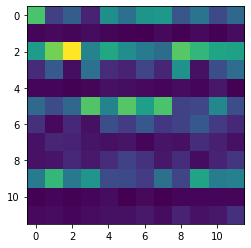

24000/24000 [==============================] - 3s 116us/sample


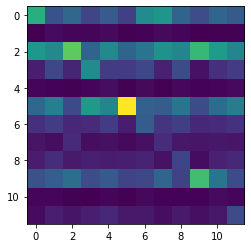

Train on 24000 samples, validate on 4800 samples
Epoch 61/62
24000/24000 [==============================] - 13s 528us/sample - loss: 2.4208 - acc: 0.1491 - val_loss: 2.4122 - val_acc: 0.1473
Epoch 62/62
24000/24000 [==============================] - 10s 426us/sample - loss: 2.4012 - acc: 0.1600 - val_loss: 2.4048 - val_acc: 0.1523
Train on 24000 samples, validate on 4800 samples
Epoch 63/64
24000/24000 [==============================] - 13s 532us/sample - loss: 2.3986 - acc: 0.1625 - val_loss: 2.3854 - val_acc: 0.1683
Epoch 64/64
24000/24000 [==============================] - 10s 427us/sample - loss: 2.3754 - acc: 0.1778 - val_loss: 2.3944 - val_acc: 0.1700
Train on 24000 samples, validate on 4800 samples
Epoch 65/66
24000/24000 [==============================] - 13s 529us/sample - loss: 2.4240 - acc: 0.1503 - val_loss: 2.3923 - val_acc: 0.1827
Epoch 66/66
24000/24000 [==============================] - 10s 431us/sample - loss: 2.4040 - acc: 0.1562 - val_loss: 2.3874 - val_acc: 0.1800
T

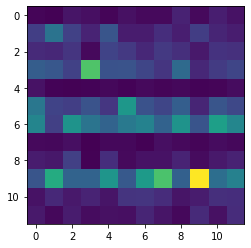

24000/24000 [==============================] - 3s 118us/sample


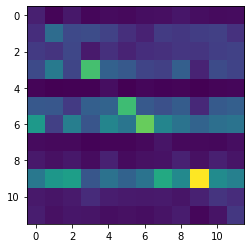

Train on 24000 samples, validate on 4800 samples
Epoch 71/72
24000/24000 [==============================] - 13s 529us/sample - loss: 2.4181 - acc: 0.1520 - val_loss: 2.4033 - val_acc: 0.1719
Epoch 72/72
24000/24000 [==============================] - 10s 431us/sample - loss: 2.3988 - acc: 0.1592 - val_loss: 2.4048 - val_acc: 0.1731
Train on 24000 samples, validate on 4800 samples
Epoch 73/74
24000/24000 [==============================] - 13s 527us/sample - loss: 2.3889 - acc: 0.1666 - val_loss: 2.3897 - val_acc: 0.1808
Epoch 74/74
24000/24000 [==============================] - 10s 431us/sample - loss: 2.3670 - acc: 0.1780 - val_loss: 2.3931 - val_acc: 0.1787
Train on 24000 samples, validate on 4800 samples
Epoch 75/76
24000/24000 [==============================] - 12s 517us/sample - loss: 2.3900 - acc: 0.1687 - val_loss: 2.4016 - val_acc: 0.1656
Epoch 76/76
24000/24000 [==============================] - 10s 428us/sample - loss: 2.3676 - acc: 0.1801 - val_loss: 2.4146 - val_acc: 0.1625
T

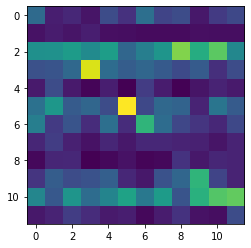

24000/24000 [==============================] - 3s 118us/sample


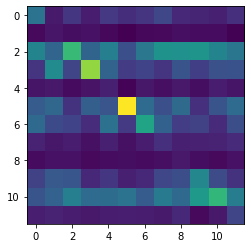

Train on 24000 samples, validate on 4800 samples
Epoch 81/82
24000/24000 [==============================] - 13s 530us/sample - loss: 2.3990 - acc: 0.1676 - val_loss: 2.3814 - val_acc: 0.1696
Epoch 82/82
24000/24000 [==============================] - 10s 431us/sample - loss: 2.3781 - acc: 0.1729 - val_loss: 2.3892 - val_acc: 0.1663
Train on 24000 samples, validate on 4800 samples
Epoch 83/84
24000/24000 [==============================] - 13s 523us/sample - loss: 2.3764 - acc: 0.1807 - val_loss: 2.4336 - val_acc: 0.1610
Epoch 84/84
24000/24000 [==============================] - 11s 439us/sample - loss: 2.3542 - acc: 0.1879 - val_loss: 2.4260 - val_acc: 0.1713
Train on 24000 samples, validate on 4800 samples
Epoch 85/86
24000/24000 [==============================] - 13s 527us/sample - loss: 2.3841 - acc: 0.1680 - val_loss: 2.3365 - val_acc: 0.1954
Epoch 86/86
24000/24000 [==============================] - 10s 431us/sample - loss: 2.3619 - acc: 0.1790 - val_loss: 2.3374 - val_acc: 0.1944
T

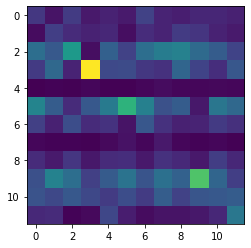

24000/24000 [==============================] - 3s 121us/sample


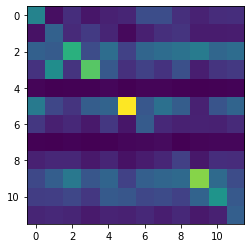

Train on 24000 samples, validate on 4800 samples
Epoch 91/92
24000/24000 [==============================] - 12s 519us/sample - loss: 2.3731 - acc: 0.1794 - val_loss: 2.3511 - val_acc: 0.1869
Epoch 92/92
24000/24000 [==============================] - 10s 427us/sample - loss: 2.3504 - acc: 0.1867 - val_loss: 2.3564 - val_acc: 0.1833
Train on 24000 samples, validate on 4800 samples
Epoch 93/94
24000/24000 [==============================] - 13s 529us/sample - loss: 2.3492 - acc: 0.1876 - val_loss: 2.4487 - val_acc: 0.1508
Epoch 94/94
24000/24000 [==============================] - 11s 439us/sample - loss: 2.3286 - acc: 0.1979 - val_loss: 2.4502 - val_acc: 0.1569
Train on 24000 samples, validate on 4800 samples
Epoch 95/96
24000/24000 [==============================] - 13s 536us/sample - loss: 2.3833 - acc: 0.1685 - val_loss: 2.3973 - val_acc: 0.1502
Epoch 96/96
24000/24000 [==============================] - 10s 435us/sample - loss: 2.3588 - acc: 0.1799 - val_loss: 2.3961 - val_acc: 0.1650
T

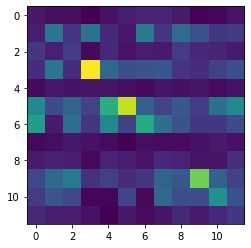

24000/24000 [==============================] - 3s 116us/sample


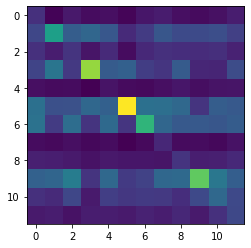

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_44 (Batc (None, 100, 25)           100       
_________________________________________________________________
lstm_22 (LSTM)               (None, 100, 16)           2688      
_________________________________________________________________
batch_normalization_45 (Batc (None, 100, 16)           64        
_________________________________________________________________
lstm_23 (LSTM)               (None, 32)                6272      
_________________________________________________________________
batch_normalization_46 (Batc (None, 32)                128       
_________________________________________________________________
dense_22 (Dense)             (None, 64)                2112      
_________________________________________________________________
batch_normalization_47 (Batc (None, 64)              

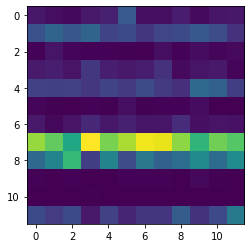

24000/24000 [==============================] - 3s 139us/sample


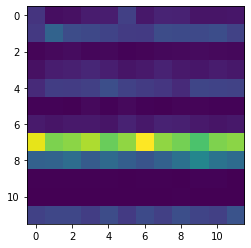

Train on 24000 samples, validate on 4800 samples
Epoch 11/12
24000/24000 [==============================] - 15s 624us/sample - loss: 2.4772 - acc: 0.1227 - val_loss: 2.4810 - val_acc: 0.0850
Epoch 12/12
24000/24000 [==============================] - 13s 532us/sample - loss: 2.4506 - acc: 0.1343 - val_loss: 2.4791 - val_acc: 0.0913
Train on 24000 samples, validate on 4800 samples
Epoch 13/14
24000/24000 [==============================] - 15s 622us/sample - loss: 2.4651 - acc: 0.1256 - val_loss: 2.4774 - val_acc: 0.0935
Epoch 14/14
24000/24000 [==============================] - 13s 525us/sample - loss: 2.4418 - acc: 0.1379 - val_loss: 2.4752 - val_acc: 0.0929
Train on 24000 samples, validate on 4800 samples
Epoch 15/16
24000/24000 [==============================] - 15s 628us/sample - loss: 2.4659 - acc: 0.1238 - val_loss: 2.4713 - val_acc: 0.1071
Epoch 16/16
24000/24000 [==============================] - 13s 521us/sample - loss: 2.4397 - acc: 0.1357 - val_loss: 2.4717 - val_acc: 0.1152
T

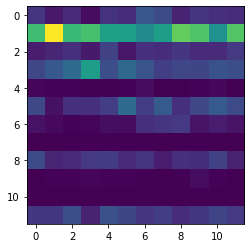

24000/24000 [==============================] - 3s 141us/sample


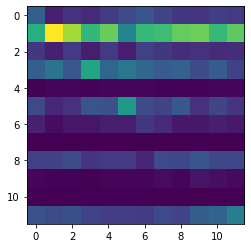

Train on 24000 samples, validate on 4800 samples
Epoch 21/22
24000/24000 [==============================] - 15s 625us/sample - loss: 2.4457 - acc: 0.1363 - val_loss: 2.4665 - val_acc: 0.1098
Epoch 22/22
24000/24000 [==============================] - 13s 527us/sample - loss: 2.4221 - acc: 0.1488 - val_loss: 2.4648 - val_acc: 0.1079
Train on 24000 samples, validate on 4800 samples
Epoch 23/24
24000/24000 [==============================] - 15s 626us/sample - loss: 2.4500 - acc: 0.1318 - val_loss: 2.4847 - val_acc: 0.1015
Epoch 24/24
24000/24000 [==============================] - 13s 529us/sample - loss: 2.4271 - acc: 0.1447 - val_loss: 2.4827 - val_acc: 0.1040
Train on 24000 samples, validate on 4800 samples
Epoch 25/26
24000/24000 [==============================] - 15s 629us/sample - loss: 2.4468 - acc: 0.1393 - val_loss: 2.4533 - val_acc: 0.1510
Epoch 26/26
24000/24000 [==============================] - 13s 521us/sample - loss: 2.4270 - acc: 0.1490 - val_loss: 2.4509 - val_acc: 0.1465
T

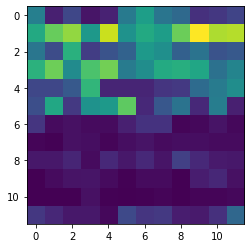

24000/24000 [==============================] - 3s 141us/sample


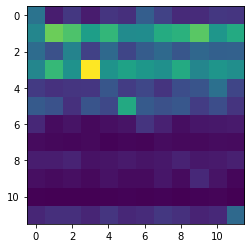

Train on 24000 samples, validate on 4800 samples
Epoch 31/32
24000/24000 [==============================] - 15s 622us/sample - loss: 2.4269 - acc: 0.1565 - val_loss: 2.4485 - val_acc: 0.1346
Epoch 32/32
24000/24000 [==============================] - 13s 524us/sample - loss: 2.4054 - acc: 0.1657 - val_loss: 2.4468 - val_acc: 0.1369
Train on 24000 samples, validate on 4800 samples
Epoch 33/34
24000/24000 [==============================] - 15s 637us/sample - loss: 2.4366 - acc: 0.1436 - val_loss: 2.4374 - val_acc: 0.1375
Epoch 34/34
24000/24000 [==============================] - 13s 532us/sample - loss: 2.4152 - acc: 0.1540 - val_loss: 2.4318 - val_acc: 0.1488
Train on 24000 samples, validate on 4800 samples
Epoch 35/36
24000/24000 [==============================] - 15s 627us/sample - loss: 2.4387 - acc: 0.1468 - val_loss: 2.4568 - val_acc: 0.1281
Epoch 36/36
24000/24000 [==============================] - 13s 535us/sample - loss: 2.4200 - acc: 0.1525 - val_loss: 2.4569 - val_acc: 0.1331
T

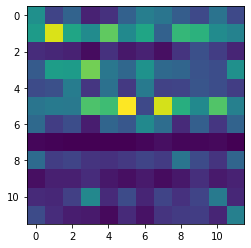

24000/24000 [==============================] - 3s 139us/sample


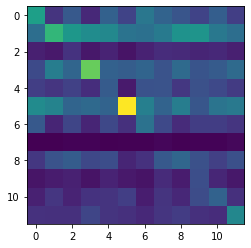

Train on 24000 samples, validate on 4800 samples
Epoch 41/42
24000/24000 [==============================] - 15s 627us/sample - loss: 2.4182 - acc: 0.1545 - val_loss: 2.4375 - val_acc: 0.1508
Epoch 42/42
24000/24000 [==============================] - 13s 525us/sample - loss: 2.3967 - acc: 0.1640 - val_loss: 2.4431 - val_acc: 0.1410
Train on 24000 samples, validate on 4800 samples
Epoch 43/44
24000/24000 [==============================] - 15s 624us/sample - loss: 2.3976 - acc: 0.1667 - val_loss: 2.4056 - val_acc: 0.1552
Epoch 44/44
24000/24000 [==============================] - 13s 538us/sample - loss: 2.3743 - acc: 0.1763 - val_loss: 2.4039 - val_acc: 0.1590
Train on 24000 samples, validate on 4800 samples
Epoch 45/46
24000/24000 [==============================] - 15s 620us/sample - loss: 2.4099 - acc: 0.1571 - val_loss: 2.4243 - val_acc: 0.1477
Epoch 46/46
24000/24000 [==============================] - 13s 530us/sample - loss: 2.3877 - acc: 0.1671 - val_loss: 2.4289 - val_acc: 0.1437
T

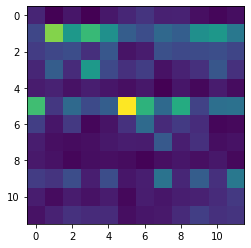

24000/24000 [==============================] - 3s 142us/sample


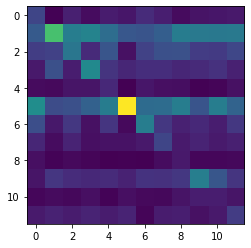

Train on 24000 samples, validate on 4800 samples
Epoch 51/52
24000/24000 [==============================] - 15s 628us/sample - loss: 2.4033 - acc: 0.1642 - val_loss: 2.4015 - val_acc: 0.1654
Epoch 52/52
24000/24000 [==============================] - 13s 525us/sample - loss: 2.3809 - acc: 0.1758 - val_loss: 2.3991 - val_acc: 0.1654
Train on 24000 samples, validate on 4800 samples
Epoch 53/54
24000/24000 [==============================] - 15s 629us/sample - loss: 2.4240 - acc: 0.1541 - val_loss: 2.4128 - val_acc: 0.1583
Epoch 54/54
24000/24000 [==============================] - 13s 526us/sample - loss: 2.3996 - acc: 0.1630 - val_loss: 2.4124 - val_acc: 0.1544
Train on 24000 samples, validate on 4800 samples
Epoch 55/56
24000/24000 [==============================] - 15s 629us/sample - loss: 2.4001 - acc: 0.1663 - val_loss: 2.4410 - val_acc: 0.1527
Epoch 56/56
24000/24000 [==============================] - 13s 524us/sample - loss: 2.3771 - acc: 0.1760 - val_loss: 2.4428 - val_acc: 0.1552
T

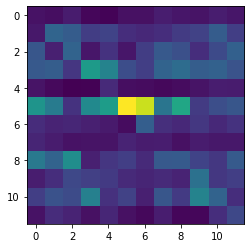

24000/24000 [==============================] - 3s 138us/sample


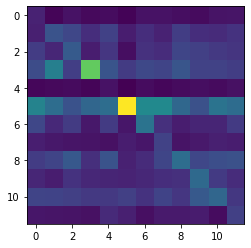

Train on 24000 samples, validate on 4800 samples
Epoch 61/62
24000/24000 [==============================] - 15s 626us/sample - loss: 2.4053 - acc: 0.1568 - val_loss: 2.3877 - val_acc: 0.1746
Epoch 62/62
24000/24000 [==============================] - 13s 541us/sample - loss: 2.3824 - acc: 0.1687 - val_loss: 2.3772 - val_acc: 0.1804
Train on 24000 samples, validate on 4800 samples
Epoch 63/64
24000/24000 [==============================] - 15s 627us/sample - loss: 2.4062 - acc: 0.1623 - val_loss: 2.3804 - val_acc: 0.1821
Epoch 64/64
24000/24000 [==============================] - 13s 522us/sample - loss: 2.3835 - acc: 0.1750 - val_loss: 2.3866 - val_acc: 0.1863
Train on 24000 samples, validate on 4800 samples
Epoch 65/66
24000/24000 [==============================] - 15s 631us/sample - loss: 2.3910 - acc: 0.1703 - val_loss: 2.4092 - val_acc: 0.1694
Epoch 66/66
24000/24000 [==============================] - 13s 527us/sample - loss: 2.3711 - acc: 0.1834 - val_loss: 2.4042 - val_acc: 0.1700
T

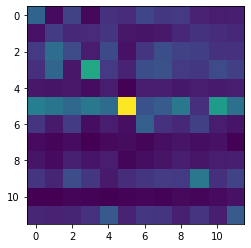

24000/24000 [==============================] - 3s 142us/sample


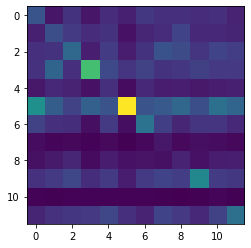

Train on 24000 samples, validate on 4800 samples
Epoch 71/72
24000/24000 [==============================] - 15s 632us/sample - loss: 2.3841 - acc: 0.1755 - val_loss: 2.4026 - val_acc: 0.1583
Epoch 72/72
24000/24000 [==============================] - 13s 535us/sample - loss: 2.3580 - acc: 0.1852 - val_loss: 2.4161 - val_acc: 0.1685
Train on 24000 samples, validate on 4800 samples
Epoch 73/74
24000/24000 [==============================] - 15s 632us/sample - loss: 2.3706 - acc: 0.1825 - val_loss: 2.4222 - val_acc: 0.1517
Epoch 74/74
24000/24000 [==============================] - 13s 527us/sample - loss: 2.3465 - acc: 0.1926 - val_loss: 2.4329 - val_acc: 0.1592
Train on 24000 samples, validate on 4800 samples
Epoch 75/76
24000/24000 [==============================] - 15s 635us/sample - loss: 2.3717 - acc: 0.1840 - val_loss: 2.4049 - val_acc: 0.1750
Epoch 76/76
24000/24000 [==============================] - 13s 541us/sample - loss: 2.3458 - acc: 0.1951 - val_loss: 2.3981 - val_acc: 0.1773
T

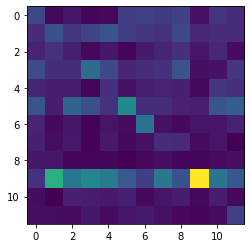

24000/24000 [==============================] - 3s 145us/sample


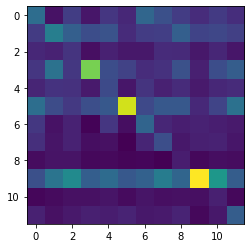

Train on 24000 samples, validate on 4800 samples
Epoch 81/82
24000/24000 [==============================] - 15s 643us/sample - loss: 2.3658 - acc: 0.1867 - val_loss: 2.4341 - val_acc: 0.1587
Epoch 82/82
24000/24000 [==============================] - 13s 545us/sample - loss: 2.3415 - acc: 0.1950 - val_loss: 2.4361 - val_acc: 0.1519
Train on 24000 samples, validate on 4800 samples
Epoch 83/84
24000/24000 [==============================] - 16s 654us/sample - loss: 2.3716 - acc: 0.1870 - val_loss: 2.3900 - val_acc: 0.1717
Epoch 84/84
24000/24000 [==============================] - 13s 543us/sample - loss: 2.3444 - acc: 0.1966 - val_loss: 2.3982 - val_acc: 0.1587
Train on 24000 samples, validate on 4800 samples
Epoch 85/86
24000/24000 [==============================] - 15s 637us/sample - loss: 2.3734 - acc: 0.1778 - val_loss: 2.3753 - val_acc: 0.1883
Epoch 86/86
24000/24000 [==============================] - 13s 530us/sample - loss: 2.3483 - acc: 0.1887 - val_loss: 2.3664 - val_acc: 0.1844
T

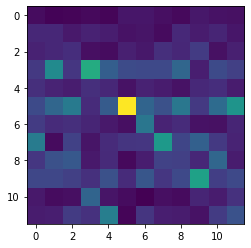

24000/24000 [==============================] - 3s 144us/sample


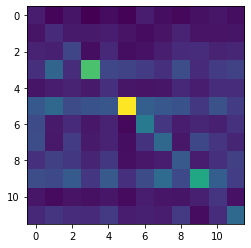

Train on 24000 samples, validate on 4800 samples
Epoch 91/92
24000/24000 [==============================] - 15s 636us/sample - loss: 2.3895 - acc: 0.1722 - val_loss: 2.3841 - val_acc: 0.1737
Epoch 92/92
24000/24000 [==============================] - 13s 533us/sample - loss: 2.3606 - acc: 0.1848 - val_loss: 2.3913 - val_acc: 0.1708
Train on 24000 samples, validate on 4800 samples
Epoch 93/94
24000/24000 [==============================] - 15s 640us/sample - loss: 2.3741 - acc: 0.1751 - val_loss: 2.3736 - val_acc: 0.1875
Epoch 94/94
24000/24000 [==============================] - 13s 545us/sample - loss: 2.3514 - acc: 0.1885 - val_loss: 2.3741 - val_acc: 0.1879
Train on 24000 samples, validate on 4800 samples
Epoch 95/96
24000/24000 [==============================] - 15s 635us/sample - loss: 2.3731 - acc: 0.1855 - val_loss: 2.3572 - val_acc: 0.1894
Epoch 96/96
24000/24000 [==============================] - 13s 533us/sample - loss: 2.3431 - acc: 0.1963 - val_loss: 2.3559 - val_acc: 0.1831
T

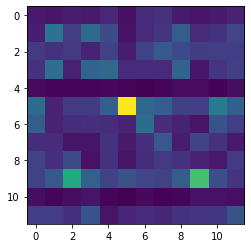

24000/24000 [==============================] - 3s 139us/sample


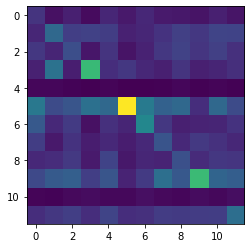

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_48 (Batc (None, 100, 25)           100       
_________________________________________________________________
lstm_24 (LSTM)               (None, 100, 32)           7424      
_________________________________________________________________
batch_normalization_49 (Batc (None, 100, 32)           128       
_________________________________________________________________
lstm_25 (LSTM)               (None, 32)                8320      
_________________________________________________________________
batch_normalization_50 (Batc (None, 32)                128       
_________________________________________________________________
dense_24 (Dense)             (None, 64)                2112      
_________________________________________________________________
batch_normalization_51 (Batc (None, 64)              

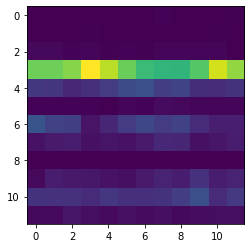

24000/24000 [==============================] - 4s 184us/sample


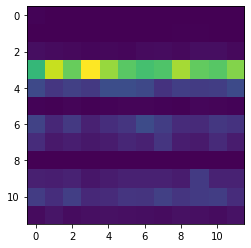

Train on 24000 samples, validate on 4800 samples
Epoch 11/12
24000/24000 [==============================] - 21s 860us/sample - loss: 2.4931 - acc: 0.1142 - val_loss: 2.4810 - val_acc: 0.0929
Epoch 12/12
24000/24000 [==============================] - 18s 745us/sample - loss: 2.4567 - acc: 0.1315 - val_loss: 2.4798 - val_acc: 0.0948
Train on 24000 samples, validate on 4800 samples
Epoch 13/14
24000/24000 [==============================] - 21s 871us/sample - loss: 2.4722 - acc: 0.1247 - val_loss: 2.4717 - val_acc: 0.1077
Epoch 14/14
24000/24000 [==============================] - 19s 771us/sample - loss: 2.4399 - acc: 0.1403 - val_loss: 2.4702 - val_acc: 0.1069
Train on 24000 samples, validate on 4800 samples
Epoch 15/16
24000/24000 [==============================] - 21s 876us/sample - loss: 2.4747 - acc: 0.1284 - val_loss: 2.4720 - val_acc: 0.1054
Epoch 16/16
24000/24000 [==============================] - 18s 763us/sample - loss: 2.4416 - acc: 0.1405 - val_loss: 2.4716 - val_acc: 0.1017
T

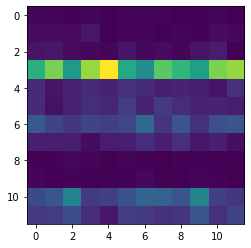

24000/24000 [==============================] - 4s 175us/sample


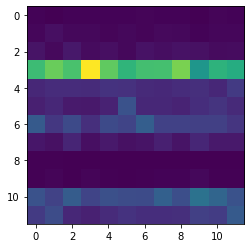

Train on 24000 samples, validate on 4800 samples
Epoch 21/22
24000/24000 [==============================] - 21s 868us/sample - loss: 2.4456 - acc: 0.1391 - val_loss: 2.4575 - val_acc: 0.1265
Epoch 22/22
24000/24000 [==============================] - 18s 743us/sample - loss: 2.4138 - acc: 0.1552 - val_loss: 2.4519 - val_acc: 0.1371
Train on 24000 samples, validate on 4800 samples
Epoch 23/24
24000/24000 [==============================] - 21s 885us/sample - loss: 2.4469 - acc: 0.1423 - val_loss: 2.4518 - val_acc: 0.1275
Epoch 24/24
24000/24000 [==============================] - 19s 775us/sample - loss: 2.4183 - acc: 0.1545 - val_loss: 2.4513 - val_acc: 0.1238
Train on 24000 samples, validate on 4800 samples
Epoch 25/26
24000/24000 [==============================] - 21s 874us/sample - loss: 2.4526 - acc: 0.1370 - val_loss: 2.4525 - val_acc: 0.1235
Epoch 26/26
24000/24000 [==============================] - 18s 749us/sample - loss: 2.4225 - acc: 0.1508 - val_loss: 2.4518 - val_acc: 0.1231
T

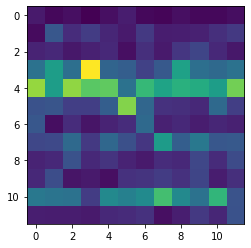

24000/24000 [==============================] - 4s 187us/sample


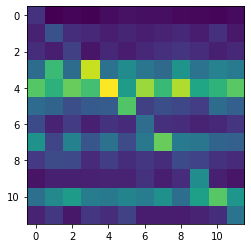

Train on 24000 samples, validate on 4800 samples
Epoch 31/32
24000/24000 [==============================] - 21s 882us/sample - loss: 2.4325 - acc: 0.1476 - val_loss: 2.4334 - val_acc: 0.1429
Epoch 32/32
24000/24000 [==============================] - 19s 776us/sample - loss: 2.4038 - acc: 0.1627 - val_loss: 2.4316 - val_acc: 0.1342
Train on 24000 samples, validate on 4800 samples
Epoch 33/34
24000/24000 [==============================] - 21s 885us/sample - loss: 2.4301 - acc: 0.1517 - val_loss: 2.4381 - val_acc: 0.1490
Epoch 34/34
24000/24000 [==============================] - 18s 755us/sample - loss: 2.4025 - acc: 0.1617 - val_loss: 2.4373 - val_acc: 0.1450
Train on 24000 samples, validate on 4800 samples
Epoch 35/36
24000/24000 [==============================] - 21s 884us/sample - loss: 2.4202 - acc: 0.1528 - val_loss: 2.4241 - val_acc: 0.1475
Epoch 36/36
24000/24000 [==============================] - 19s 795us/sample - loss: 2.3947 - acc: 0.1667 - val_loss: 2.4181 - val_acc: 0.1508
T

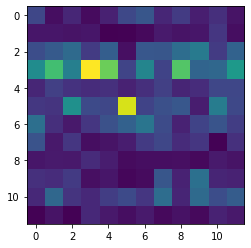

24000/24000 [==============================] - 5s 191us/sample


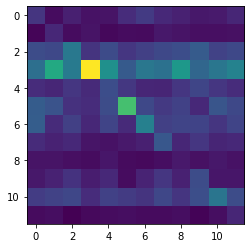

Train on 24000 samples, validate on 4800 samples
Epoch 41/42
24000/24000 [==============================] - 22s 898us/sample - loss: 2.4105 - acc: 0.1588 - val_loss: 2.4088 - val_acc: 0.1477
Epoch 42/42
24000/24000 [==============================] - 18s 759us/sample - loss: 2.3860 - acc: 0.1690 - val_loss: 2.4074 - val_acc: 0.1502
Train on 24000 samples, validate on 4800 samples
Epoch 43/44
24000/24000 [==============================] - 21s 871us/sample - loss: 2.4050 - acc: 0.1632 - val_loss: 2.3994 - val_acc: 0.1679
Epoch 44/44
24000/24000 [==============================] - 18s 763us/sample - loss: 2.3745 - acc: 0.1797 - val_loss: 2.3995 - val_acc: 0.1608
Train on 24000 samples, validate on 4800 samples
Epoch 45/46
24000/24000 [==============================] - 21s 875us/sample - loss: 2.4112 - acc: 0.1573 - val_loss: 2.4153 - val_acc: 0.1610
Epoch 46/46
24000/24000 [==============================] - 18s 752us/sample - loss: 2.3751 - acc: 0.1734 - val_loss: 2.4164 - val_acc: 0.1525
T

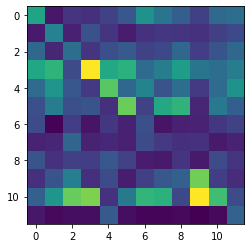

24000/24000 [==============================] - 4s 184us/sample


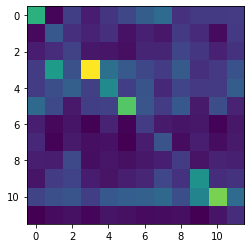

Train on 24000 samples, validate on 4800 samples
Epoch 51/52
24000/24000 [==============================] - 21s 871us/sample - loss: 2.3999 - acc: 0.1657 - val_loss: 2.3899 - val_acc: 0.1688
Epoch 52/52
24000/24000 [==============================] - 18s 750us/sample - loss: 2.3690 - acc: 0.1799 - val_loss: 2.3927 - val_acc: 0.1644
Train on 24000 samples, validate on 4800 samples
Epoch 53/54
24000/24000 [==============================] - 21s 876us/sample - loss: 2.3940 - acc: 0.1679 - val_loss: 2.4079 - val_acc: 0.1581
Epoch 54/54
24000/24000 [==============================] - 18s 766us/sample - loss: 2.3634 - acc: 0.1820 - val_loss: 2.4108 - val_acc: 0.1546
Train on 24000 samples, validate on 4800 samples
Epoch 55/56
24000/24000 [==============================] - 22s 915us/sample - loss: 2.3952 - acc: 0.1758 - val_loss: 2.4294 - val_acc: 0.1571
Epoch 56/56
24000/24000 [==============================] - 18s 770us/sample - loss: 2.3673 - acc: 0.1886 - val_loss: 2.4289 - val_acc: 0.1515
T

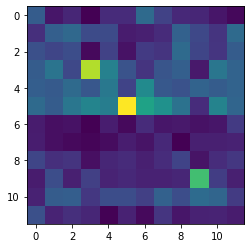

24000/24000 [==============================] - 4s 183us/sample


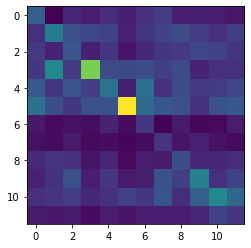

Train on 24000 samples, validate on 4800 samples
Epoch 61/62
24000/24000 [==============================] - 21s 888us/sample - loss: 2.3903 - acc: 0.1710 - val_loss: 2.3944 - val_acc: 0.1696
Epoch 62/62
24000/24000 [==============================] - 18s 766us/sample - loss: 2.3584 - acc: 0.1841 - val_loss: 2.4034 - val_acc: 0.1644
Train on 24000 samples, validate on 4800 samples
Epoch 63/64
24000/24000 [==============================] - 21s 880us/sample - loss: 2.3891 - acc: 0.1766 - val_loss: 2.3940 - val_acc: 0.1821
Epoch 64/64
24000/24000 [==============================] - 18s 757us/sample - loss: 2.3570 - acc: 0.1870 - val_loss: 2.4063 - val_acc: 0.1694
Train on 24000 samples, validate on 4800 samples
Epoch 65/66
24000/24000 [==============================] - 22s 913us/sample - loss: 2.3846 - acc: 0.1754 - val_loss: 2.4199 - val_acc: 0.1675
Epoch 66/66
24000/24000 [==============================] - 18s 763us/sample - loss: 2.3495 - acc: 0.1913 - val_loss: 2.4226 - val_acc: 0.1690
T

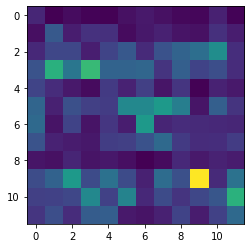

24000/24000 [==============================] - 4s 181us/sample


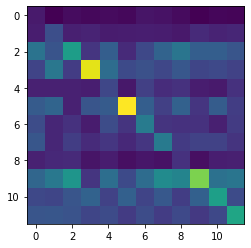

Train on 24000 samples, validate on 4800 samples
Epoch 71/72
24000/24000 [==============================] - 21s 881us/sample - loss: 2.3762 - acc: 0.1778 - val_loss: 2.3808 - val_acc: 0.1642
Epoch 72/72
24000/24000 [==============================] - 19s 796us/sample - loss: 2.3478 - acc: 0.1949 - val_loss: 2.3853 - val_acc: 0.1629
Train on 24000 samples, validate on 4800 samples
Epoch 73/74
24000/24000 [==============================] - 22s 906us/sample - loss: 2.3784 - acc: 0.1801 - val_loss: 2.4137 - val_acc: 0.1646
Epoch 74/74
24000/24000 [==============================] - 18s 750us/sample - loss: 2.3458 - acc: 0.1945 - val_loss: 2.4154 - val_acc: 0.1715
Train on 24000 samples, validate on 4800 samples
Epoch 75/76
24000/24000 [==============================] - 21s 888us/sample - loss: 2.3640 - acc: 0.1893 - val_loss: 2.3949 - val_acc: 0.1769
Epoch 76/76
24000/24000 [==============================] - 19s 782us/sample - loss: 2.3312 - acc: 0.1975 - val_loss: 2.4021 - val_acc: 0.1623
T

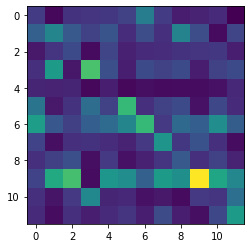

24000/24000 [==============================] - 4s 181us/sample


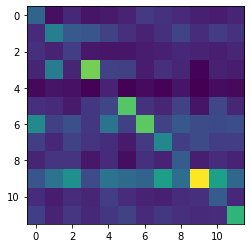

Train on 24000 samples, validate on 4800 samples
Epoch 81/82
24000/24000 [==============================] - 21s 883us/sample - loss: 2.3758 - acc: 0.1711 - val_loss: 2.3860 - val_acc: 0.1721
Epoch 82/82
24000/24000 [==============================] - 18s 765us/sample - loss: 2.3425 - acc: 0.1893 - val_loss: 2.3923 - val_acc: 0.1721
Train on 24000 samples, validate on 4800 samples
Epoch 83/84
24000/24000 [==============================] - 22s 911us/sample - loss: 2.3623 - acc: 0.1805 - val_loss: 2.3645 - val_acc: 0.1810
Epoch 84/84
24000/24000 [==============================] - 19s 773us/sample - loss: 2.3323 - acc: 0.1931 - val_loss: 2.3713 - val_acc: 0.1723
Train on 24000 samples, validate on 4800 samples
Epoch 85/86
24000/24000 [==============================] - 21s 893us/sample - loss: 2.3723 - acc: 0.1784 - val_loss: 2.3853 - val_acc: 0.1606
Epoch 86/86
24000/24000 [==============================] - 18s 771us/sample - loss: 2.3405 - acc: 0.1913 - val_loss: 2.3931 - val_acc: 0.1629
T

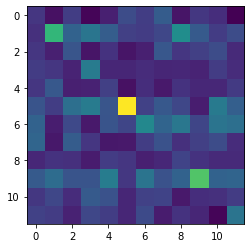

24000/24000 [==============================] - 5s 196us/sample


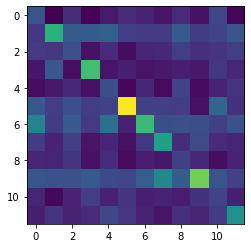

Train on 24000 samples, validate on 4800 samples
Epoch 91/92
24000/24000 [==============================] - 22s 904us/sample - loss: 2.3621 - acc: 0.1866 - val_loss: 2.3821 - val_acc: 0.1704
Epoch 92/92
24000/24000 [==============================] - 19s 781us/sample - loss: 2.3264 - acc: 0.1993 - val_loss: 2.3891 - val_acc: 0.1648
Train on 24000 samples, validate on 4800 samples
Epoch 93/94
24000/24000 [==============================] - 22s 916us/sample - loss: 2.3688 - acc: 0.1834 - val_loss: 2.3963 - val_acc: 0.1683
Epoch 94/94
24000/24000 [==============================] - 19s 794us/sample - loss: 2.3336 - acc: 0.1965 - val_loss: 2.4109 - val_acc: 0.1650
Train on 24000 samples, validate on 4800 samples
Epoch 95/96
24000/24000 [==============================] - 21s 889us/sample - loss: 2.3553 - acc: 0.1902 - val_loss: 2.3715 - val_acc: 0.1910
Epoch 96/96
24000/24000 [==============================] - 18s 755us/sample - loss: 2.3239 - acc: 0.2034 - val_loss: 2.3784 - val_acc: 0.1810
T

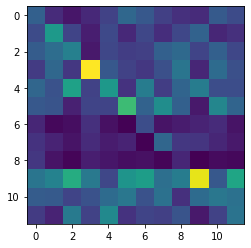

24000/24000 [==============================] - 5s 190us/sample


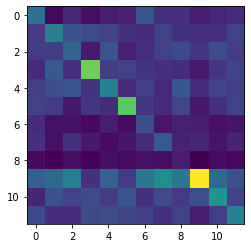

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_52 (Batc (None, 100, 25)           100       
_________________________________________________________________
lstm_26 (LSTM)               (None, 100, 64)           23040     
_________________________________________________________________
batch_normalization_53 (Batc (None, 100, 64)           256       
_________________________________________________________________
lstm_27 (LSTM)               (None, 32)                12416     
_________________________________________________________________
batch_normalization_54 (Batc (None, 32)                128       
_________________________________________________________________
dense_26 (Dense)             (None, 64)                2112      
_________________________________________________________________
batch_normalization_55 (Batc (None, 64)              

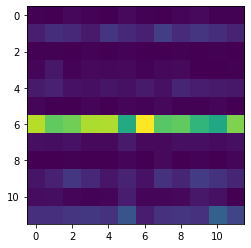

24000/24000 [==============================] - 6s 270us/sample


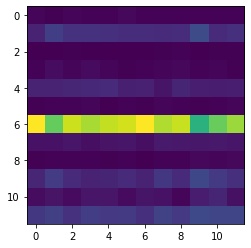

Train on 24000 samples, validate on 4800 samples
Epoch 11/12
24000/24000 [==============================] - 31s 1ms/sample - loss: 2.4740 - acc: 0.1365 - val_loss: 2.4755 - val_acc: 0.1094
Epoch 12/12
24000/24000 [==============================] - 28s 1ms/sample - loss: 2.4255 - acc: 0.1558 - val_loss: 2.4750 - val_acc: 0.1085
Train on 24000 samples, validate on 4800 samples
Epoch 13/14
24000/24000 [==============================] - 31s 1ms/sample - loss: 2.4659 - acc: 0.1328 - val_loss: 2.4755 - val_acc: 0.1181
Epoch 14/14
24000/24000 [==============================] - 29s 1ms/sample - loss: 2.4218 - acc: 0.1518 - val_loss: 2.4753 - val_acc: 0.1271
Train on 24000 samples, validate on 4800 samples
Epoch 15/16
24000/24000 [==============================] - 32s 1ms/sample - loss: 2.4498 - acc: 0.1382 - val_loss: 2.4777 - val_acc: 0.0969
Epoch 16/16
24000/24000 [==============================] - 28s 1ms/sample - loss: 2.4075 - acc: 0.1562 - val_loss: 2.4778 - val_acc: 0.1004
Train on 2400

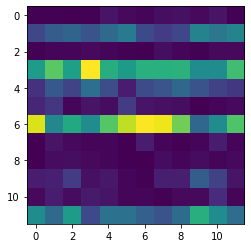

24000/24000 [==============================] - 7s 280us/sample


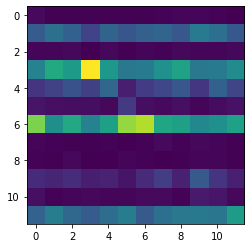

Train on 24000 samples, validate on 4800 samples
Epoch 21/22
24000/24000 [==============================] - 31s 1ms/sample - loss: 2.4277 - acc: 0.1507 - val_loss: 2.4780 - val_acc: 0.1100
Epoch 22/22
24000/24000 [==============================] - 29s 1ms/sample - loss: 2.3892 - acc: 0.1687 - val_loss: 2.4793 - val_acc: 0.1142
Train on 24000 samples, validate on 4800 samples
Epoch 23/24
24000/24000 [==============================] - 31s 1ms/sample - loss: 2.4398 - acc: 0.1456 - val_loss: 2.4676 - val_acc: 0.1119
Epoch 24/24
24000/24000 [==============================] - 29s 1ms/sample - loss: 2.4022 - acc: 0.1640 - val_loss: 2.4676 - val_acc: 0.1246
Train on 24000 samples, validate on 4800 samples
Epoch 25/26
24000/24000 [==============================] - 31s 1ms/sample - loss: 2.4237 - acc: 0.1625 - val_loss: 2.4534 - val_acc: 0.1312
Epoch 26/26
24000/24000 [==============================] - 29s 1ms/sample - loss: 2.3825 - acc: 0.1812 - val_loss: 2.4524 - val_acc: 0.1360
Train on 2400

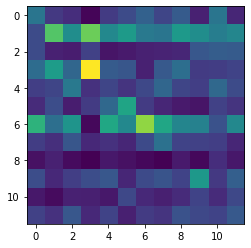

24000/24000 [==============================] - 7s 286us/sample


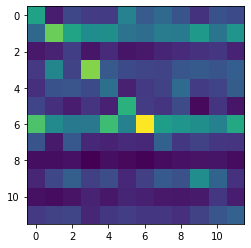

Train on 24000 samples, validate on 4800 samples
Epoch 31/32
24000/24000 [==============================] - 31s 1ms/sample - loss: 2.4156 - acc: 0.1612 - val_loss: 2.4333 - val_acc: 0.1271
Epoch 32/32
24000/24000 [==============================] - 29s 1ms/sample - loss: 2.3790 - acc: 0.1743 - val_loss: 2.4297 - val_acc: 0.1312
Train on 24000 samples, validate on 4800 samples
Epoch 33/34
24000/24000 [==============================] - 31s 1ms/sample - loss: 2.4195 - acc: 0.1535 - val_loss: 2.4267 - val_acc: 0.1490
Epoch 34/34
24000/24000 [==============================] - 29s 1ms/sample - loss: 2.3792 - acc: 0.1727 - val_loss: 2.4260 - val_acc: 0.1400
Train on 24000 samples, validate on 4800 samples
Epoch 35/36
24000/24000 [==============================] - 31s 1ms/sample - loss: 2.3985 - acc: 0.1664 - val_loss: 2.4028 - val_acc: 0.1612
Epoch 36/36
24000/24000 [==============================] - 29s 1ms/sample - loss: 2.3611 - acc: 0.1823 - val_loss: 2.4131 - val_acc: 0.1548
Train on 2400

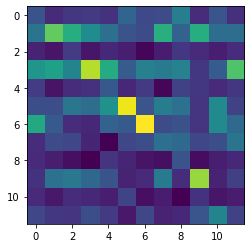

24000/24000 [==============================] - 7s 281us/sample


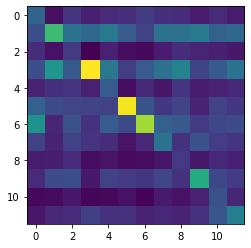

Train on 24000 samples, validate on 4800 samples
Epoch 41/42
24000/24000 [==============================] - 31s 1ms/sample - loss: 2.3823 - acc: 0.1729 - val_loss: 2.4145 - val_acc: 0.1510
Epoch 42/42
24000/24000 [==============================] - 29s 1ms/sample - loss: 2.3440 - acc: 0.1918 - val_loss: 2.4119 - val_acc: 0.1565
Train on 24000 samples, validate on 4800 samples
Epoch 43/44
24000/24000 [==============================] - 32s 1ms/sample - loss: 2.3813 - acc: 0.1772 - val_loss: 2.3800 - val_acc: 0.1746
Epoch 44/44
24000/24000 [==============================] - 29s 1ms/sample - loss: 2.3424 - acc: 0.1887 - val_loss: 2.3846 - val_acc: 0.1790
Train on 24000 samples, validate on 4800 samples
Epoch 45/46
24000/24000 [==============================] - 32s 1ms/sample - loss: 2.3773 - acc: 0.1759 - val_loss: 2.4315 - val_acc: 0.1473
Epoch 46/46
24000/24000 [==============================] - 29s 1ms/sample - loss: 2.3372 - acc: 0.1939 - val_loss: 2.4519 - val_acc: 0.1440
Train on 2400

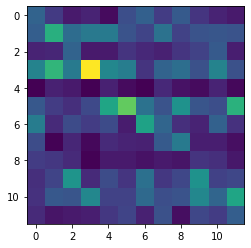

24000/24000 [==============================] - 7s 285us/sample


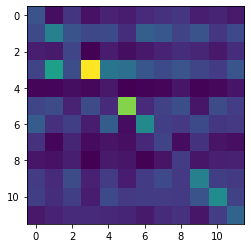

Train on 24000 samples, validate on 4800 samples
Epoch 51/52
24000/24000 [==============================] - 32s 1ms/sample - loss: 2.3769 - acc: 0.1752 - val_loss: 2.3688 - val_acc: 0.1767
Epoch 52/52
24000/24000 [==============================] - 29s 1ms/sample - loss: 2.3381 - acc: 0.1910 - val_loss: 2.3736 - val_acc: 0.1681
Train on 24000 samples, validate on 4800 samples
Epoch 53/54
24000/24000 [==============================] - 31s 1ms/sample - loss: 2.3970 - acc: 0.1647 - val_loss: 2.4008 - val_acc: 0.1706
Epoch 54/54
24000/24000 [==============================] - 28s 1ms/sample - loss: 2.3593 - acc: 0.1810 - val_loss: 2.3995 - val_acc: 0.1752
Train on 24000 samples, validate on 4800 samples
Epoch 55/56
24000/24000 [==============================] - 31s 1ms/sample - loss: 2.3664 - acc: 0.1879 - val_loss: 2.3903 - val_acc: 0.1688
Epoch 56/56
24000/24000 [==============================] - 28s 1ms/sample - loss: 2.3302 - acc: 0.2015 - val_loss: 2.3732 - val_acc: 0.1702
Train on 2400

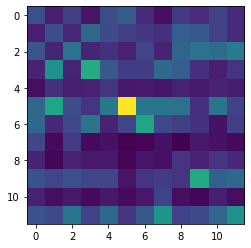

24000/24000 [==============================] - 7s 276us/sample


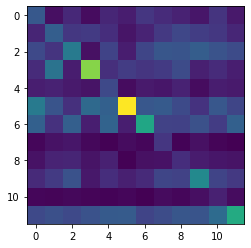

Train on 24000 samples, validate on 4800 samples
Epoch 61/62
24000/24000 [==============================] - 31s 1ms/sample - loss: 2.3493 - acc: 0.1906 - val_loss: 2.4036 - val_acc: 0.1727
Epoch 62/62
24000/24000 [==============================] - 29s 1ms/sample - loss: 2.3060 - acc: 0.2127 - val_loss: 2.3962 - val_acc: 0.1800
Train on 24000 samples, validate on 4800 samples
Epoch 63/64
24000/24000 [==============================] - 31s 1ms/sample - loss: 2.3438 - acc: 0.1937 - val_loss: 2.3641 - val_acc: 0.1825
Epoch 64/64
24000/24000 [==============================] - 28s 1ms/sample - loss: 2.3024 - acc: 0.2132 - val_loss: 2.3758 - val_acc: 0.1869
Train on 24000 samples, validate on 4800 samples
Epoch 65/66
24000/24000 [==============================] - 31s 1ms/sample - loss: 2.3612 - acc: 0.1880 - val_loss: 2.4238 - val_acc: 0.1446
Epoch 66/66
24000/24000 [==============================] - 28s 1ms/sample - loss: 2.3237 - acc: 0.2049 - val_loss: 2.4121 - val_acc: 0.1490
Train on 2400

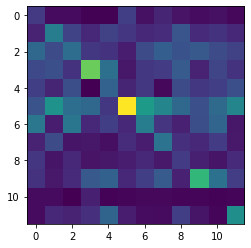

24000/24000 [==============================] - 7s 287us/sample


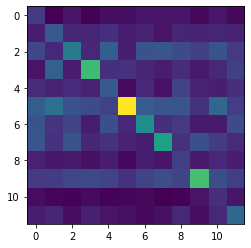

Train on 24000 samples, validate on 4800 samples
Epoch 71/72
24000/24000 [==============================] - 31s 1ms/sample - loss: 2.3347 - acc: 0.1985 - val_loss: 2.3871 - val_acc: 0.1898
Epoch 72/72
24000/24000 [==============================] - 28s 1ms/sample - loss: 2.2918 - acc: 0.2150 - val_loss: 2.4013 - val_acc: 0.1950
Train on 24000 samples, validate on 4800 samples
Epoch 73/74
24000/24000 [==============================] - 31s 1ms/sample - loss: 2.3587 - acc: 0.1842 - val_loss: 2.3478 - val_acc: 0.1900
Epoch 74/74
24000/24000 [==============================] - 29s 1ms/sample - loss: 2.3118 - acc: 0.2055 - val_loss: 2.3474 - val_acc: 0.1896
Train on 24000 samples, validate on 4800 samples
Epoch 75/76
24000/24000 [==============================] - 31s 1ms/sample - loss: 2.3378 - acc: 0.1962 - val_loss: 2.3338 - val_acc: 0.1879
Epoch 76/76
24000/24000 [==============================] - 28s 1ms/sample - loss: 2.2895 - acc: 0.2169 - val_loss: 2.3389 - val_acc: 0.1827
Train on 2400

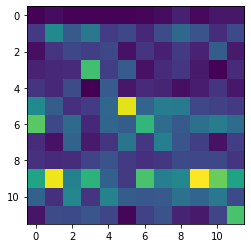

24000/24000 [==============================] - 7s 284us/sample


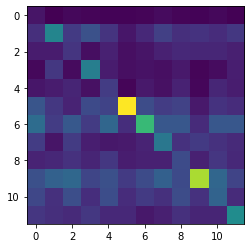

Train on 24000 samples, validate on 4800 samples
Epoch 81/82
24000/24000 [==============================] - 31s 1ms/sample - loss: 2.3405 - acc: 0.2007 - val_loss: 2.3937 - val_acc: 0.1765
Epoch 82/82
24000/24000 [==============================] - 29s 1ms/sample - loss: 2.2931 - acc: 0.2186 - val_loss: 2.4015 - val_acc: 0.1750
Train on 24000 samples, validate on 4800 samples
Epoch 83/84
24000/24000 [==============================] - 31s 1ms/sample - loss: 2.3411 - acc: 0.1910 - val_loss: 2.3992 - val_acc: 0.1710
Epoch 84/84
24000/24000 [==============================] - 29s 1ms/sample - loss: 2.2970 - acc: 0.2086 - val_loss: 2.4065 - val_acc: 0.1806
Train on 24000 samples, validate on 4800 samples
Epoch 85/86
24000/24000 [==============================] - 31s 1ms/sample - loss: 2.3009 - acc: 0.2130 - val_loss: 2.3336 - val_acc: 0.1904
Epoch 86/86
24000/24000 [==============================] - 28s 1ms/sample - loss: 2.2548 - acc: 0.2333 - val_loss: 2.3374 - val_acc: 0.1956
Train on 2400

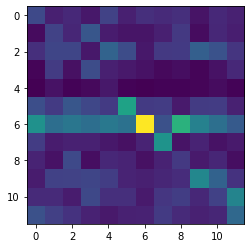

24000/24000 [==============================] - 7s 279us/sample


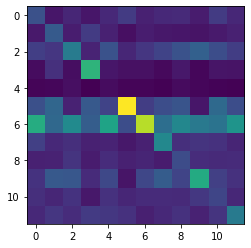

Train on 24000 samples, validate on 4800 samples
Epoch 91/92
24000/24000 [==============================] - 31s 1ms/sample - loss: 2.3319 - acc: 0.1938 - val_loss: 2.3645 - val_acc: 0.1850
Epoch 92/92
24000/24000 [==============================] - 29s 1ms/sample - loss: 2.2886 - acc: 0.2125 - val_loss: 2.3672 - val_acc: 0.1846
Train on 24000 samples, validate on 4800 samples
Epoch 93/94
24000/24000 [==============================] - 30s 1ms/sample - loss: 2.3070 - acc: 0.2085 - val_loss: 2.3402 - val_acc: 0.1902
Epoch 94/94
24000/24000 [==============================] - 25s 1ms/sample - loss: 2.2587 - acc: 0.2265 - val_loss: 2.3694 - val_acc: 0.1944
Train on 24000 samples, validate on 4800 samples
Epoch 95/96
24000/24000 [==============================] - 28s 1ms/sample - loss: 2.3048 - acc: 0.2075 - val_loss: 2.4003 - val_acc: 0.2023
Epoch 96/96
24000/24000 [==============================] - 26s 1ms/sample - loss: 2.2569 - acc: 0.2238 - val_loss: 2.3972 - val_acc: 0.2010
Train on 2400

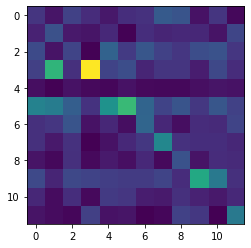

24000/24000 [==============================] - 6s 266us/sample


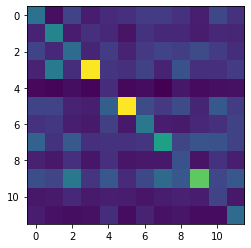

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_56 (Batc (None, 100, 25)           100       
_________________________________________________________________
lstm_28 (LSTM)               (None, 100, 8)            1088      
_________________________________________________________________
batch_normalization_57 (Batc (None, 100, 8)            32        
_________________________________________________________________
lstm_29 (LSTM)               (None, 64)                18688     
_________________________________________________________________
batch_normalization_58 (Batc (None, 64)                256       
_________________________________________________________________
dense_28 (Dense)             (None, 64)                4160      
_________________________________________________________________
batch_normalization_59 (Batc (None, 64)              

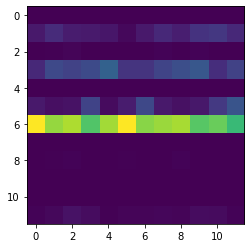

24000/24000 [==============================] - 5s 204us/sample


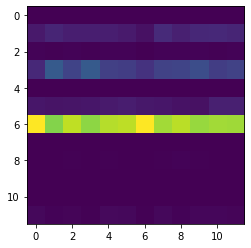

Train on 24000 samples, validate on 4800 samples
Epoch 11/12
24000/24000 [==============================] - 20s 846us/sample - loss: 2.4810 - acc: 0.1143 - val_loss: 2.4808 - val_acc: 0.1008
Epoch 12/12
24000/24000 [==============================] - 18s 743us/sample - loss: 2.4579 - acc: 0.1237 - val_loss: 2.4785 - val_acc: 0.1002
Train on 24000 samples, validate on 4800 samples
Epoch 13/14
24000/24000 [==============================] - 21s 859us/sample - loss: 2.4725 - acc: 0.1124 - val_loss: 2.4783 - val_acc: 0.1140
Epoch 14/14
24000/24000 [==============================] - 18s 743us/sample - loss: 2.4477 - acc: 0.1306 - val_loss: 2.4761 - val_acc: 0.1090
Train on 24000 samples, validate on 4800 samples
Epoch 15/16
24000/24000 [==============================] - 20s 852us/sample - loss: 2.4643 - acc: 0.1220 - val_loss: 2.4791 - val_acc: 0.1015
Epoch 16/16
24000/24000 [==============================] - 18s 742us/sample - loss: 2.4417 - acc: 0.1376 - val_loss: 2.4787 - val_acc: 0.1058
T

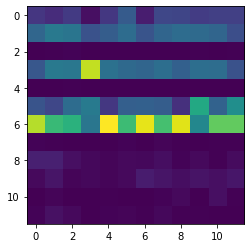

24000/24000 [==============================] - 5s 202us/sample


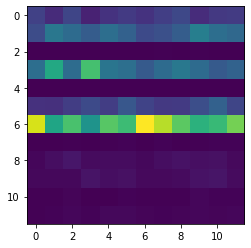

Train on 24000 samples, validate on 4800 samples
Epoch 21/22
24000/24000 [==============================] - 20s 852us/sample - loss: 2.4666 - acc: 0.1238 - val_loss: 2.4727 - val_acc: 0.1040
Epoch 22/22
24000/24000 [==============================] - 18s 748us/sample - loss: 2.4447 - acc: 0.1352 - val_loss: 2.4698 - val_acc: 0.1183
Train on 24000 samples, validate on 4800 samples
Epoch 23/24
24000/24000 [==============================] - 21s 873us/sample - loss: 2.4475 - acc: 0.1307 - val_loss: 2.4561 - val_acc: 0.1225
Epoch 24/24
24000/24000 [==============================] - 18s 763us/sample - loss: 2.4257 - acc: 0.1448 - val_loss: 2.4536 - val_acc: 0.1279
Train on 24000 samples, validate on 4800 samples
Epoch 25/26
24000/24000 [==============================] - 21s 861us/sample - loss: 2.4453 - acc: 0.1378 - val_loss: 2.4650 - val_acc: 0.1102
Epoch 26/26
24000/24000 [==============================] - 18s 747us/sample - loss: 2.4244 - acc: 0.1477 - val_loss: 2.4623 - val_acc: 0.1192
T

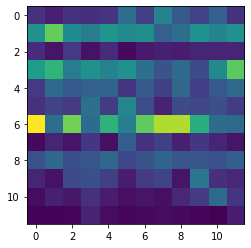

24000/24000 [==============================] - 5s 204us/sample


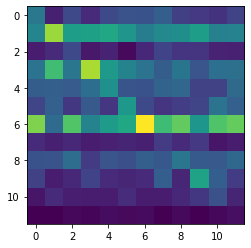

Train on 24000 samples, validate on 4800 samples
Epoch 31/32
24000/24000 [==============================] - 21s 875us/sample - loss: 2.4354 - acc: 0.1441 - val_loss: 2.4493 - val_acc: 0.1277
Epoch 32/32
24000/24000 [==============================] - 18s 759us/sample - loss: 2.4102 - acc: 0.1570 - val_loss: 2.4468 - val_acc: 0.1258
Train on 24000 samples, validate on 4800 samples
Epoch 33/34
24000/24000 [==============================] - 21s 863us/sample - loss: 2.4339 - acc: 0.1471 - val_loss: 2.4691 - val_acc: 0.1177
Epoch 34/34
24000/24000 [==============================] - 18s 752us/sample - loss: 2.4122 - acc: 0.1559 - val_loss: 2.4674 - val_acc: 0.1171
Train on 24000 samples, validate on 4800 samples
Epoch 35/36
24000/24000 [==============================] - 22s 902us/sample - loss: 2.4285 - acc: 0.1435 - val_loss: 2.4492 - val_acc: 0.1317
Epoch 36/36
24000/24000 [==============================] - 18s 765us/sample - loss: 2.4051 - acc: 0.1513 - val_loss: 2.4432 - val_acc: 0.1300
T

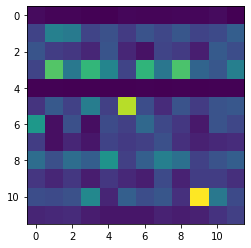

24000/24000 [==============================] - 5s 215us/sample


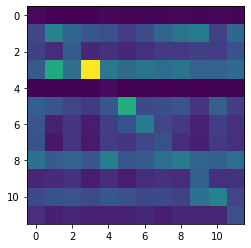

Train on 24000 samples, validate on 4800 samples
Epoch 41/42
24000/24000 [==============================] - 21s 871us/sample - loss: 2.4146 - acc: 0.1515 - val_loss: 2.4418 - val_acc: 0.1340
Epoch 42/42
24000/24000 [==============================] - 19s 774us/sample - loss: 2.3875 - acc: 0.1627 - val_loss: 2.4434 - val_acc: 0.1262
Train on 24000 samples, validate on 4800 samples
Epoch 43/44
24000/24000 [==============================] - 21s 871us/sample - loss: 2.4168 - acc: 0.1523 - val_loss: 2.4416 - val_acc: 0.1392
Epoch 44/44
24000/24000 [==============================] - 18s 758us/sample - loss: 2.3901 - acc: 0.1635 - val_loss: 2.4378 - val_acc: 0.1408
Train on 24000 samples, validate on 4800 samples
Epoch 45/46
24000/24000 [==============================] - 21s 876us/sample - loss: 2.4140 - acc: 0.1544 - val_loss: 2.4417 - val_acc: 0.1242
Epoch 46/46
24000/24000 [==============================] - 19s 773us/sample - loss: 2.3896 - acc: 0.1658 - val_loss: 2.4485 - val_acc: 0.1310
T

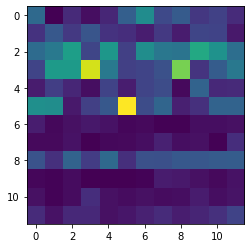

24000/24000 [==============================] - 5s 209us/sample


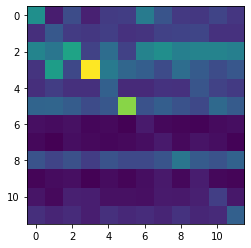

Train on 24000 samples, validate on 4800 samples
Epoch 51/52
24000/24000 [==============================] - 21s 865us/sample - loss: 2.3888 - acc: 0.1668 - val_loss: 2.4388 - val_acc: 0.1400
Epoch 52/52
24000/24000 [==============================] - 18s 754us/sample - loss: 2.3613 - acc: 0.1836 - val_loss: 2.4348 - val_acc: 0.1437
Train on 24000 samples, validate on 4800 samples
Epoch 53/54
24000/24000 [==============================] - 21s 868us/sample - loss: 2.3848 - acc: 0.1662 - val_loss: 2.4228 - val_acc: 0.1412
Epoch 54/54
24000/24000 [==============================] - 18s 768us/sample - loss: 2.3595 - acc: 0.1795 - val_loss: 2.4221 - val_acc: 0.1460
Train on 24000 samples, validate on 4800 samples
Epoch 55/56
24000/24000 [==============================] - 21s 871us/sample - loss: 2.3910 - acc: 0.1722 - val_loss: 2.4363 - val_acc: 0.1562
Epoch 56/56
24000/24000 [==============================] - 18s 754us/sample - loss: 2.3625 - acc: 0.1848 - val_loss: 2.4197 - val_acc: 0.1621
T

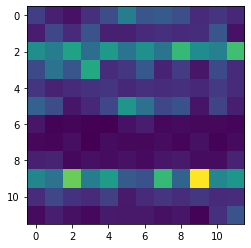

24000/24000 [==============================] - 5s 217us/sample


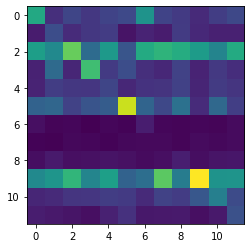

Train on 24000 samples, validate on 4800 samples
Epoch 61/62
24000/24000 [==============================] - 21s 872us/sample - loss: 2.3813 - acc: 0.1730 - val_loss: 2.3828 - val_acc: 0.1794
Epoch 62/62
24000/24000 [==============================] - 18s 762us/sample - loss: 2.3568 - acc: 0.1846 - val_loss: 2.3779 - val_acc: 0.1838
Train on 24000 samples, validate on 4800 samples
Epoch 63/64
24000/24000 [==============================] - 21s 876us/sample - loss: 2.3866 - acc: 0.1705 - val_loss: 2.4089 - val_acc: 0.1533
Epoch 64/64
24000/24000 [==============================] - 19s 774us/sample - loss: 2.3574 - acc: 0.1802 - val_loss: 2.4132 - val_acc: 0.1640
Train on 24000 samples, validate on 4800 samples
Epoch 65/66
24000/24000 [==============================] - 21s 880us/sample - loss: 2.3845 - acc: 0.1645 - val_loss: 2.4075 - val_acc: 0.1646
Epoch 66/66
24000/24000 [==============================] - 18s 760us/sample - loss: 2.3581 - acc: 0.1773 - val_loss: 2.4052 - val_acc: 0.1663
T

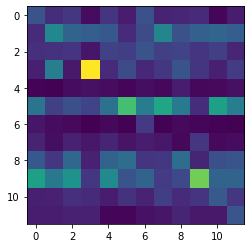

24000/24000 [==============================] - 5s 207us/sample


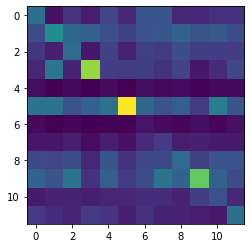

Train on 24000 samples, validate on 4800 samples
Epoch 71/72
24000/24000 [==============================] - 21s 880us/sample - loss: 2.3874 - acc: 0.1733 - val_loss: 2.3966 - val_acc: 0.1773
Epoch 72/72
24000/24000 [==============================] - 19s 776us/sample - loss: 2.3628 - acc: 0.1805 - val_loss: 2.4024 - val_acc: 0.1769
Train on 24000 samples, validate on 4800 samples
Epoch 73/74
24000/24000 [==============================] - 21s 883us/sample - loss: 2.3869 - acc: 0.1707 - val_loss: 2.4131 - val_acc: 0.1590
Epoch 74/74
24000/24000 [==============================] - 18s 759us/sample - loss: 2.3612 - acc: 0.1870 - val_loss: 2.4108 - val_acc: 0.1685
Train on 24000 samples, validate on 4800 samples
Epoch 75/76
24000/24000 [==============================] - 21s 880us/sample - loss: 2.3596 - acc: 0.1850 - val_loss: 2.4216 - val_acc: 0.1515
Epoch 76/76
24000/24000 [==============================] - 19s 771us/sample - loss: 2.3345 - acc: 0.1961 - val_loss: 2.4261 - val_acc: 0.1590
T

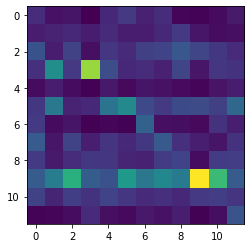

24000/24000 [==============================] - 5s 209us/sample


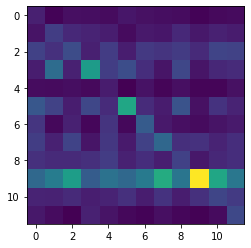

Train on 24000 samples, validate on 4800 samples
Epoch 81/82
24000/24000 [==============================] - 21s 893us/sample - loss: 2.3916 - acc: 0.1692 - val_loss: 2.3901 - val_acc: 0.1598
Epoch 82/82
24000/24000 [==============================] - 19s 792us/sample - loss: 2.3608 - acc: 0.1816 - val_loss: 2.3974 - val_acc: 0.1560
Train on 24000 samples, validate on 4800 samples
Epoch 83/84
24000/24000 [==============================] - 21s 888us/sample - loss: 2.3833 - acc: 0.1736 - val_loss: 2.3933 - val_acc: 0.1735
Epoch 84/84
24000/24000 [==============================] - 19s 771us/sample - loss: 2.3564 - acc: 0.1849 - val_loss: 2.4082 - val_acc: 0.1669
Train on 24000 samples, validate on 4800 samples
Epoch 85/86
24000/24000 [==============================] - 22s 897us/sample - loss: 2.3715 - acc: 0.1799 - val_loss: 2.3492 - val_acc: 0.1931
Epoch 86/86
24000/24000 [==============================] - 19s 776us/sample - loss: 2.3458 - acc: 0.1893 - val_loss: 2.3541 - val_acc: 0.2021
T

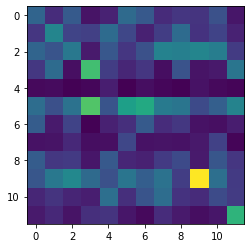

24000/24000 [==============================] - 5s 226us/sample


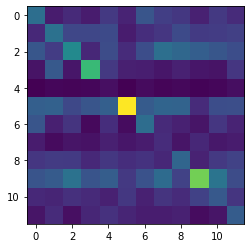

Train on 24000 samples, validate on 4800 samples
Epoch 91/92
24000/24000 [==============================] - 22s 906us/sample - loss: 2.3828 - acc: 0.1735 - val_loss: 2.4182 - val_acc: 0.1462
Epoch 92/92
24000/24000 [==============================] - 19s 800us/sample - loss: 2.3578 - acc: 0.1819 - val_loss: 2.4128 - val_acc: 0.1519
Train on 24000 samples, validate on 4800 samples
Epoch 93/94
24000/24000 [==============================] - 22s 911us/sample - loss: 2.3576 - acc: 0.1859 - val_loss: 2.3331 - val_acc: 0.1946
Epoch 94/94
24000/24000 [==============================] - 19s 782us/sample - loss: 2.3289 - acc: 0.1951 - val_loss: 2.3385 - val_acc: 0.2019
Train on 24000 samples, validate on 4800 samples
Epoch 95/96
24000/24000 [==============================] - 21s 891us/sample - loss: 2.3732 - acc: 0.1805 - val_loss: 2.4347 - val_acc: 0.1600
Epoch 96/96
24000/24000 [==============================] - 19s 807us/sample - loss: 2.3396 - acc: 0.1905 - val_loss: 2.4289 - val_acc: 0.1581
T

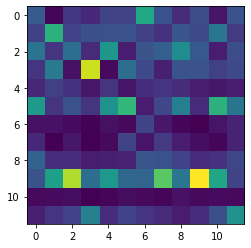

24000/24000 [==============================] - 5s 220us/sample


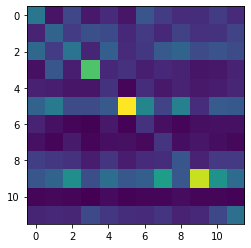

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_60 (Batc (None, 100, 25)           100       
_________________________________________________________________
lstm_30 (LSTM)               (None, 100, 16)           2688      
_________________________________________________________________
batch_normalization_61 (Batc (None, 100, 16)           64        
_________________________________________________________________
lstm_31 (LSTM)               (None, 64)                20736     
_________________________________________________________________
batch_normalization_62 (Batc (None, 64)                256       
_________________________________________________________________
dense_30 (Dense)             (None, 64)                4160      
_________________________________________________________________
batch_normalization_63 (Batc (None, 64)              

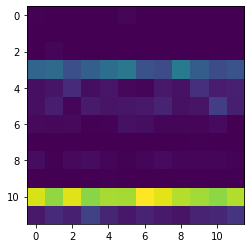

24000/24000 [==============================] - 6s 242us/sample


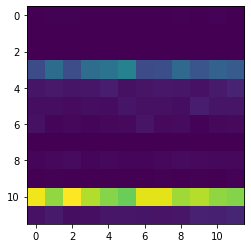

Train on 24000 samples, validate on 4800 samples
Epoch 11/12
24000/24000 [==============================] - 24s 1ms/sample - loss: 2.4681 - acc: 0.1296 - val_loss: 2.4844 - val_acc: 0.0758
Epoch 12/12
24000/24000 [==============================] - 21s 878us/sample - loss: 2.4336 - acc: 0.1447 - val_loss: 2.4829 - val_acc: 0.0915
Train on 24000 samples, validate on 4800 samples
Epoch 13/14
24000/24000 [==============================] - 24s 1ms/sample - loss: 2.4517 - acc: 0.1325 - val_loss: 2.4802 - val_acc: 0.0865
Epoch 14/14
24000/24000 [==============================] - 21s 880us/sample - loss: 2.4192 - acc: 0.1509 - val_loss: 2.4788 - val_acc: 0.0900
Train on 24000 samples, validate on 4800 samples
Epoch 15/16
24000/24000 [==============================] - 24s 997us/sample - loss: 2.4420 - acc: 0.1431 - val_loss: 2.4903 - val_acc: 0.0898
Epoch 16/16
24000/24000 [==============================] - 22s 901us/sample - loss: 2.4111 - acc: 0.1567 - val_loss: 2.4924 - val_acc: 0.0942
Train

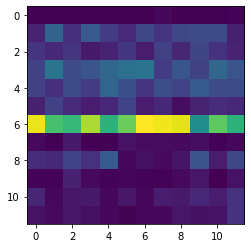

24000/24000 [==============================] - 6s 251us/sample


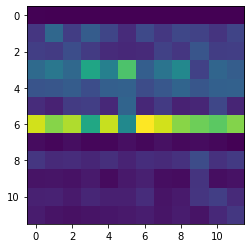

Train on 24000 samples, validate on 4800 samples
Epoch 21/22
24000/24000 [==============================] - 24s 1ms/sample - loss: 2.4228 - acc: 0.1526 - val_loss: 2.4630 - val_acc: 0.1231
Epoch 22/22
24000/24000 [==============================] - 21s 879us/sample - loss: 2.3917 - acc: 0.1656 - val_loss: 2.4616 - val_acc: 0.1258
Train on 24000 samples, validate on 4800 samples
Epoch 23/24
24000/24000 [==============================] - 24s 1ms/sample - loss: 2.4162 - acc: 0.1585 - val_loss: 2.4425 - val_acc: 0.1473
Epoch 24/24
24000/24000 [==============================] - 21s 885us/sample - loss: 2.3849 - acc: 0.1735 - val_loss: 2.4392 - val_acc: 0.1435
Train on 24000 samples, validate on 4800 samples
Epoch 25/26
24000/24000 [==============================] - 24s 1ms/sample - loss: 2.4146 - acc: 0.1572 - val_loss: 2.4268 - val_acc: 0.1606
Epoch 26/26
24000/24000 [==============================] - 22s 910us/sample - loss: 2.3839 - acc: 0.1726 - val_loss: 2.4241 - val_acc: 0.1615
Train o

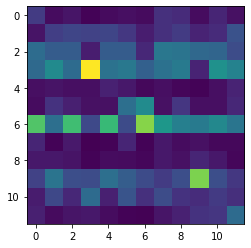

24000/24000 [==============================] - 6s 251us/sample


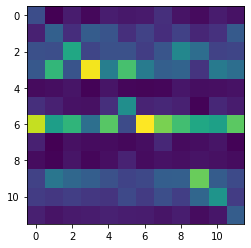

Train on 24000 samples, validate on 4800 samples
Epoch 31/32
24000/24000 [==============================] - 24s 1ms/sample - loss: 2.3994 - acc: 0.1666 - val_loss: 2.4457 - val_acc: 0.1496
Epoch 32/32
24000/24000 [==============================] - 21s 896us/sample - loss: 2.3668 - acc: 0.1817 - val_loss: 2.4472 - val_acc: 0.1469
Train on 24000 samples, validate on 4800 samples
Epoch 33/34
24000/24000 [==============================] - 24s 1ms/sample - loss: 2.4093 - acc: 0.1616 - val_loss: 2.4488 - val_acc: 0.1365
Epoch 34/34
24000/24000 [==============================] - 21s 883us/sample - loss: 2.3801 - acc: 0.1717 - val_loss: 2.4432 - val_acc: 0.1425
Train on 24000 samples, validate on 4800 samples
Epoch 35/36
24000/24000 [==============================] - 24s 1ms/sample - loss: 2.3903 - acc: 0.1751 - val_loss: 2.4724 - val_acc: 0.1315
Epoch 36/36
24000/24000 [==============================] - 21s 895us/sample - loss: 2.3571 - acc: 0.1877 - val_loss: 2.4680 - val_acc: 0.1317
Train o

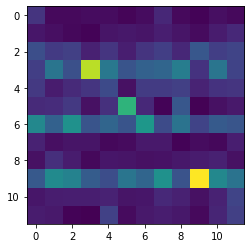

24000/24000 [==============================] - 6s 239us/sample


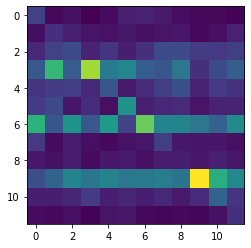

Train on 24000 samples, validate on 4800 samples
Epoch 41/42
24000/24000 [==============================] - 24s 1ms/sample - loss: 2.4164 - acc: 0.1590 - val_loss: 2.4293 - val_acc: 0.1704
Epoch 42/42
24000/24000 [==============================] - 22s 909us/sample - loss: 2.3854 - acc: 0.1706 - val_loss: 2.4113 - val_acc: 0.1760
Train on 24000 samples, validate on 4800 samples
Epoch 43/44
24000/24000 [==============================] - 24s 1ms/sample - loss: 2.3892 - acc: 0.1703 - val_loss: 2.4476 - val_acc: 0.1471
Epoch 44/44
24000/24000 [==============================] - 21s 880us/sample - loss: 2.3596 - acc: 0.1821 - val_loss: 2.4788 - val_acc: 0.1440
Train on 24000 samples, validate on 4800 samples
Epoch 45/46
24000/24000 [==============================] - 24s 1ms/sample - loss: 2.3773 - acc: 0.1793 - val_loss: 2.3873 - val_acc: 0.1810
Epoch 46/46
24000/24000 [==============================] - 22s 906us/sample - loss: 2.3415 - acc: 0.1928 - val_loss: 2.3908 - val_acc: 0.1754
Train o

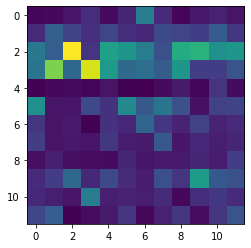

24000/24000 [==============================] - 6s 252us/sample


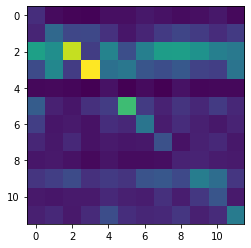

Train on 24000 samples, validate on 4800 samples
Epoch 51/52
24000/24000 [==============================] - 25s 1ms/sample - loss: 2.3756 - acc: 0.1778 - val_loss: 2.3727 - val_acc: 0.1863
Epoch 52/52
24000/24000 [==============================] - 22s 909us/sample - loss: 2.3350 - acc: 0.1943 - val_loss: 2.3690 - val_acc: 0.1940
Train on 24000 samples, validate on 4800 samples
Epoch 53/54
24000/24000 [==============================] - 24s 1ms/sample - loss: 2.3813 - acc: 0.1740 - val_loss: 2.3911 - val_acc: 0.1673
Epoch 54/54
24000/24000 [==============================] - 22s 901us/sample - loss: 2.3475 - acc: 0.1864 - val_loss: 2.3863 - val_acc: 0.1744
Train on 24000 samples, validate on 4800 samples
Epoch 55/56
24000/24000 [==============================] - 25s 1ms/sample - loss: 2.3674 - acc: 0.1838 - val_loss: 2.3553 - val_acc: 0.1869
Epoch 56/56
24000/24000 [==============================] - 21s 895us/sample - loss: 2.3349 - acc: 0.1953 - val_loss: 2.3577 - val_acc: 0.1933
Train o

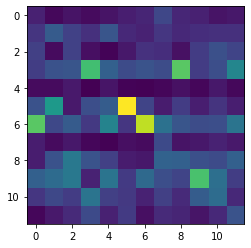

24000/24000 [==============================] - 6s 251us/sample


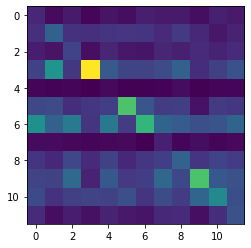

Train on 24000 samples, validate on 4800 samples
Epoch 61/62
24000/24000 [==============================] - 25s 1ms/sample - loss: 2.3816 - acc: 0.1782 - val_loss: 2.4319 - val_acc: 0.1692
Epoch 62/62
24000/24000 [==============================] - 22s 907us/sample - loss: 2.3494 - acc: 0.1864 - val_loss: 2.4351 - val_acc: 0.1650
Train on 24000 samples, validate on 4800 samples
Epoch 63/64
24000/24000 [==============================] - 25s 1ms/sample - loss: 2.3693 - acc: 0.1801 - val_loss: 2.4066 - val_acc: 0.1615
Epoch 64/64
24000/24000 [==============================] - 22s 900us/sample - loss: 2.3355 - acc: 0.1895 - val_loss: 2.3974 - val_acc: 0.1698
Train on 24000 samples, validate on 4800 samples
Epoch 65/66
24000/24000 [==============================] - 25s 1ms/sample - loss: 2.3648 - acc: 0.1837 - val_loss: 2.3572 - val_acc: 0.1825
Epoch 66/66
24000/24000 [==============================] - 22s 906us/sample - loss: 2.3338 - acc: 0.1947 - val_loss: 2.3738 - val_acc: 0.1902
Train o

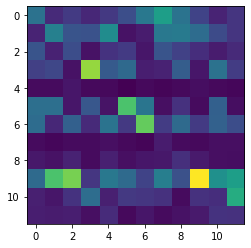

24000/24000 [==============================] - 6s 253us/sample


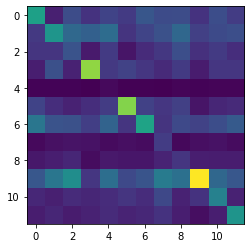

Train on 24000 samples, validate on 4800 samples
Epoch 71/72
24000/24000 [==============================] - 25s 1ms/sample - loss: 2.3302 - acc: 0.1995 - val_loss: 2.4010 - val_acc: 0.1663
Epoch 72/72
24000/24000 [==============================] - 22s 920us/sample - loss: 2.2942 - acc: 0.2127 - val_loss: 2.4130 - val_acc: 0.1721
Train on 24000 samples, validate on 4800 samples
Epoch 73/74
24000/24000 [==============================] - 25s 1ms/sample - loss: 2.3662 - acc: 0.1785 - val_loss: 2.3976 - val_acc: 0.1817
Epoch 74/74
24000/24000 [==============================] - 22s 914us/sample - loss: 2.3364 - acc: 0.1922 - val_loss: 2.4068 - val_acc: 0.1688
Train on 24000 samples, validate on 4800 samples
Epoch 75/76
24000/24000 [==============================] - 25s 1ms/sample - loss: 2.3400 - acc: 0.1957 - val_loss: 2.4185 - val_acc: 0.1858
Epoch 76/76
24000/24000 [==============================] - 22s 913us/sample - loss: 2.3051 - acc: 0.2122 - val_loss: 2.4160 - val_acc: 0.1713
Train o

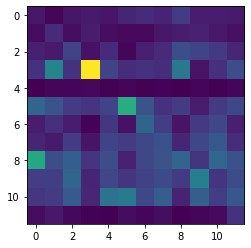

24000/24000 [==============================] - 6s 248us/sample


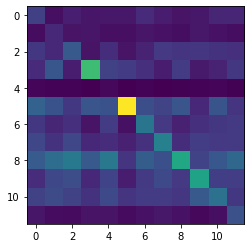

Train on 24000 samples, validate on 4800 samples
Epoch 81/82
24000/24000 [==============================] - 25s 1ms/sample - loss: 2.3589 - acc: 0.1866 - val_loss: 2.3461 - val_acc: 0.1840
Epoch 82/82
24000/24000 [==============================] - 22s 917us/sample - loss: 2.3229 - acc: 0.2013 - val_loss: 2.3589 - val_acc: 0.1767
Train on 24000 samples, validate on 4800 samples
Epoch 83/84
24000/24000 [==============================] - 25s 1ms/sample - loss: 2.3403 - acc: 0.1911 - val_loss: 2.3473 - val_acc: 0.1971
Epoch 84/84
24000/24000 [==============================] - 23s 944us/sample - loss: 2.3024 - acc: 0.2078 - val_loss: 2.3671 - val_acc: 0.1821
Train on 24000 samples, validate on 4800 samples
Epoch 85/86
24000/24000 [==============================] - 25s 1ms/sample - loss: 2.3374 - acc: 0.1964 - val_loss: 2.3558 - val_acc: 0.1802
Epoch 86/86
24000/24000 [==============================] - 22s 926us/sample - loss: 2.3008 - acc: 0.2120 - val_loss: 2.3849 - val_acc: 0.1771
Train o

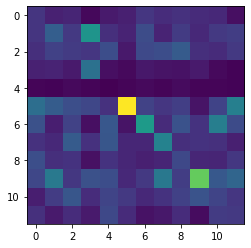

24000/24000 [==============================] - 6s 258us/sample


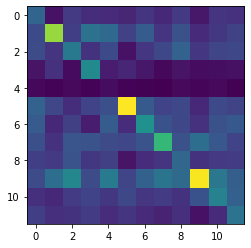

Train on 24000 samples, validate on 4800 samples
Epoch 91/92
24000/24000 [==============================] - 25s 1ms/sample - loss: 2.3266 - acc: 0.1976 - val_loss: 2.3434 - val_acc: 0.2019
Epoch 92/92
24000/24000 [==============================] - 22s 926us/sample - loss: 2.2894 - acc: 0.2155 - val_loss: 2.3458 - val_acc: 0.2037
Train on 24000 samples, validate on 4800 samples
Epoch 93/94
24000/24000 [==============================] - 25s 1ms/sample - loss: 2.3443 - acc: 0.1888 - val_loss: 2.3352 - val_acc: 0.2062
Epoch 94/94
24000/24000 [==============================] - 22s 924us/sample - loss: 2.3068 - acc: 0.2061 - val_loss: 2.3280 - val_acc: 0.1950
Train on 24000 samples, validate on 4800 samples
Epoch 95/96
24000/24000 [==============================] - 25s 1ms/sample - loss: 2.3406 - acc: 0.1928 - val_loss: 2.3668 - val_acc: 0.1992
Epoch 96/96
24000/24000 [==============================] - 22s 931us/sample - loss: 2.3055 - acc: 0.2093 - val_loss: 2.3849 - val_acc: 0.1927
Train o

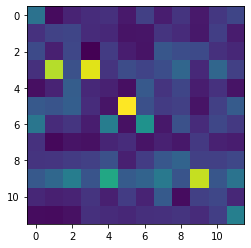

24000/24000 [==============================] - 6s 259us/sample


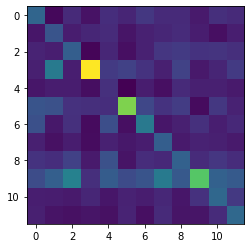

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_64 (Batc (None, 100, 25)           100       
_________________________________________________________________
lstm_32 (LSTM)               (None, 100, 32)           7424      
_________________________________________________________________
batch_normalization_65 (Batc (None, 100, 32)           128       
_________________________________________________________________
lstm_33 (LSTM)               (None, 64)                24832     
_________________________________________________________________
batch_normalization_66 (Batc (None, 64)                256       
_________________________________________________________________
dense_32 (Dense)             (None, 64)                4160      
_________________________________________________________________
batch_normalization_67 (Batc (None, 64)              

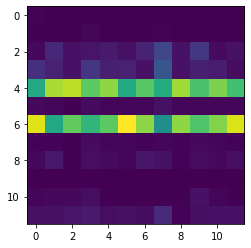

24000/24000 [==============================] - 7s 297us/sample


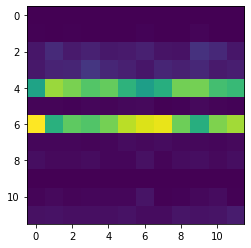

Train on 24000 samples, validate on 4800 samples
Epoch 11/12
24000/24000 [==============================] - 38s 2ms/sample - loss: 2.4595 - acc: 0.1338 - val_loss: 2.4873 - val_acc: 0.0906
Epoch 12/12
24000/24000 [==============================] - 28s 1ms/sample - loss: 2.4155 - acc: 0.1535 - val_loss: 2.4813 - val_acc: 0.0917
Train on 24000 samples, validate on 4800 samples
Epoch 13/14
24000/24000 [==============================] - 32s 1ms/sample - loss: 2.4492 - acc: 0.1442 - val_loss: 2.4829 - val_acc: 0.0952
Epoch 14/14
24000/24000 [==============================] - 28s 1ms/sample - loss: 2.4054 - acc: 0.1651 - val_loss: 2.4842 - val_acc: 0.0825
Train on 24000 samples, validate on 4800 samples
Epoch 15/16
24000/24000 [==============================] - 32s 1ms/sample - loss: 2.4439 - acc: 0.1498 - val_loss: 2.4793 - val_acc: 0.0948
Epoch 16/16
24000/24000 [==============================] - 29s 1ms/sample - loss: 2.4040 - acc: 0.1641 - val_loss: 2.4766 - val_acc: 0.1110
Train on 2400

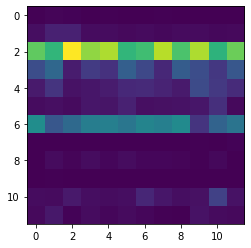

24000/24000 [==============================] - 7s 295us/sample


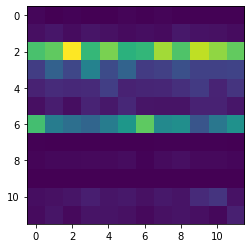

Train on 24000 samples, validate on 4800 samples
Epoch 21/22
24000/24000 [==============================] - 37s 2ms/sample - loss: 2.4147 - acc: 0.1594 - val_loss: 2.4712 - val_acc: 0.1102
Epoch 22/22
24000/24000 [==============================] - 28s 1ms/sample - loss: 2.3698 - acc: 0.1817 - val_loss: 2.4707 - val_acc: 0.1187
Train on 24000 samples, validate on 4800 samples
Epoch 23/24
24000/24000 [==============================] - 31s 1ms/sample - loss: 2.4237 - acc: 0.1580 - val_loss: 2.4658 - val_acc: 0.1177
Epoch 24/24
24000/24000 [==============================] - 29s 1ms/sample - loss: 2.3832 - acc: 0.1744 - val_loss: 2.4666 - val_acc: 0.1115
Train on 24000 samples, validate on 4800 samples
Epoch 25/26
24000/24000 [==============================] - 31s 1ms/sample - loss: 2.4205 - acc: 0.1546 - val_loss: 2.4709 - val_acc: 0.1081
Epoch 26/26
24000/24000 [==============================] - 28s 1ms/sample - loss: 2.3783 - acc: 0.1713 - val_loss: 2.4681 - val_acc: 0.1104
Train on 2400

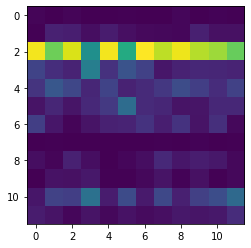

24000/24000 [==============================] - 7s 297us/sample


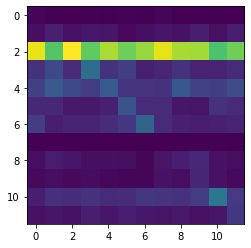

Train on 24000 samples, validate on 4800 samples
Epoch 31/32
24000/24000 [==============================] - 37s 2ms/sample - loss: 2.4087 - acc: 0.1658 - val_loss: 2.4682 - val_acc: 0.1321
Epoch 32/32
24000/24000 [==============================] - 29s 1ms/sample - loss: 2.3675 - acc: 0.1827 - val_loss: 2.4606 - val_acc: 0.1425
Train on 24000 samples, validate on 4800 samples
Epoch 33/34
24000/24000 [==============================] - 31s 1ms/sample - loss: 2.3933 - acc: 0.1656 - val_loss: 2.4792 - val_acc: 0.1244
Epoch 34/34
24000/24000 [==============================] - 28s 1ms/sample - loss: 2.3512 - acc: 0.1863 - val_loss: 2.4722 - val_acc: 0.1302
Train on 24000 samples, validate on 4800 samples
Epoch 35/36
24000/24000 [==============================] - 31s 1ms/sample - loss: 2.3901 - acc: 0.1698 - val_loss: 2.4468 - val_acc: 0.1450
Epoch 36/36
24000/24000 [==============================] - 28s 1ms/sample - loss: 2.3463 - acc: 0.1887 - val_loss: 2.4512 - val_acc: 0.1410
Train on 2400

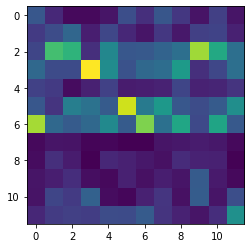

24000/24000 [==============================] - 7s 298us/sample


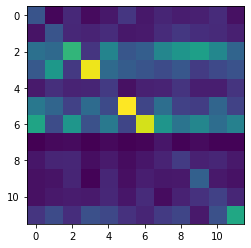

Train on 24000 samples, validate on 4800 samples
Epoch 41/42
24000/24000 [==============================] - 36s 1ms/sample - loss: 2.3720 - acc: 0.1817 - val_loss: 2.4132 - val_acc: 0.1596
Epoch 42/42
24000/24000 [==============================] - 28s 1ms/sample - loss: 2.3288 - acc: 0.2028 - val_loss: 2.4092 - val_acc: 0.1552
Train on 24000 samples, validate on 4800 samples
Epoch 43/44
24000/24000 [==============================] - 31s 1ms/sample - loss: 2.3804 - acc: 0.1808 - val_loss: 2.3973 - val_acc: 0.1612
Epoch 44/44
24000/24000 [==============================] - 28s 1ms/sample - loss: 2.3396 - acc: 0.1966 - val_loss: 2.4024 - val_acc: 0.1685
Train on 24000 samples, validate on 4800 samples
Epoch 45/46
24000/24000 [==============================] - 31s 1ms/sample - loss: 2.3748 - acc: 0.1817 - val_loss: 2.4218 - val_acc: 0.1648
Epoch 46/46
24000/24000 [==============================] - 28s 1ms/sample - loss: 2.3337 - acc: 0.1998 - val_loss: 2.4259 - val_acc: 0.1629
Train on 2400

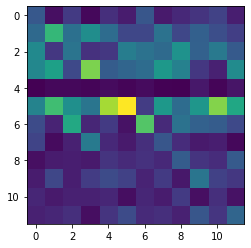

24000/24000 [==============================] - 7s 298us/sample


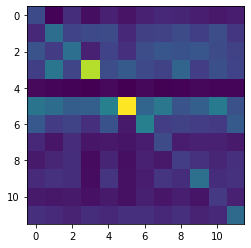

Train on 24000 samples, validate on 4800 samples
Epoch 51/52
24000/24000 [==============================] - 36s 1ms/sample - loss: 2.3602 - acc: 0.1859 - val_loss: 2.3885 - val_acc: 0.1794
Epoch 52/52
24000/24000 [==============================] - 27s 1ms/sample - loss: 2.3169 - acc: 0.2058 - val_loss: 2.3878 - val_acc: 0.1802
Train on 24000 samples, validate on 4800 samples
Epoch 53/54
24000/24000 [==============================] - 30s 1ms/sample - loss: 2.3704 - acc: 0.1841 - val_loss: 2.4056 - val_acc: 0.1727
Epoch 54/54
24000/24000 [==============================] - 28s 1ms/sample - loss: 2.3224 - acc: 0.2037 - val_loss: 2.4290 - val_acc: 0.1781
Train on 24000 samples, validate on 4800 samples
Epoch 55/56
24000/24000 [==============================] - 31s 1ms/sample - loss: 2.3843 - acc: 0.1774 - val_loss: 2.3966 - val_acc: 0.1706
Epoch 56/56
24000/24000 [==============================] - 27s 1ms/sample - loss: 2.3438 - acc: 0.1919 - val_loss: 2.4085 - val_acc: 0.1640
Train on 2400

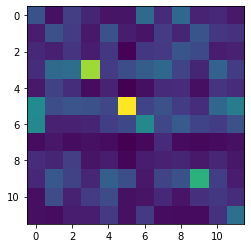

24000/24000 [==============================] - 7s 298us/sample


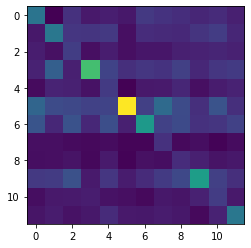

Train on 24000 samples, validate on 4800 samples
Epoch 61/62
24000/24000 [==============================] - 36s 1ms/sample - loss: 2.3701 - acc: 0.1871 - val_loss: 2.3991 - val_acc: 0.1744
Epoch 62/62
24000/24000 [==============================] - 28s 1ms/sample - loss: 2.3274 - acc: 0.2013 - val_loss: 2.4111 - val_acc: 0.1642
Train on 24000 samples, validate on 4800 samples
Epoch 63/64
24000/24000 [==============================] - 30s 1ms/sample - loss: 2.3376 - acc: 0.1920 - val_loss: 2.3977 - val_acc: 0.1752
Epoch 64/64
24000/24000 [==============================] - 27s 1ms/sample - loss: 2.2889 - acc: 0.2116 - val_loss: 2.4020 - val_acc: 0.1838
Train on 24000 samples, validate on 4800 samples
Epoch 65/66
24000/24000 [==============================] - 30s 1ms/sample - loss: 2.3482 - acc: 0.1961 - val_loss: 2.3673 - val_acc: 0.1950
Epoch 66/66
24000/24000 [==============================] - 27s 1ms/sample - loss: 2.3049 - acc: 0.2096 - val_loss: 2.3819 - val_acc: 0.1827
Train on 2400

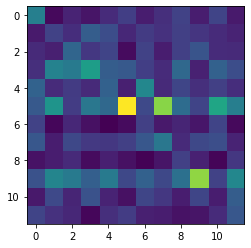

24000/24000 [==============================] - 7s 302us/sample


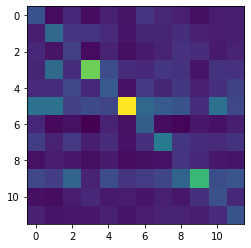

Train on 24000 samples, validate on 4800 samples
Epoch 71/72
24000/24000 [==============================] - 34s 1ms/sample - loss: 2.3463 - acc: 0.1924 - val_loss: 2.4454 - val_acc: 0.1471
Epoch 72/72
24000/24000 [==============================] - 27s 1ms/sample - loss: 2.3040 - acc: 0.2075 - val_loss: 2.4520 - val_acc: 0.1504
Train on 24000 samples, validate on 4800 samples
Epoch 73/74
24000/24000 [==============================] - 30s 1ms/sample - loss: 2.3315 - acc: 0.2062 - val_loss: 2.3924 - val_acc: 0.1890
Epoch 74/74
24000/24000 [==============================] - 27s 1ms/sample - loss: 2.2864 - acc: 0.2220 - val_loss: 2.3788 - val_acc: 0.1965
Train on 24000 samples, validate on 4800 samples
Epoch 75/76
24000/24000 [==============================] - 30s 1ms/sample - loss: 2.3441 - acc: 0.1964 - val_loss: 2.3791 - val_acc: 0.1879
Epoch 76/76
24000/24000 [==============================] - 27s 1ms/sample - loss: 2.2975 - acc: 0.2153 - val_loss: 2.3901 - val_acc: 0.1829
Train on 2400

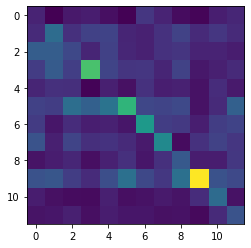

24000/24000 [==============================] - 7s 305us/sample


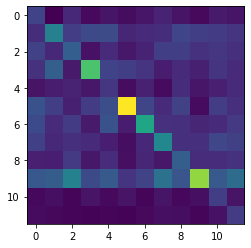

Train on 24000 samples, validate on 4800 samples
Epoch 81/82
24000/24000 [==============================] - 35s 1ms/sample - loss: 2.3370 - acc: 0.1971 - val_loss: 2.3894 - val_acc: 0.1858
Epoch 82/82
24000/24000 [==============================] - 27s 1ms/sample - loss: 2.2932 - acc: 0.2176 - val_loss: 2.3921 - val_acc: 0.1956
Train on 24000 samples, validate on 4800 samples
Epoch 83/84
24000/24000 [==============================] - 30s 1ms/sample - loss: 2.3380 - acc: 0.1923 - val_loss: 2.3425 - val_acc: 0.1904
Epoch 84/84
24000/24000 [==============================] - 28s 1ms/sample - loss: 2.2923 - acc: 0.2099 - val_loss: 2.3635 - val_acc: 0.1854
Train on 24000 samples, validate on 4800 samples
Epoch 85/86
24000/24000 [==============================] - 30s 1ms/sample - loss: 2.3634 - acc: 0.1844 - val_loss: 2.3466 - val_acc: 0.1873
Epoch 86/86
24000/24000 [==============================] - 27s 1ms/sample - loss: 2.3169 - acc: 0.2030 - val_loss: 2.3461 - val_acc: 0.1958
Train on 2400

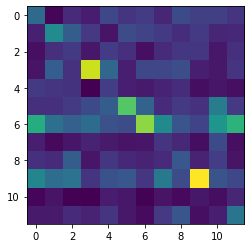

24000/24000 [==============================] - 7s 309us/sample


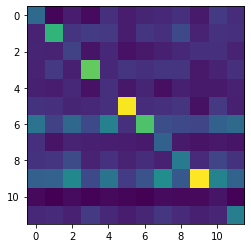

Train on 24000 samples, validate on 4800 samples
Epoch 91/92
24000/24000 [==============================] - 34s 1ms/sample - loss: 2.3414 - acc: 0.1933 - val_loss: 2.3425 - val_acc: 0.1915
Epoch 92/92
24000/24000 [==============================] - 28s 1ms/sample - loss: 2.2934 - acc: 0.2130 - val_loss: 2.3648 - val_acc: 0.1842
Train on 24000 samples, validate on 4800 samples
Epoch 93/94
24000/24000 [==============================] - 30s 1ms/sample - loss: 2.3202 - acc: 0.2048 - val_loss: 2.3842 - val_acc: 0.1725
Epoch 94/94
24000/24000 [==============================] - 27s 1ms/sample - loss: 2.2737 - acc: 0.2290 - val_loss: 2.3791 - val_acc: 0.1800
Train on 24000 samples, validate on 4800 samples
Epoch 95/96
24000/24000 [==============================] - 30s 1ms/sample - loss: 2.3284 - acc: 0.1983 - val_loss: 2.4088 - val_acc: 0.1750
Epoch 96/96
24000/24000 [==============================] - 27s 1ms/sample - loss: 2.2788 - acc: 0.2197 - val_loss: 2.4182 - val_acc: 0.1765
Train on 2400

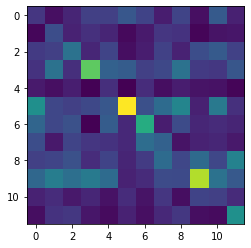

24000/24000 [==============================] - 7s 308us/sample


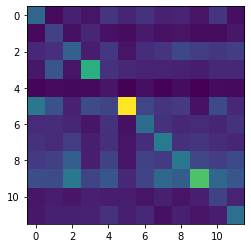

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_68 (Batc (None, 100, 25)           100       
_________________________________________________________________
lstm_34 (LSTM)               (None, 100, 64)           23040     
_________________________________________________________________
batch_normalization_69 (Batc (None, 100, 64)           256       
_________________________________________________________________
lstm_35 (LSTM)               (None, 64)                33024     
_________________________________________________________________
batch_normalization_70 (Batc (None, 64)                256       
_________________________________________________________________
dense_34 (Dense)             (None, 64)                4160      
_________________________________________________________________
batch_normalization_71 (Batc (None, 64)              

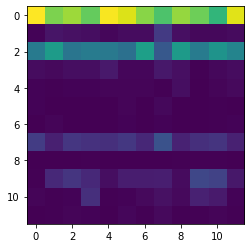

24000/24000 [==============================] - 9s 372us/sample


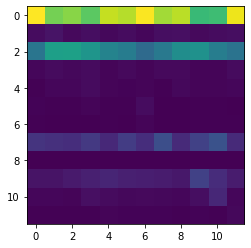

Train on 24000 samples, validate on 4800 samples
Epoch 11/12
24000/24000 [==============================] - 38s 2ms/sample - loss: 2.4330 - acc: 0.1586 - val_loss: 2.4756 - val_acc: 0.1106
Epoch 12/12
24000/24000 [==============================] - 37s 2ms/sample - loss: 2.3703 - acc: 0.1838 - val_loss: 2.4789 - val_acc: 0.1040
Train on 24000 samples, validate on 4800 samples
Epoch 13/14
24000/24000 [==============================] - 39s 2ms/sample - loss: 2.4326 - acc: 0.1555 - val_loss: 2.4786 - val_acc: 0.1106
Epoch 14/14
24000/24000 [==============================] - 36s 2ms/sample - loss: 2.3776 - acc: 0.1761 - val_loss: 2.4796 - val_acc: 0.1085
Train on 24000 samples, validate on 4800 samples
Epoch 15/16
24000/24000 [==============================] - 40s 2ms/sample - loss: 2.4383 - acc: 0.1468 - val_loss: 2.5006 - val_acc: 0.0885
Epoch 16/16
24000/24000 [==============================] - 36s 2ms/sample - loss: 2.3823 - acc: 0.1760 - val_loss: 2.5031 - val_acc: 0.0846
Train on 2400

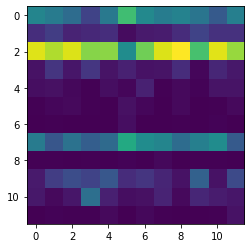

24000/24000 [==============================] - 9s 378us/sample


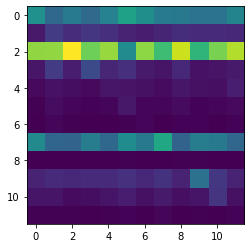

Train on 24000 samples, validate on 4800 samples
Epoch 21/22
24000/24000 [==============================] - 40s 2ms/sample - loss: 2.4182 - acc: 0.1581 - val_loss: 2.4645 - val_acc: 0.1140
Epoch 22/22
24000/24000 [==============================] - 36s 2ms/sample - loss: 2.3649 - acc: 0.1822 - val_loss: 2.4599 - val_acc: 0.1077
Train on 24000 samples, validate on 4800 samples
Epoch 23/24
24000/24000 [==============================] - 40s 2ms/sample - loss: 2.4026 - acc: 0.1658 - val_loss: 2.4552 - val_acc: 0.1300
Epoch 24/24
24000/24000 [==============================] - 36s 2ms/sample - loss: 2.3520 - acc: 0.1882 - val_loss: 2.4500 - val_acc: 0.1365
Train on 24000 samples, validate on 4800 samples
Epoch 25/26
24000/24000 [==============================] - 40s 2ms/sample - loss: 2.4044 - acc: 0.1658 - val_loss: 2.4546 - val_acc: 0.1158
Epoch 26/26
24000/24000 [==============================] - 34s 1ms/sample - loss: 2.3557 - acc: 0.1897 - val_loss: 2.4651 - val_acc: 0.1233
Train on 2400

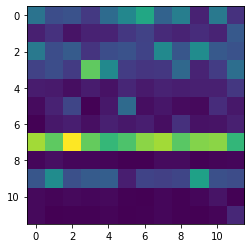

24000/24000 [==============================] - 9s 376us/sample


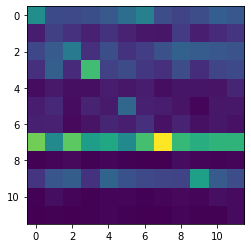

Train on 24000 samples, validate on 4800 samples
Epoch 31/32
24000/24000 [==============================] - 40s 2ms/sample - loss: 2.3904 - acc: 0.1720 - val_loss: 2.4194 - val_acc: 0.1508
Epoch 32/32
24000/24000 [==============================] - 37s 2ms/sample - loss: 2.3364 - acc: 0.1964 - val_loss: 2.4197 - val_acc: 0.1502
Train on 24000 samples, validate on 4800 samples
Epoch 33/34
24000/24000 [==============================] - 40s 2ms/sample - loss: 2.3768 - acc: 0.1827 - val_loss: 2.4385 - val_acc: 0.1400
Epoch 34/34
24000/24000 [==============================] - 37s 2ms/sample - loss: 2.3261 - acc: 0.2051 - val_loss: 2.4361 - val_acc: 0.1521
Train on 24000 samples, validate on 4800 samples
Epoch 35/36
24000/24000 [==============================] - 41s 2ms/sample - loss: 2.3753 - acc: 0.1806 - val_loss: 2.4421 - val_acc: 0.1385
Epoch 36/36
24000/24000 [==============================] - 38s 2ms/sample - loss: 2.3255 - acc: 0.2066 - val_loss: 2.4408 - val_acc: 0.1419
Train on 2400

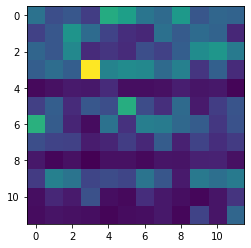

24000/24000 [==============================] - 9s 382us/sample


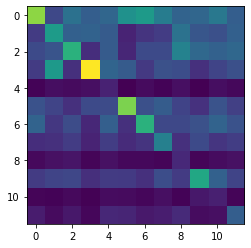

Train on 24000 samples, validate on 4800 samples
Epoch 41/42
24000/24000 [==============================] - 40s 2ms/sample - loss: 2.3697 - acc: 0.1826 - val_loss: 2.4002 - val_acc: 0.1800
Epoch 42/42
24000/24000 [==============================] - 38s 2ms/sample - loss: 2.3199 - acc: 0.2001 - val_loss: 2.3967 - val_acc: 0.1804
Train on 24000 samples, validate on 4800 samples
Epoch 43/44
24000/24000 [==============================] - 40s 2ms/sample - loss: 2.3514 - acc: 0.1891 - val_loss: 2.3956 - val_acc: 0.1698
Epoch 44/44
24000/24000 [==============================] - 36s 2ms/sample - loss: 2.3041 - acc: 0.2085 - val_loss: 2.4035 - val_acc: 0.1619
Train on 24000 samples, validate on 4800 samples
Epoch 45/46
24000/24000 [==============================] - 40s 2ms/sample - loss: 2.3651 - acc: 0.1826 - val_loss: 2.4232 - val_acc: 0.1646
Epoch 46/46
24000/24000 [==============================] - 37s 2ms/sample - loss: 2.3094 - acc: 0.2112 - val_loss: 2.4274 - val_acc: 0.1621
Train on 2400

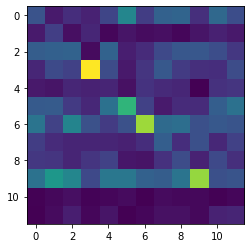

24000/24000 [==============================] - 10s 399us/sample


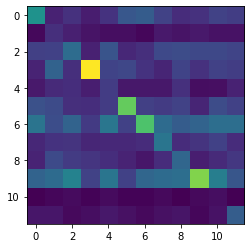

Train on 24000 samples, validate on 4800 samples
Epoch 51/52
24000/24000 [==============================] - 40s 2ms/sample - loss: 2.3765 - acc: 0.1770 - val_loss: 2.3527 - val_acc: 0.1775
Epoch 52/52
24000/24000 [==============================] - 38s 2ms/sample - loss: 2.3249 - acc: 0.2005 - val_loss: 2.3404 - val_acc: 0.1792
Train on 24000 samples, validate on 4800 samples
Epoch 53/54
24000/24000 [==============================] - 41s 2ms/sample - loss: 2.3607 - acc: 0.1814 - val_loss: 2.4052 - val_acc: 0.1733
Epoch 54/54
24000/24000 [==============================] - 38s 2ms/sample - loss: 2.3108 - acc: 0.2086 - val_loss: 2.3857 - val_acc: 0.1710
Train on 24000 samples, validate on 4800 samples
Epoch 55/56
24000/24000 [==============================] - 41s 2ms/sample - loss: 2.3463 - acc: 0.1919 - val_loss: 2.3930 - val_acc: 0.1665
Epoch 56/56
24000/24000 [==============================] - 38s 2ms/sample - loss: 2.2950 - acc: 0.2159 - val_loss: 2.3905 - val_acc: 0.1725
Train on 2400

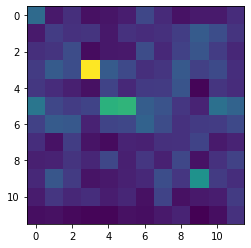

24000/24000 [==============================] - 9s 382us/sample


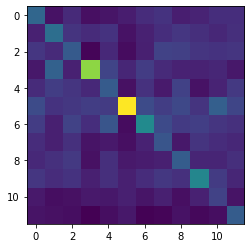

Train on 24000 samples, validate on 4800 samples
Epoch 61/62
24000/24000 [==============================] - 40s 2ms/sample - loss: 2.3869 - acc: 0.1733 - val_loss: 2.3579 - val_acc: 0.1904
Epoch 62/62
24000/24000 [==============================] - 38s 2ms/sample - loss: 2.3289 - acc: 0.2001 - val_loss: 2.3721 - val_acc: 0.1956
Train on 24000 samples, validate on 4800 samples
Epoch 63/64
24000/24000 [==============================] - 40s 2ms/sample - loss: 2.3307 - acc: 0.2014 - val_loss: 2.3814 - val_acc: 0.1885
Epoch 64/64
24000/24000 [==============================] - 38s 2ms/sample - loss: 2.2705 - acc: 0.2233 - val_loss: 2.3869 - val_acc: 0.1856
Train on 24000 samples, validate on 4800 samples
Epoch 65/66
24000/24000 [==============================] - 40s 2ms/sample - loss: 2.3235 - acc: 0.2020 - val_loss: 2.4395 - val_acc: 0.1696
Epoch 66/66
24000/24000 [==============================] - 38s 2ms/sample - loss: 2.2699 - acc: 0.2221 - val_loss: 2.4285 - val_acc: 0.1710
Train on 2400

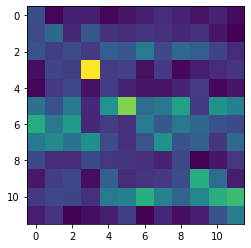

24000/24000 [==============================] - 9s 382us/sample


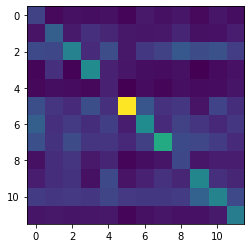

Train on 24000 samples, validate on 4800 samples
Epoch 71/72
24000/24000 [==============================] - 40s 2ms/sample - loss: 2.3371 - acc: 0.1984 - val_loss: 2.3835 - val_acc: 0.1773
Epoch 72/72
24000/24000 [==============================] - 38s 2ms/sample - loss: 2.2817 - acc: 0.2215 - val_loss: 2.3904 - val_acc: 0.1681
Train on 24000 samples, validate on 4800 samples
Epoch 73/74
24000/24000 [==============================] - 41s 2ms/sample - loss: 2.3436 - acc: 0.1902 - val_loss: 2.3135 - val_acc: 0.2092
Epoch 74/74
24000/24000 [==============================] - 38s 2ms/sample - loss: 2.2881 - acc: 0.2167 - val_loss: 2.3127 - val_acc: 0.2121
Train on 24000 samples, validate on 4800 samples
Epoch 75/76
24000/24000 [==============================] - 41s 2ms/sample - loss: 2.3185 - acc: 0.2050 - val_loss: 2.3741 - val_acc: 0.1698
Epoch 76/76
24000/24000 [==============================] - 38s 2ms/sample - loss: 2.2654 - acc: 0.2287 - val_loss: 2.3901 - val_acc: 0.1756
Train on 2400

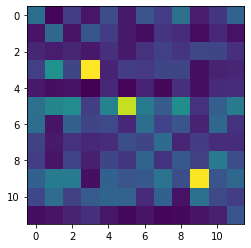

24000/24000 [==============================] - 9s 386us/sample


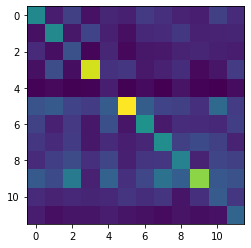

Train on 24000 samples, validate on 4800 samples
Epoch 81/82
24000/24000 [==============================] - 41s 2ms/sample - loss: 2.3268 - acc: 0.1989 - val_loss: 2.3546 - val_acc: 0.1846
Epoch 82/82
24000/24000 [==============================] - 38s 2ms/sample - loss: 2.2721 - acc: 0.2209 - val_loss: 2.3617 - val_acc: 0.1931
Train on 24000 samples, validate on 4800 samples
Epoch 83/84
24000/24000 [==============================] - 41s 2ms/sample - loss: 2.3192 - acc: 0.2070 - val_loss: 2.3759 - val_acc: 0.1892
Epoch 84/84
24000/24000 [==============================] - 38s 2ms/sample - loss: 2.2634 - acc: 0.2295 - val_loss: 2.3766 - val_acc: 0.1842
Train on 24000 samples, validate on 4800 samples
Epoch 85/86
24000/24000 [==============================] - 41s 2ms/sample - loss: 2.3280 - acc: 0.2070 - val_loss: 2.3744 - val_acc: 0.1921
Epoch 86/86
24000/24000 [==============================] - 38s 2ms/sample - loss: 2.2699 - acc: 0.2302 - val_loss: 2.3718 - val_acc: 0.1979
Train on 2400

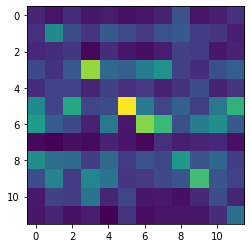

24000/24000 [==============================] - 9s 383us/sample


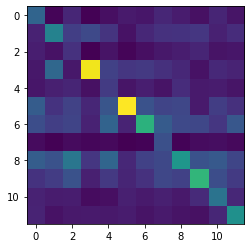

Train on 24000 samples, validate on 4800 samples
Epoch 91/92
24000/24000 [==============================] - 40s 2ms/sample - loss: 2.3075 - acc: 0.2089 - val_loss: 2.3680 - val_acc: 0.1935
Epoch 92/92
24000/24000 [==============================] - 38s 2ms/sample - loss: 2.2497 - acc: 0.2283 - val_loss: 2.3788 - val_acc: 0.1902
Train on 24000 samples, validate on 4800 samples
Epoch 93/94
24000/24000 [==============================] - 41s 2ms/sample - loss: 2.3151 - acc: 0.2061 - val_loss: 2.3369 - val_acc: 0.2017
Epoch 94/94
24000/24000 [==============================] - 38s 2ms/sample - loss: 2.2563 - acc: 0.2307 - val_loss: 2.3686 - val_acc: 0.1925
Train on 24000 samples, validate on 4800 samples
Epoch 95/96
24000/24000 [==============================] - 40s 2ms/sample - loss: 2.3251 - acc: 0.1952 - val_loss: 2.3643 - val_acc: 0.1808
Epoch 96/96
24000/24000 [==============================] - 33s 1ms/sample - loss: 2.2643 - acc: 0.2186 - val_loss: 2.3624 - val_acc: 0.1740
Train on 2400

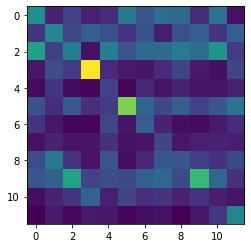

24000/24000 [==============================] - 9s 386us/sample


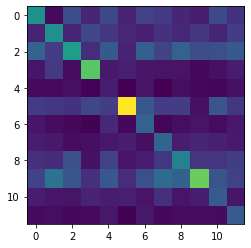

In [13]:
train_n = 100
sample_n = train_n * 20
val_n  = int(train_n/5)
valsample_n = val_n * 20
iterations = 50
epochs = 2
learn_rate = 0.001
batch_size = 4096
for D in [64]:
    for LSTM2 in [8, 16, 32, 64]:
        for LSTM1 in [8, 16, 32, 64]:
            model = keras.Sequential()
            model.add(BatchNormalization(input_shape=input_shape))

            model.add(LSTM(LSTM1, 
                           input_shape=input_shape, 
                           return_sequences = True
                          ))
            model.add(BatchNormalization())
            model.add(LSTM(LSTM2, 
                           return_sequences = False,
                           go_backwards = True
                          ))
            model.add(BatchNormalization())
            model.add(Dense(D, activation= "relu"))
            model.add(BatchNormalization())
            model.add(Dense(len(enc.categories_[0]), activation= "softmax"))
            adam = keras.optimizers.Adam(lr=0.001, amsgrad = True)
            model.compile(loss = "categorical_crossentropy", optimizer= adam, metrics=["acc"])
            gc.collect()
            print(model.summary())
            desc = str(LSTM1) + "_" + str(LSTM2) + "_" + str(D)
            log_dir = os.path.join(
                "logs",
                "10sec_10sample",
                desc
            )
            model_dir = os.path.join(
                "pickle",
                desc
            )


            tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
            model = module.train(iterations, learn_rate, train_n, sample_n, val_n, valsample_n, seconds, samplerate,
                            countriesOfInterest, enc, epochs, tensorboard_callback, model_dir,
                            model, batch_size)
            del model, model_dir, log_dir, desc, adam
            gc.collect()

In [ ]:
model = keras.Sequential()
model.add(BatchNormalization(input_shape=(train_x.shape[1], train_x.shape[2])))

model.add(LSTM(16, 
               input_shape=(train_x.shape[1], train_x.shape[2]), 
               return_sequences = True,
          #     recurrent_dropout = .5,
          #     kernel_regularizer=regularizers.l2(0.01),
              ))
model.add(BatchNormalization())
model.add(LSTM(32, 
             #  input_shape=(train_x.shape[1], train_x.shape[2]), 
               return_sequences = False,
  #             recurrent_dropout = .5,
               go_backwards = True
          #     kernel_regularizer=regularizers.l2(0.01),
              ))
model.add(BatchNormalization())
#model.add(Dropout(.5))
model.add(Dense(16, activation= "relu"))
model.add(BatchNormalization())
#model.add(Dropout(.5))
model.add(Dense(len(enc.categories_[0]), activation= "softmax"))
adam = keras.optimizers.Adam(lr=0.001, amsgrad = True)
model.compile(loss = "categorical_crossentropy", optimizer= adam, metrics=["acc"])
del train_x, train_labels, val_x, val_labels, class_weights
gc.collect()
print(model.summary())

In [ ]:
#add recurrent dropout to add noise to duration
desc = "normin_LSTM16_32_Out_1Step_001LR_amsgrad"
log_dir = os.path.join(
    "logs",
    "Overfit",
    desc
)
model_dir = os.path.join(
    "pickle",
    "save"
)

train_n = 100
sample_n = 8000
val_n  = int(2*train_n/5)
valsample_n = 1000
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
epochs = 1
iterations = 40
learn_rate = 0.001
batch_size = 4096
model = module.train(iterations, learn_rate, train_n, sample_n, val_n, valsample_n, seconds, samplerate,
                countriesOfInterest, enc, epochs, tensorboard_callback, model_dir,
                model, batch_size)